In [1]:
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
os.chdir('..')
import virl
from helper_methods import run, plot
from plot_helper import plot as eval_plot


from LinearAprxAgent import LinearAprxAgent


import pickle

In [2]:
#evaluate the stochastic and noisy parameters
stochastic_noisy = {0:virl.Epidemic(stochastic=False, noisy=False),1:virl.Epidemic(stochastic=True, noisy=False),2:virl.Epidemic(stochastic=False, noisy=True),3:virl.Epidemic(stochastic=True, noisy=True)}
stochastic_noisy_print = {0:"stochastic=False, noisy=False",1:"stochastic=True, noisy=False",2:"stochastic=False, noisy=True",3:"stochastic=True, noisy=True"}


In [3]:
def mean_std(all_total_rewards,all_rewards,title):
    #mean and standard deviation
    total_reward_sd = np.std(all_total_rewards)
    total_reward_mean = np.mean(all_total_rewards)
    reward_sd = np.std(all_rewards)
    reward_mean = np.mean(all_rewards)

    print("---")
    print(title)
    print("Total reward standard deviation = " + str(total_reward_sd))
    print("Total reward mean = " + str(total_reward_mean))
    print("Reward standard deviation = " + str(reward_sd))
    print("Rotal reward mean = " + str(reward_mean))

## Deterministic

C:\Users\idree\ai4\ai-coursework-group6\notebooks\helper_methods.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 2, figsize=(20, 8))


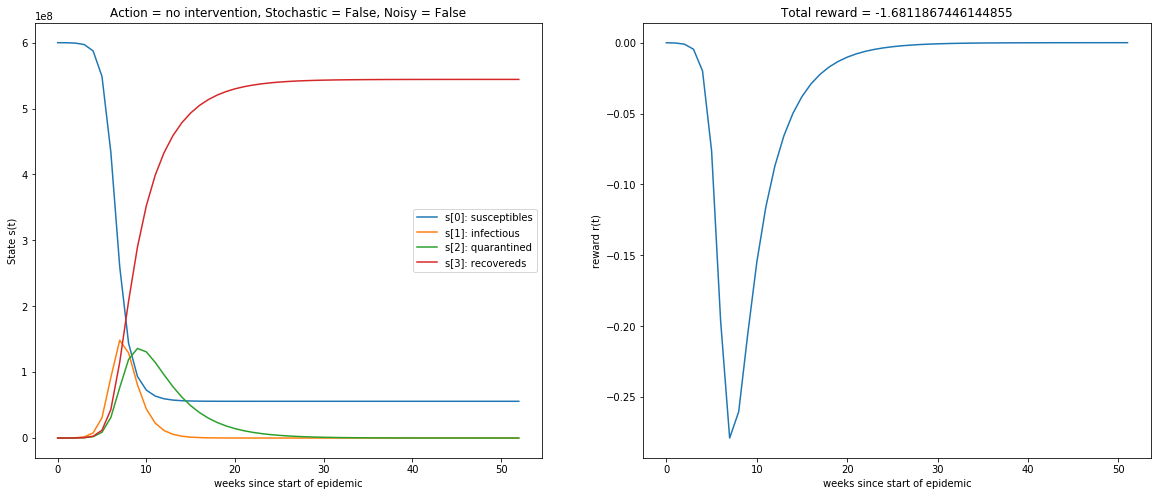

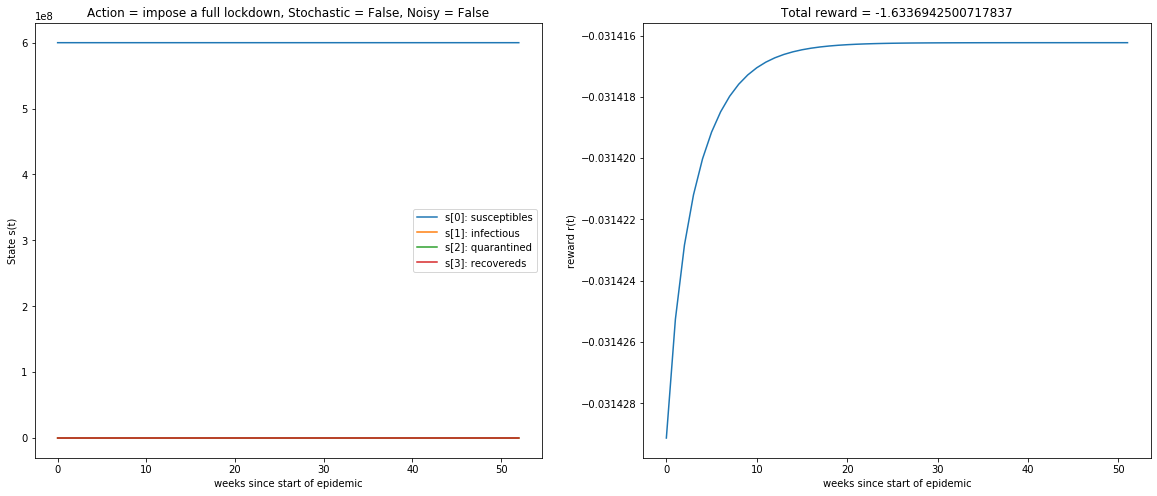

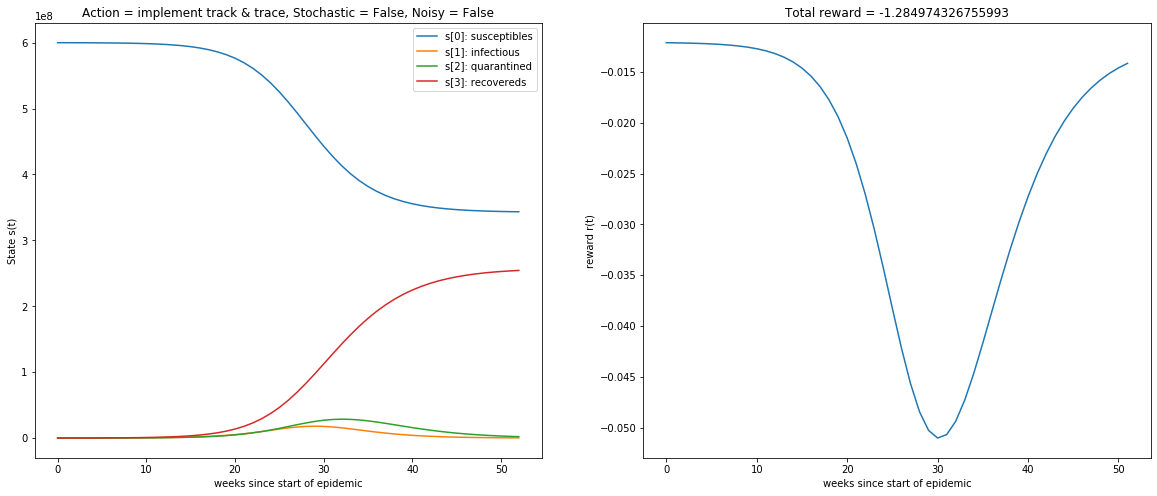

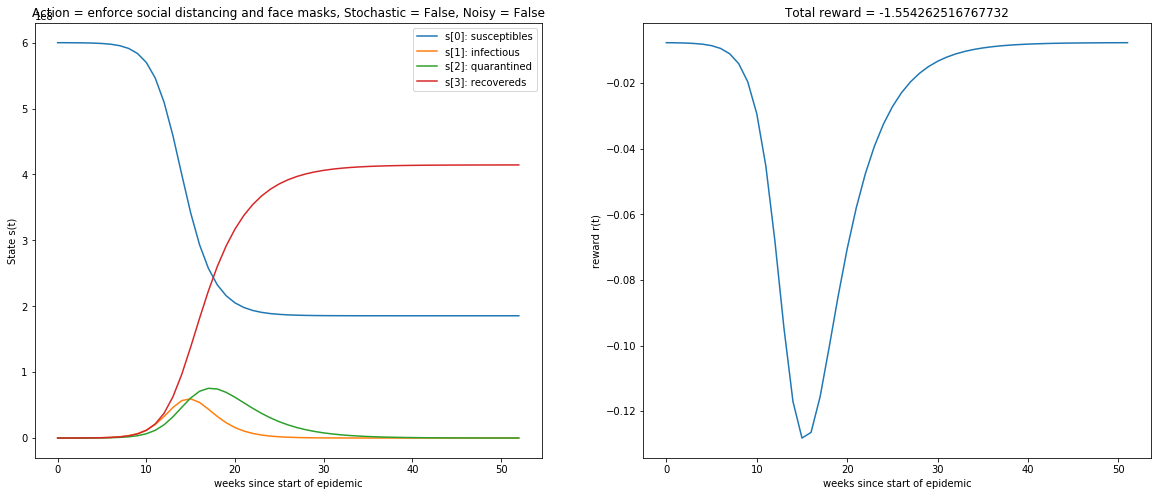

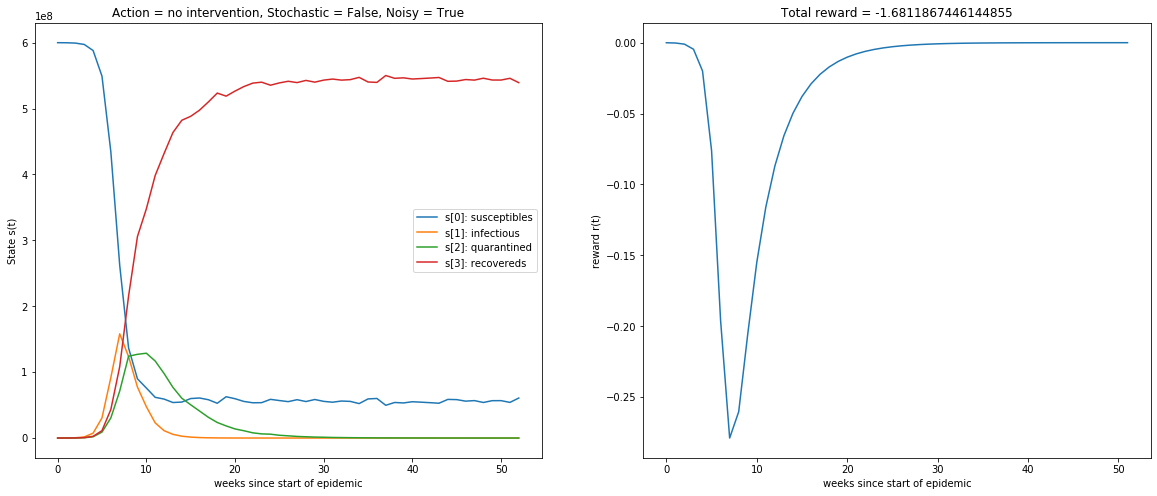

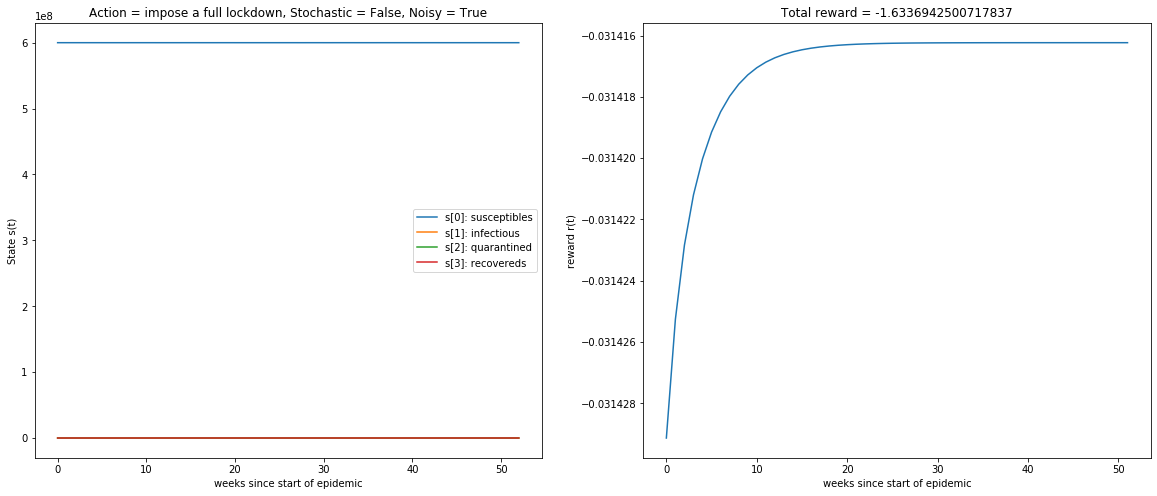

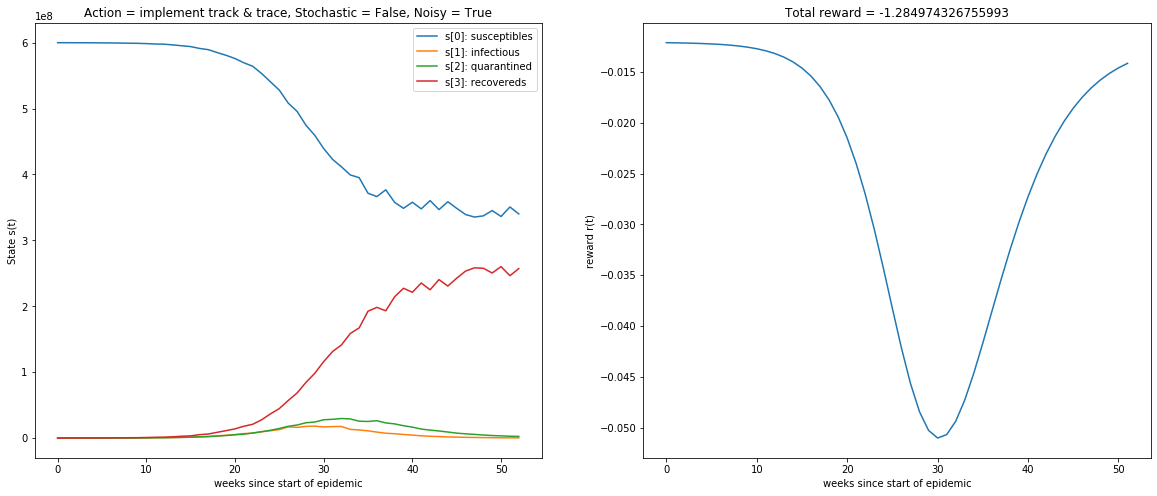

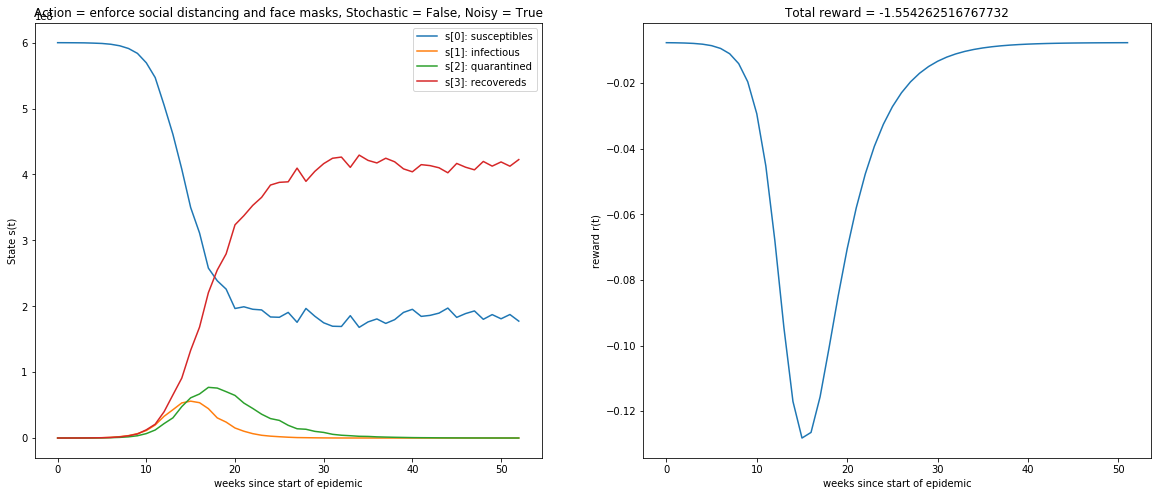

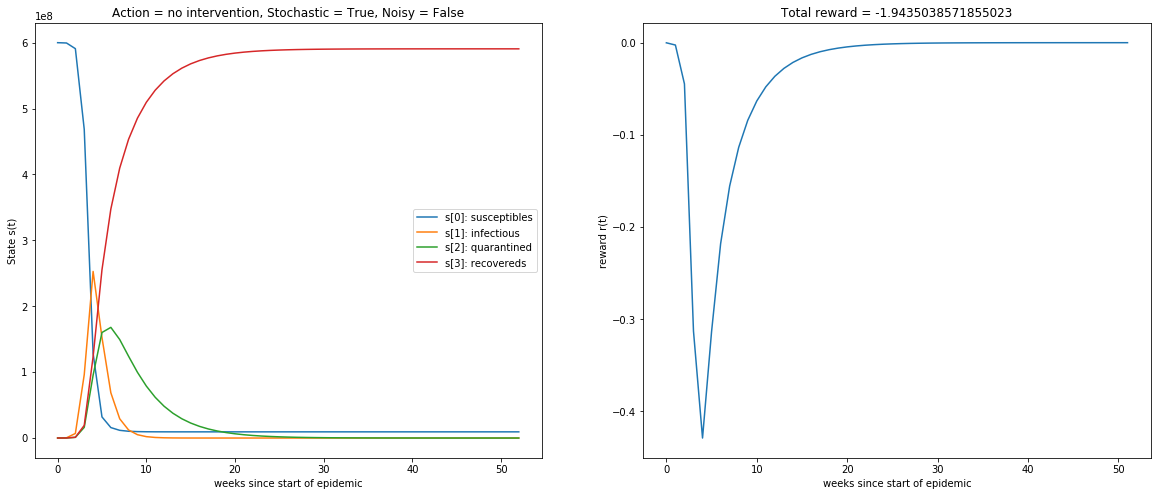

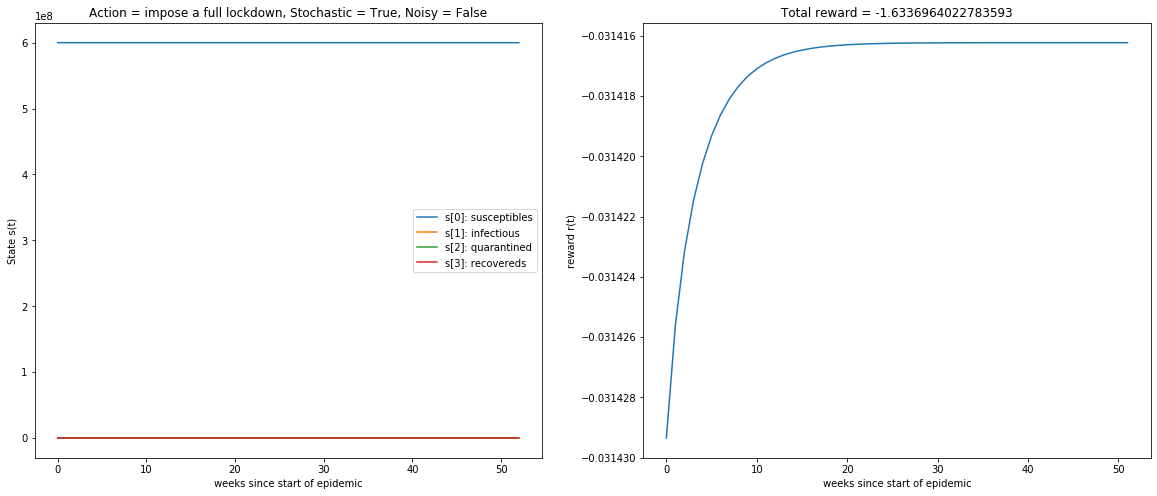

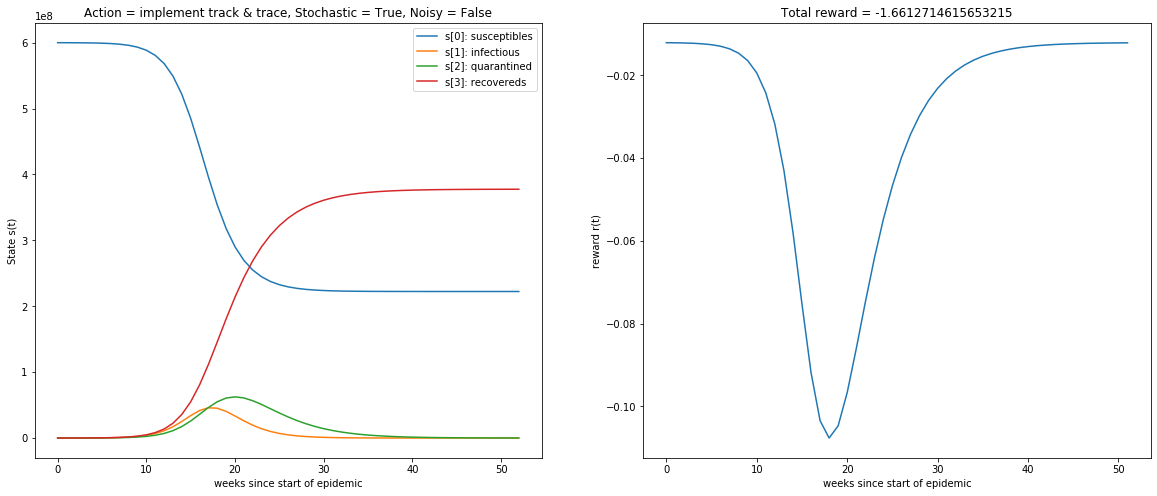

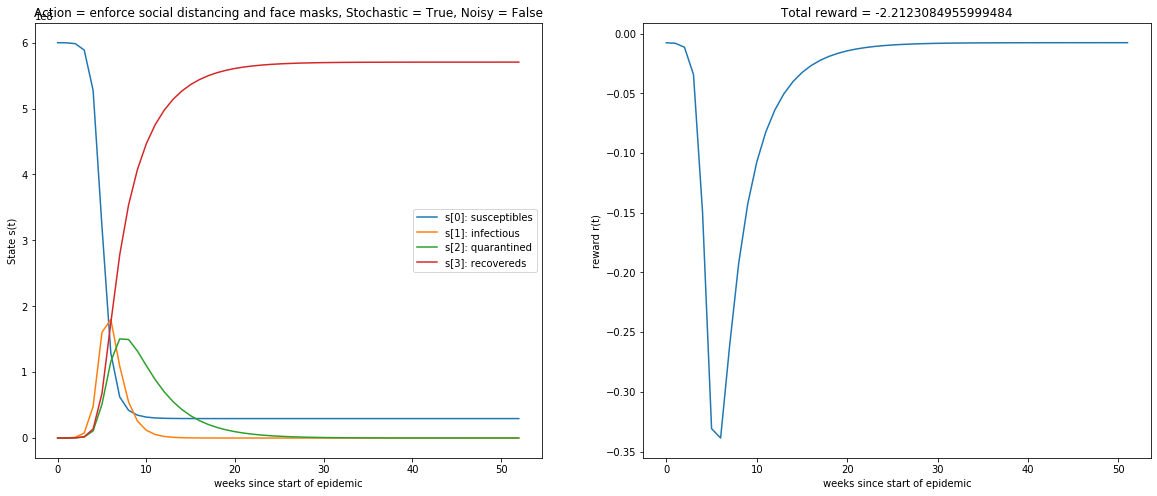

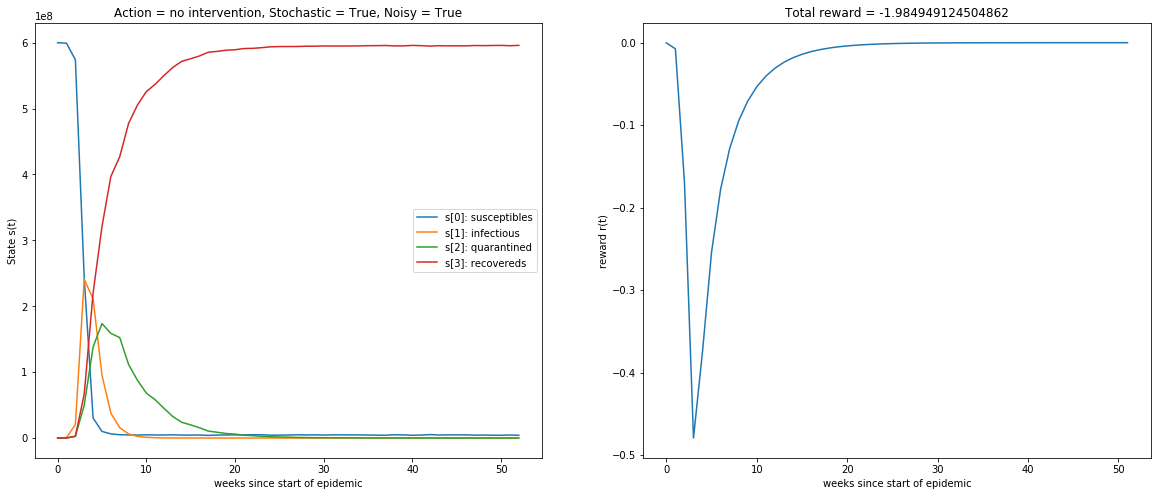

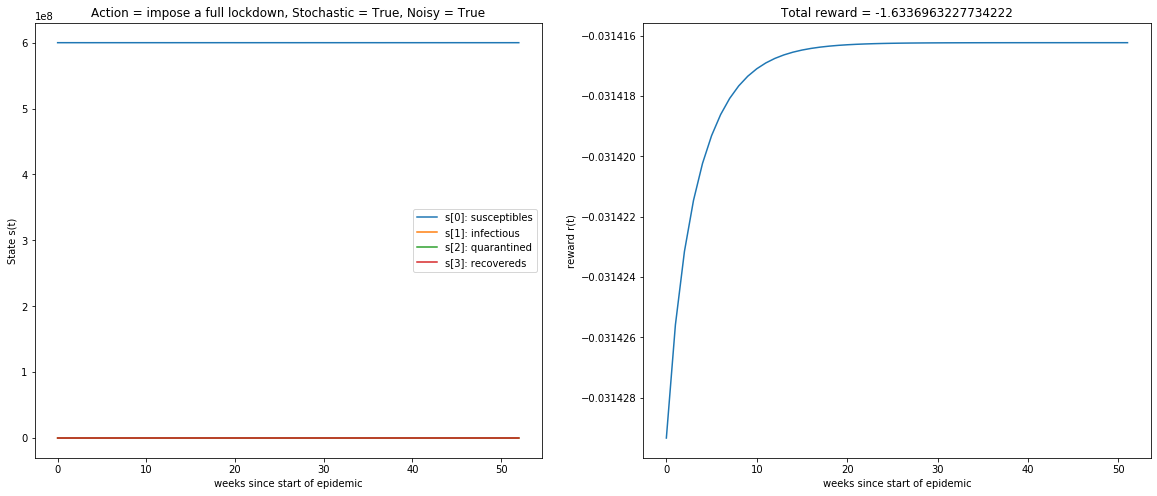

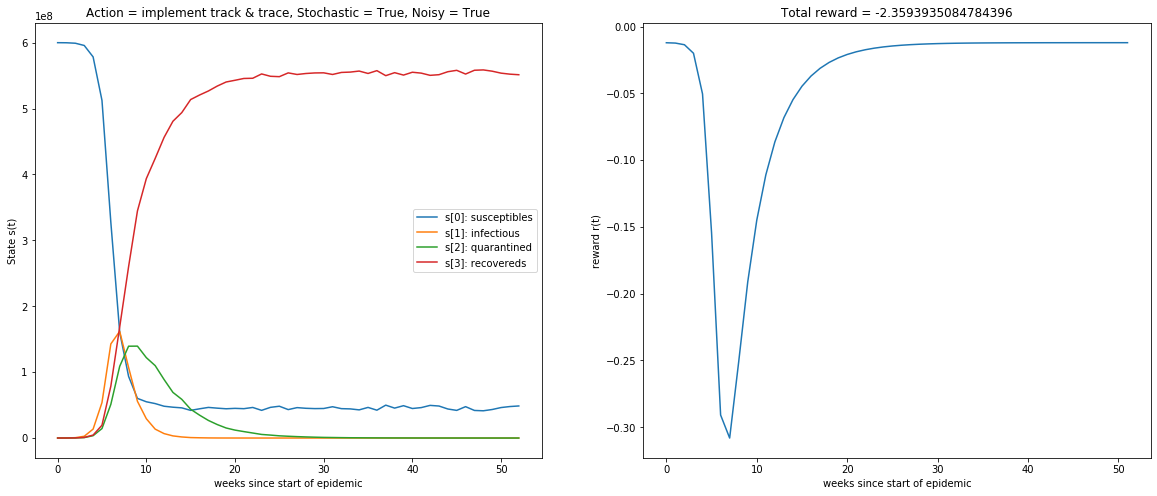

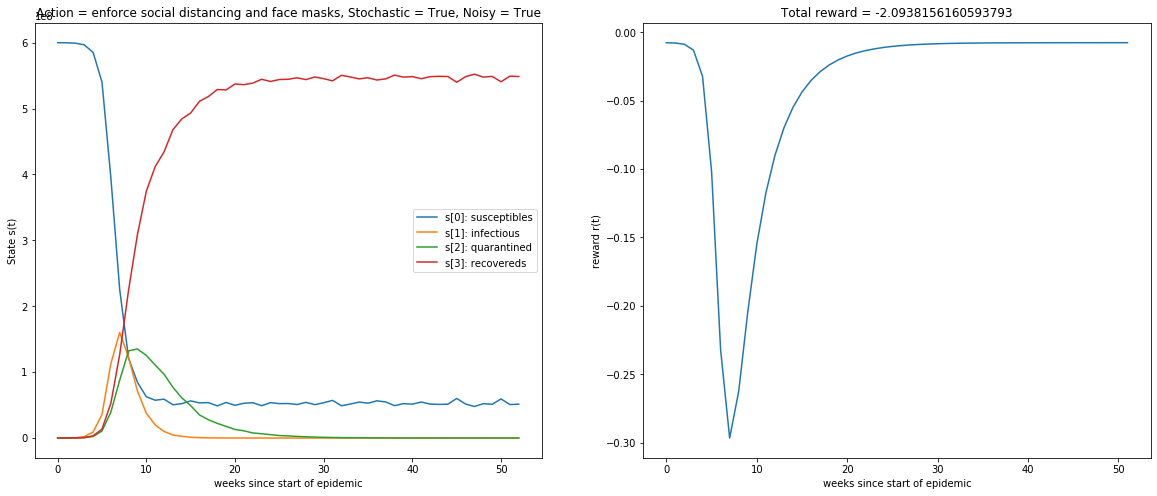

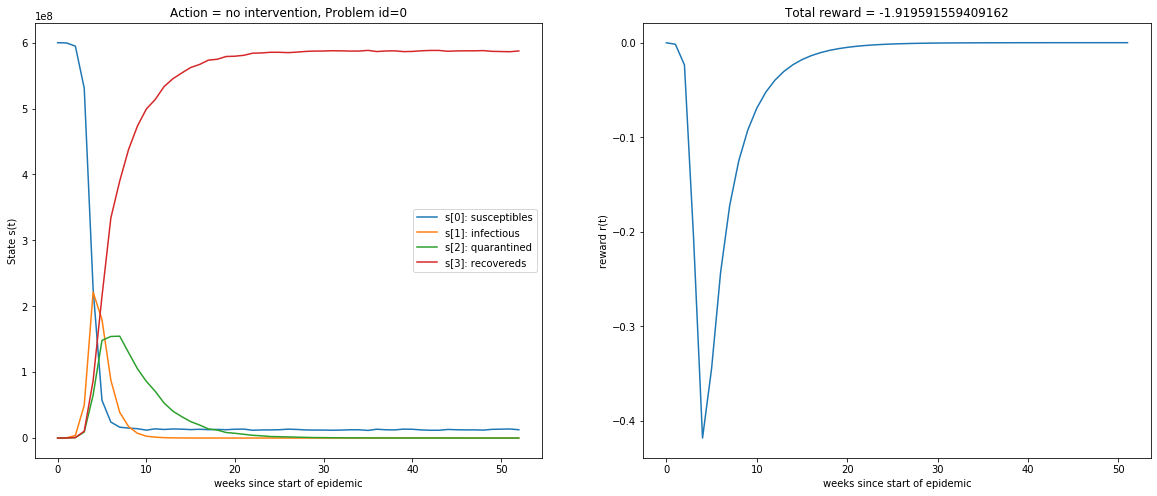

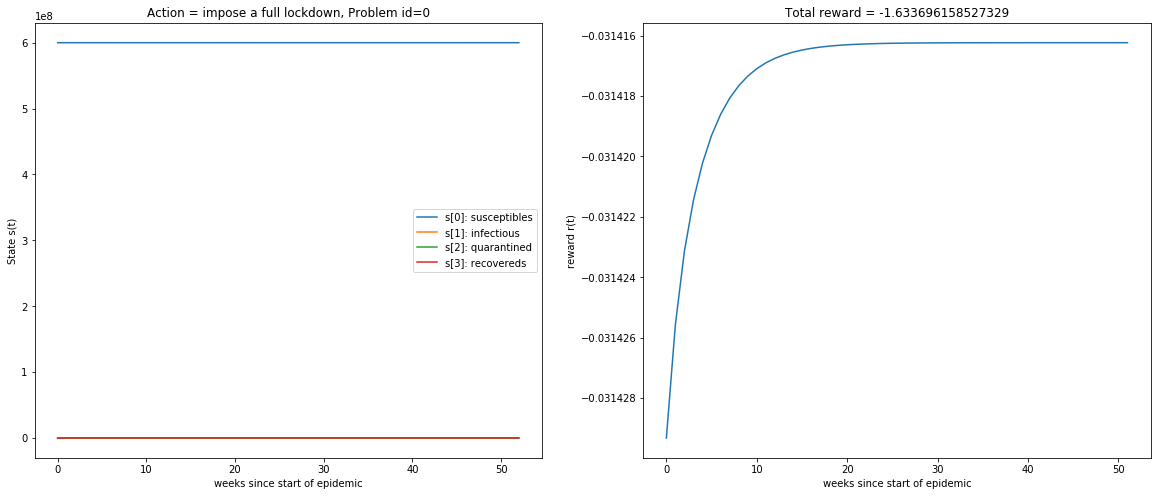

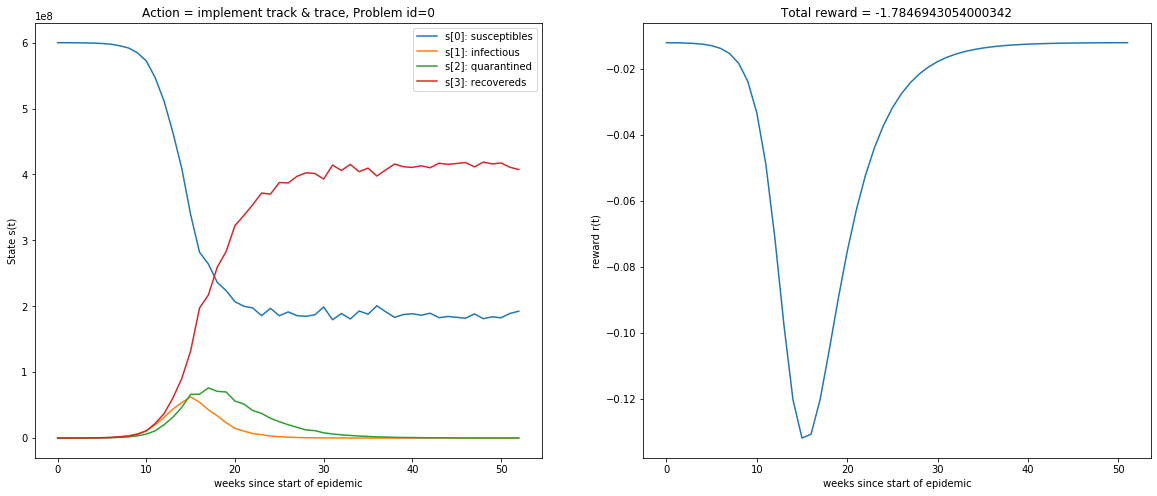

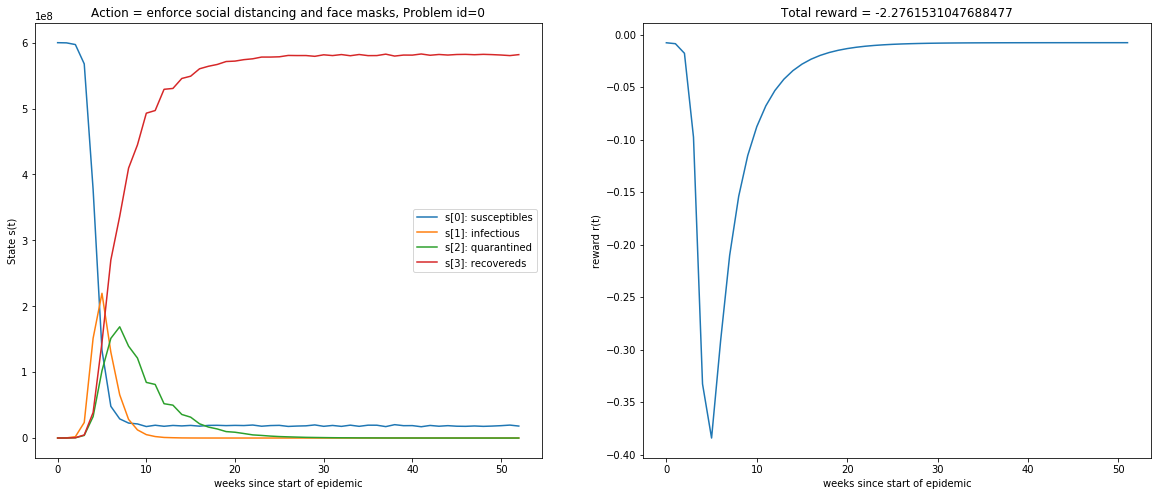

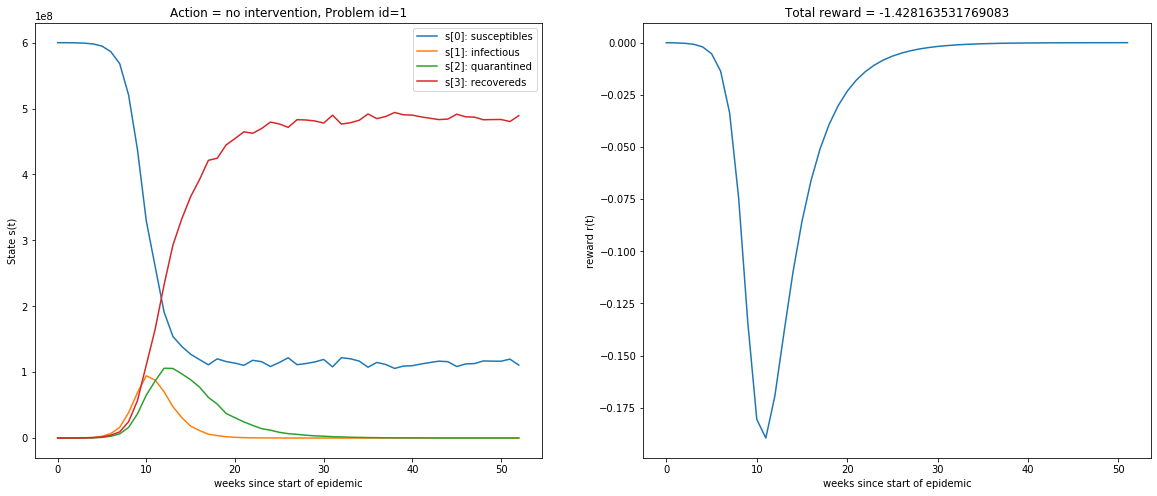

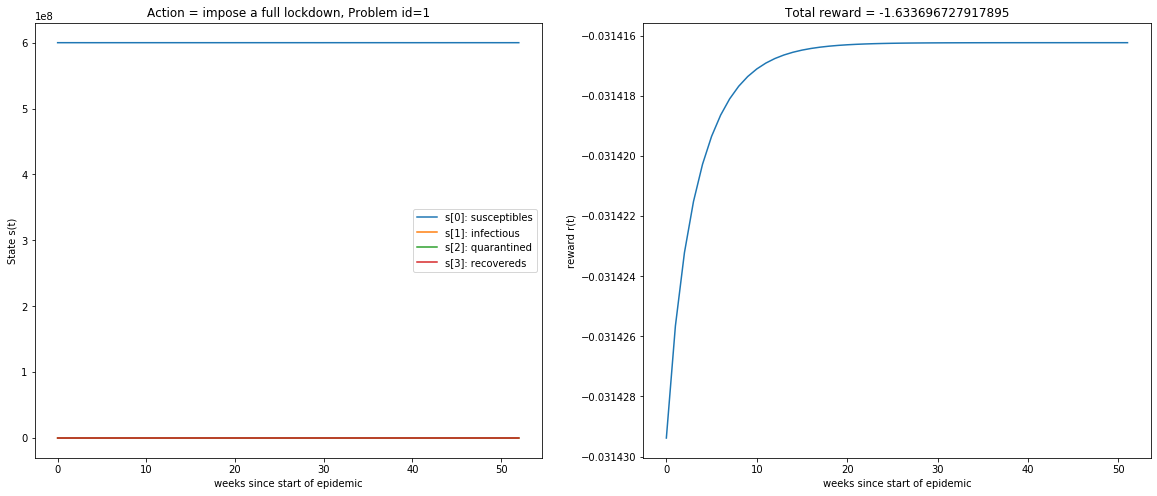

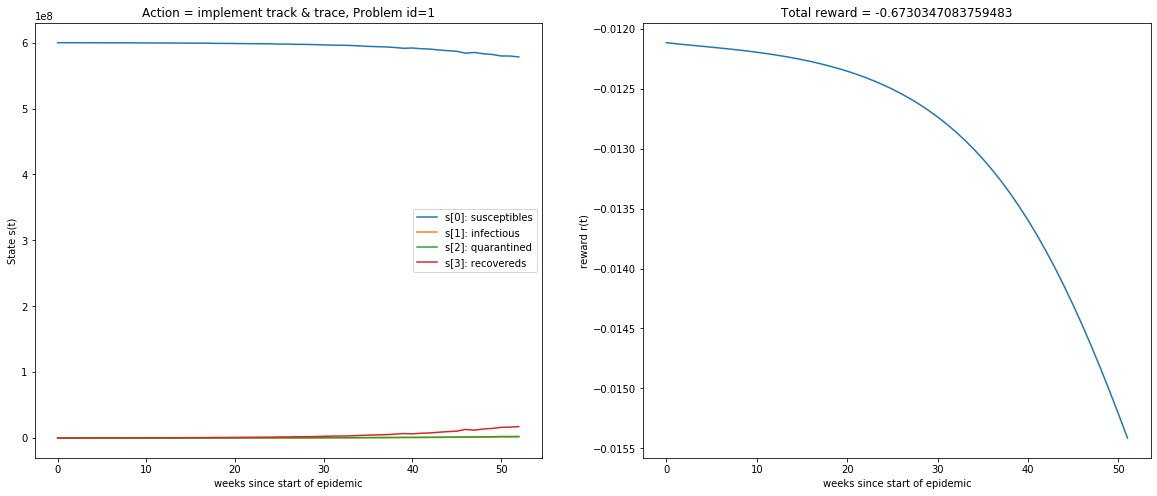

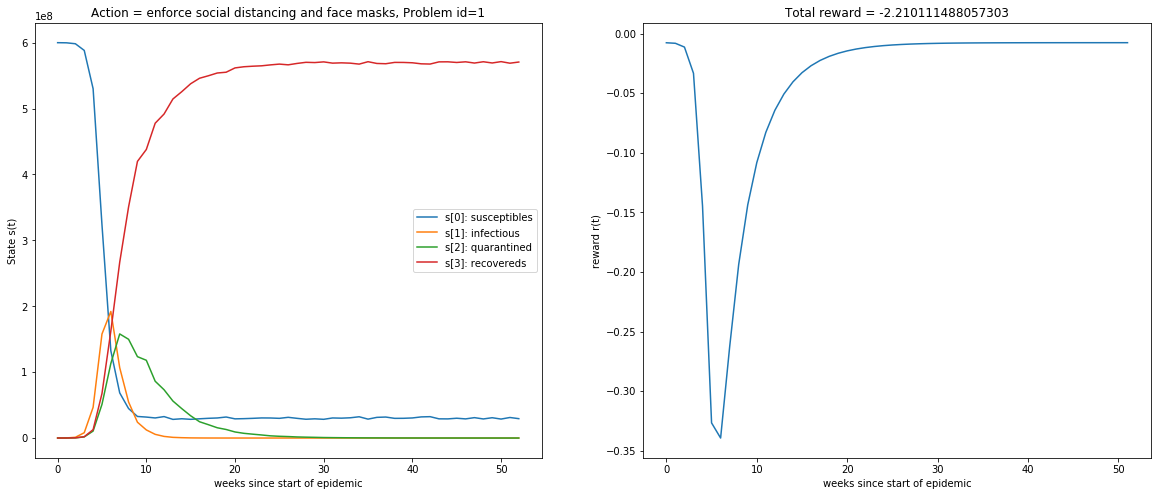

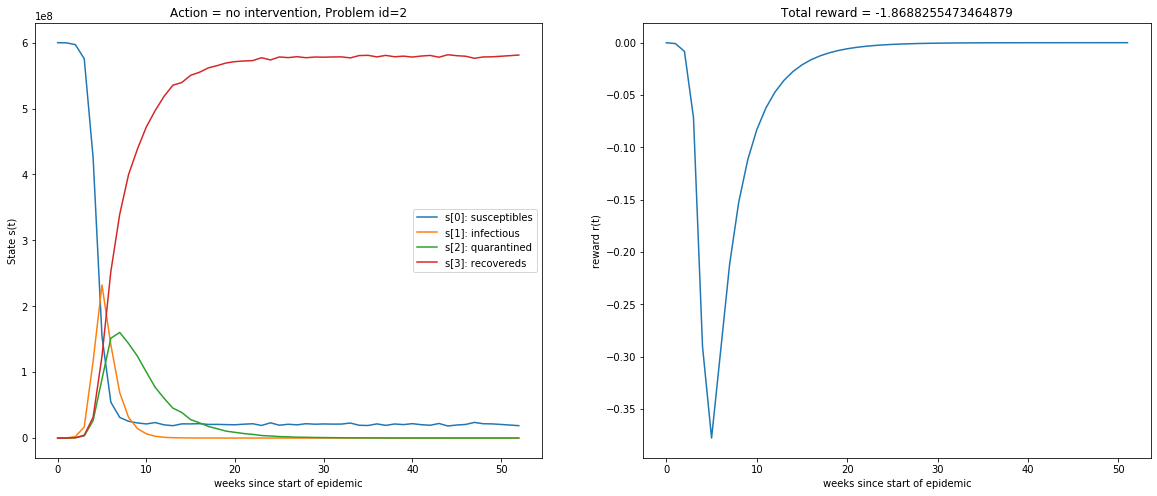

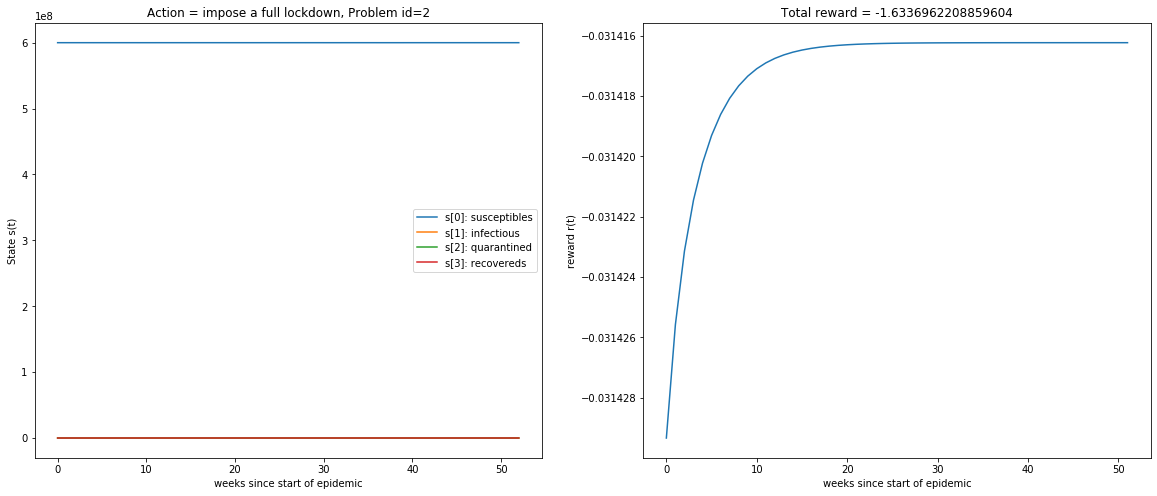

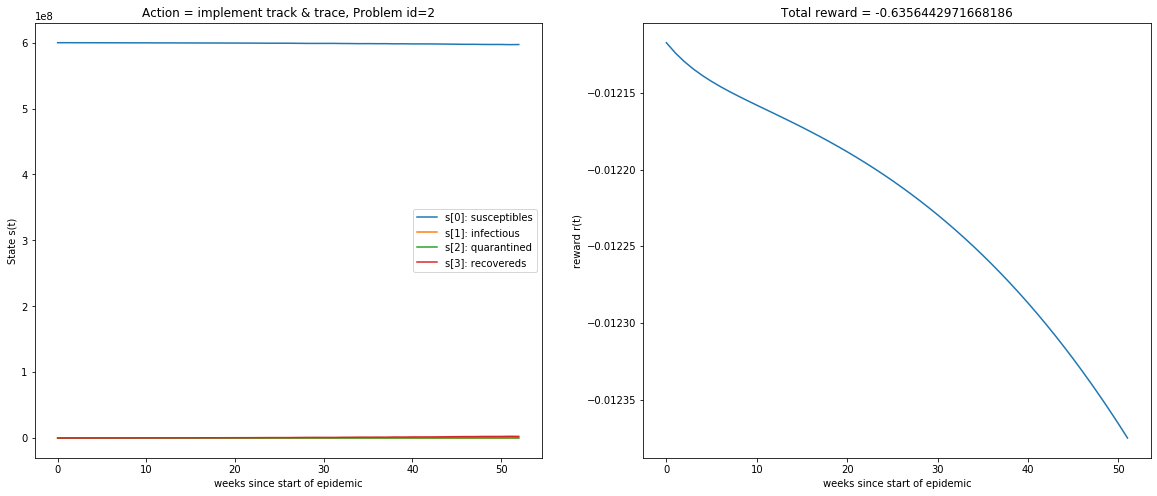

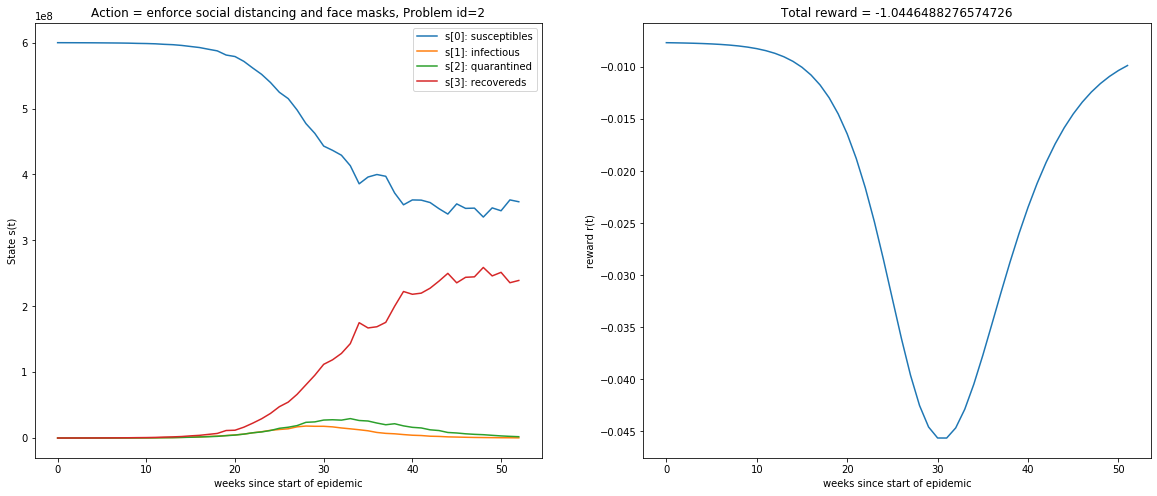

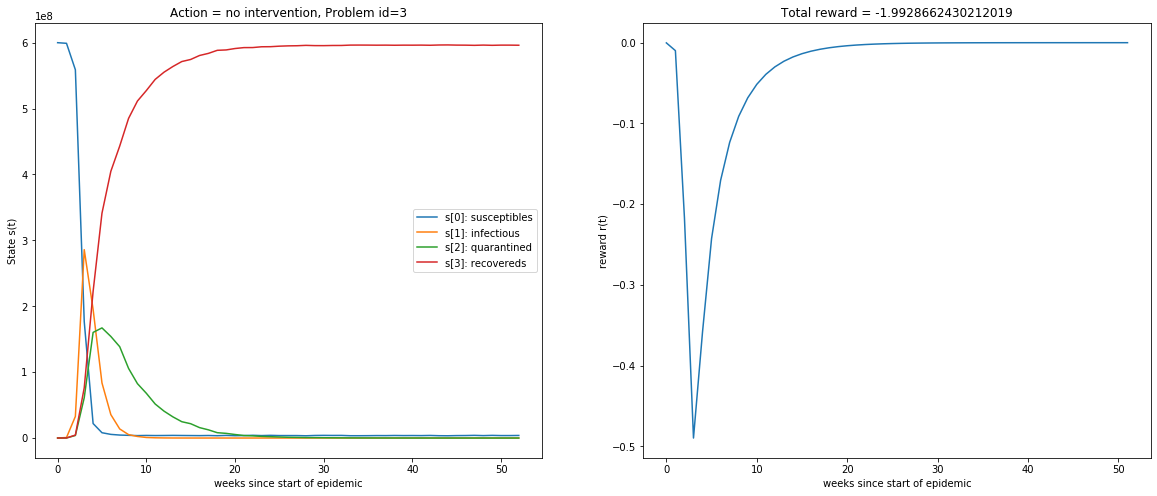

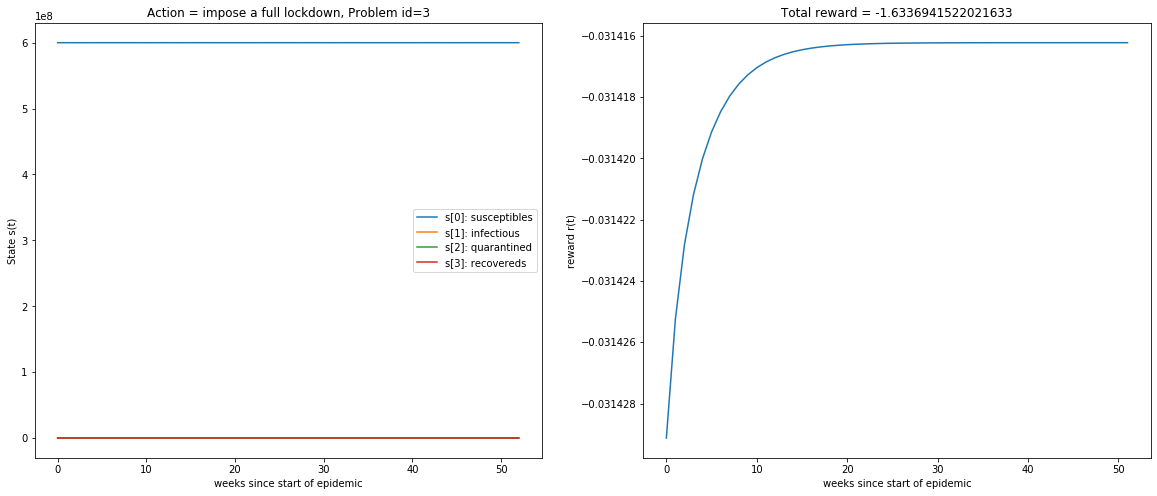

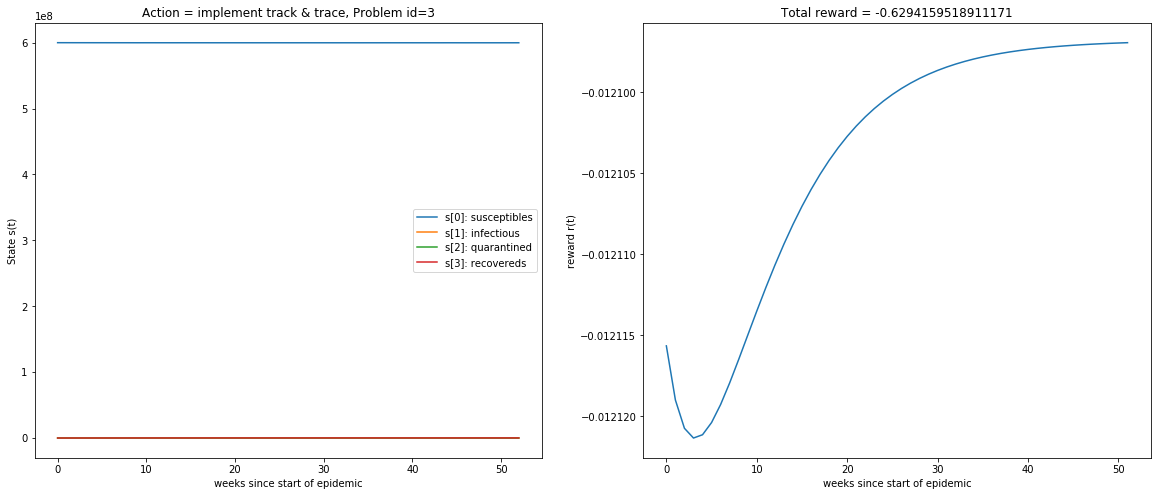

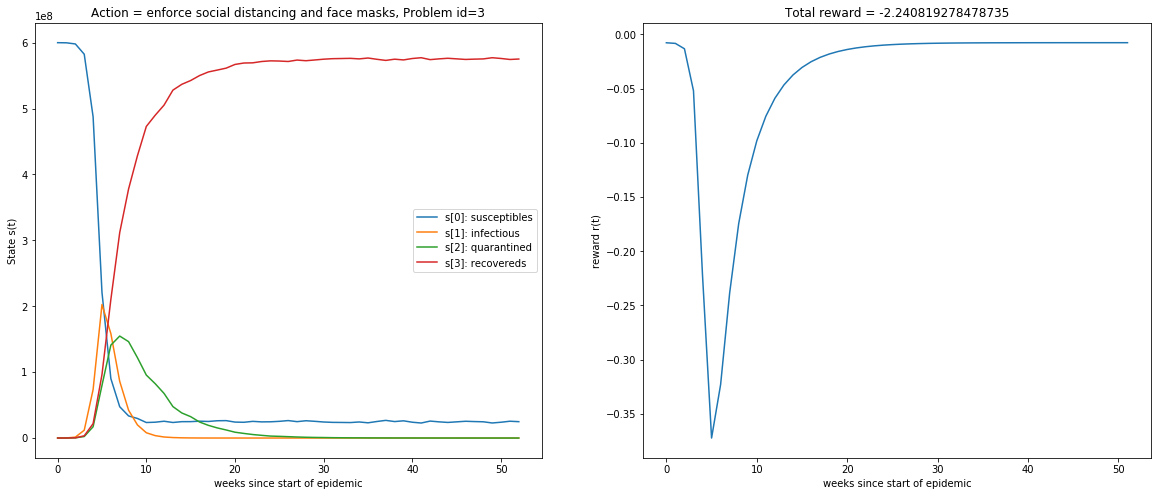

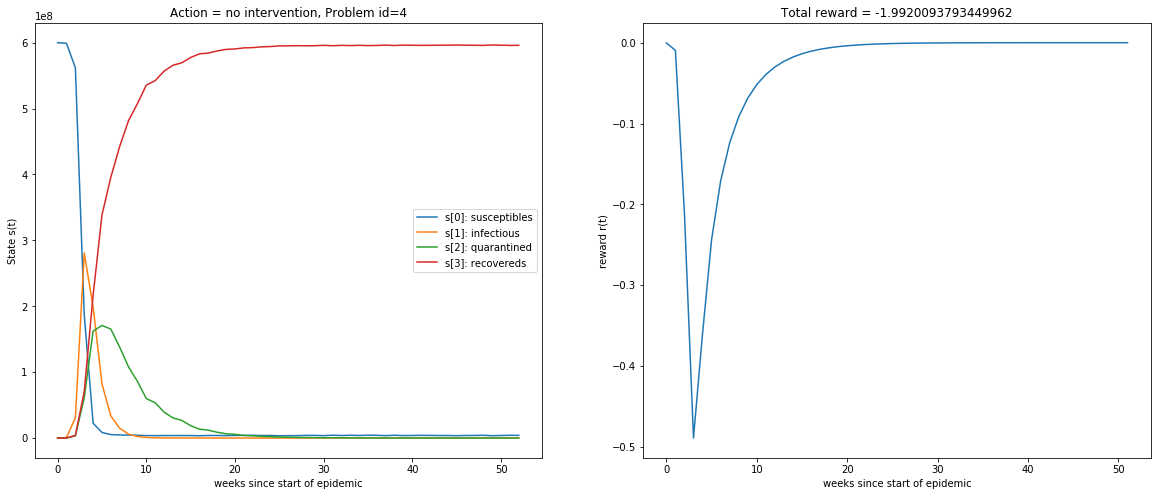

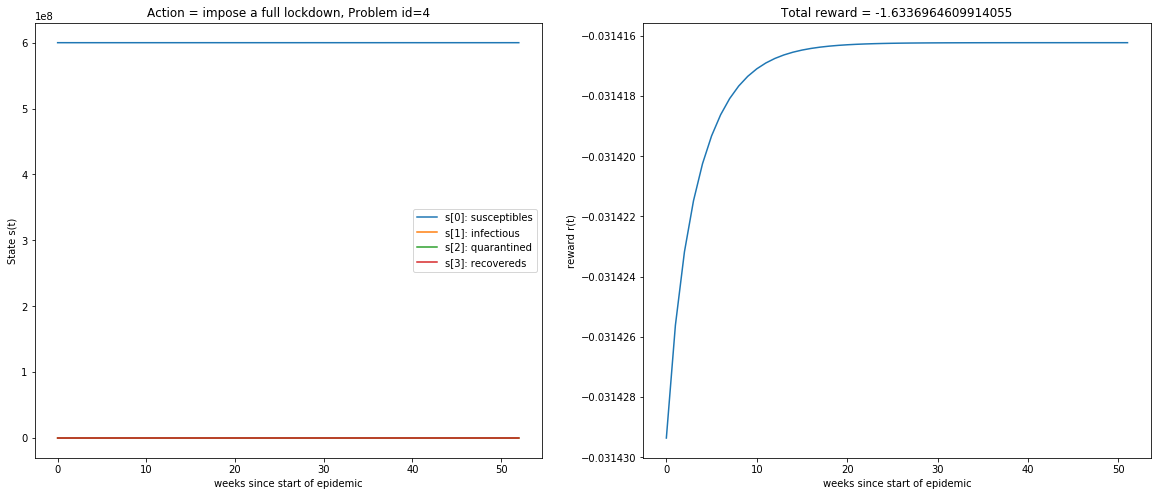

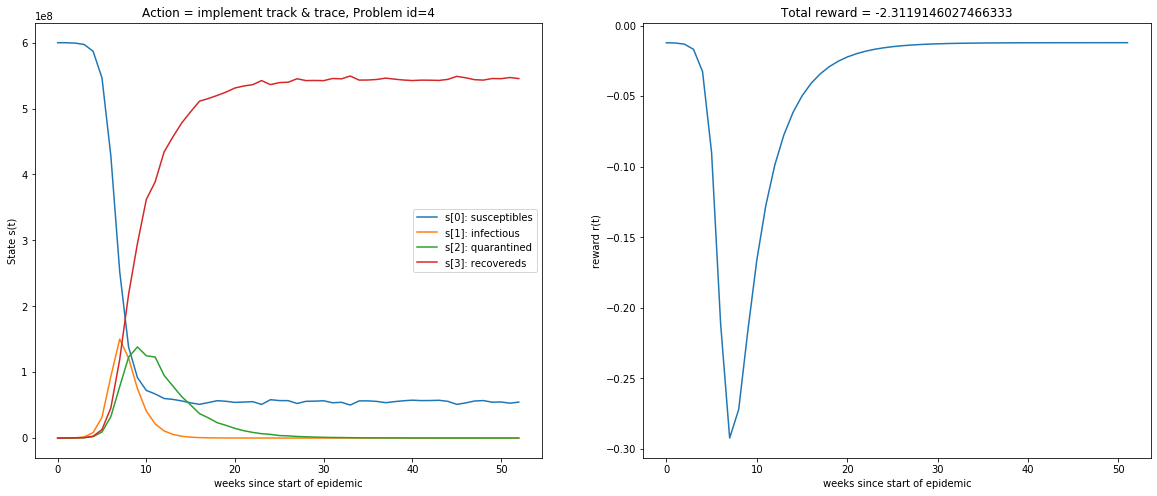

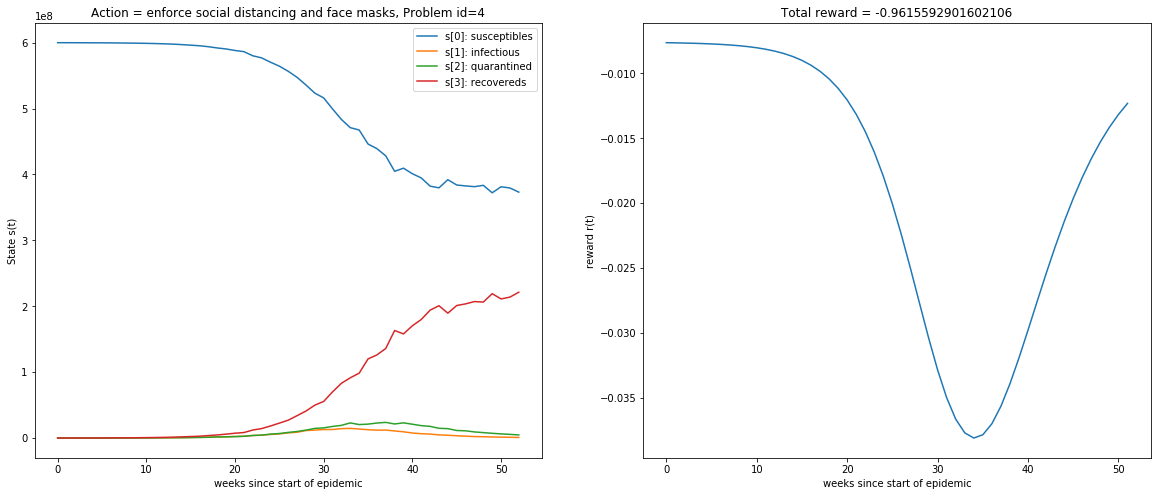

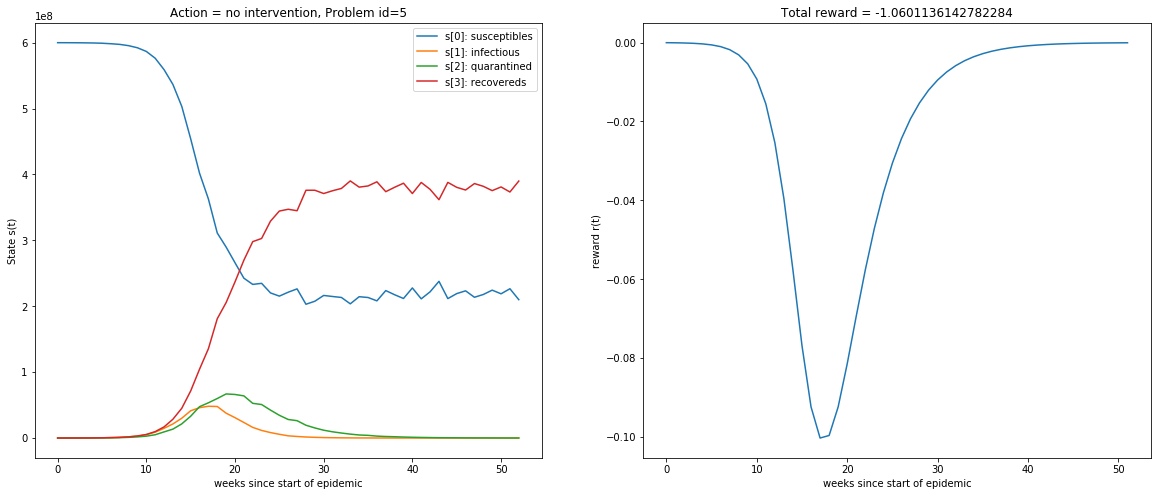

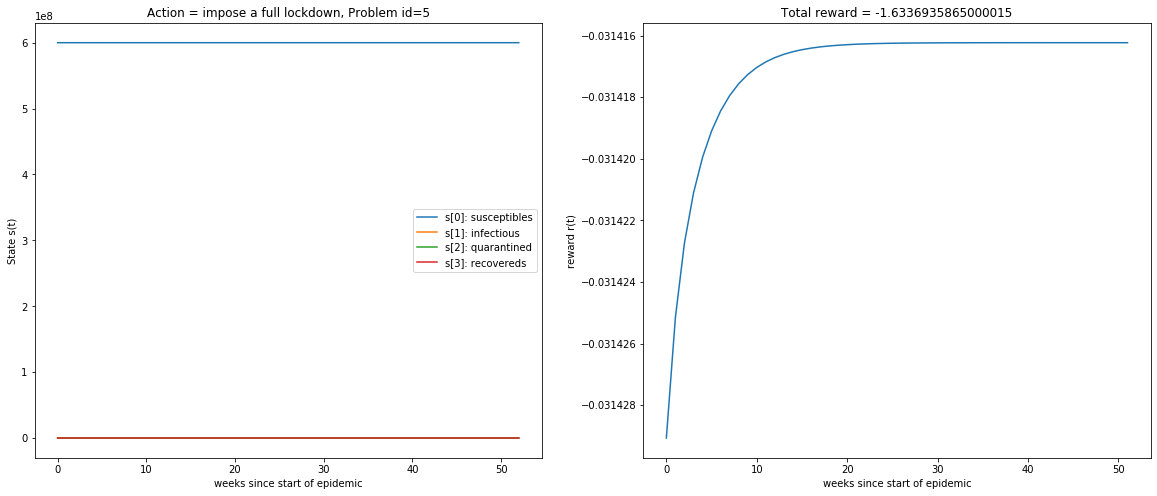

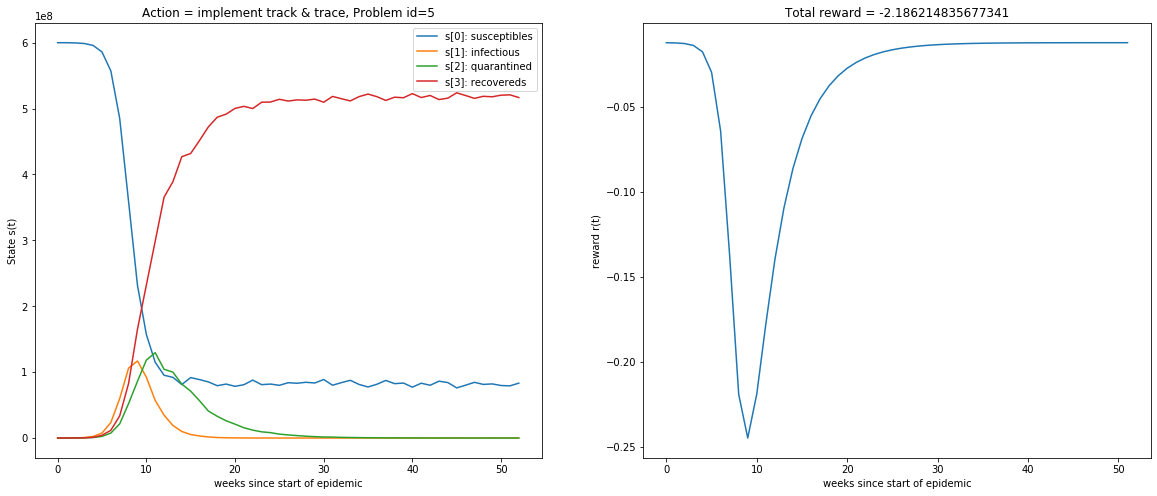

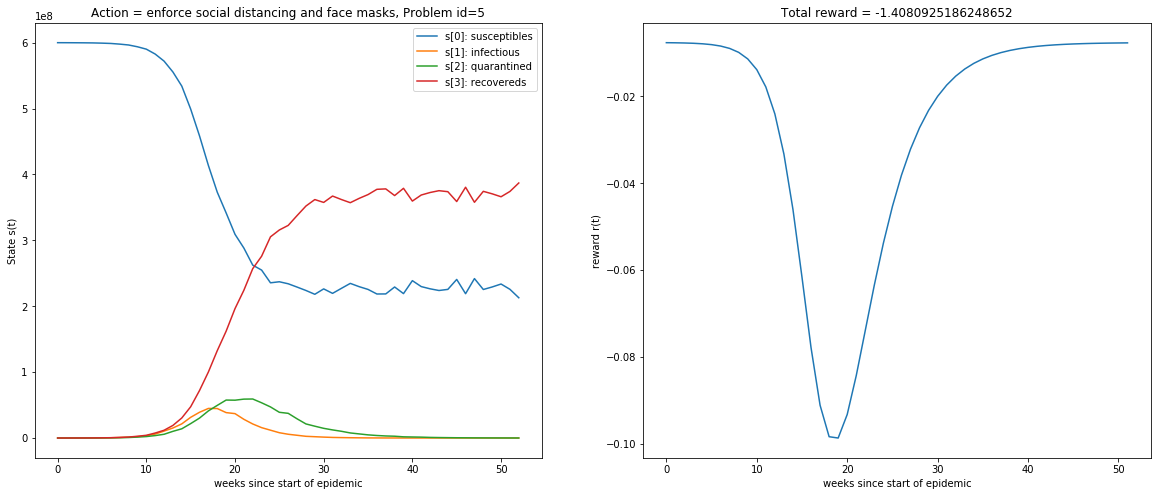

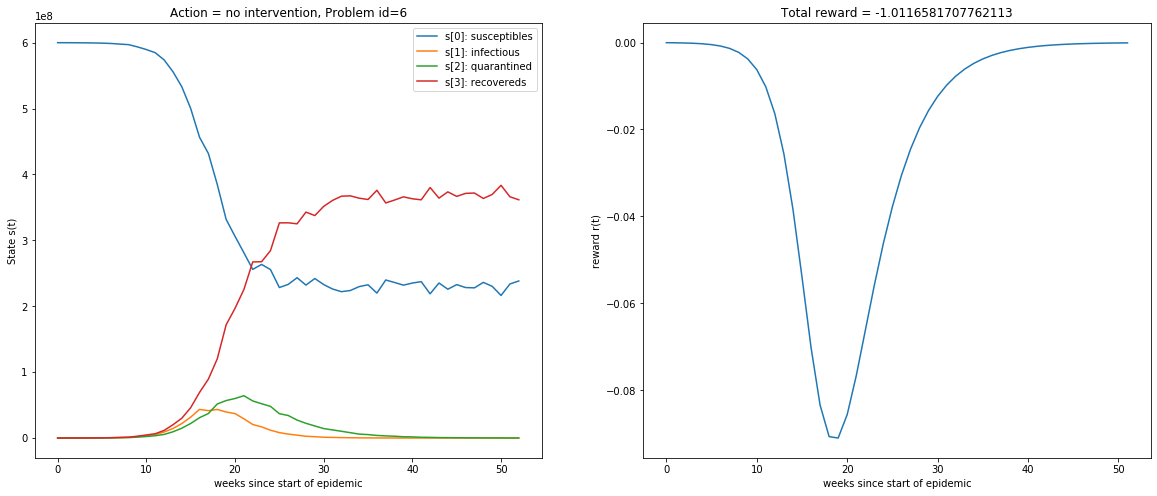

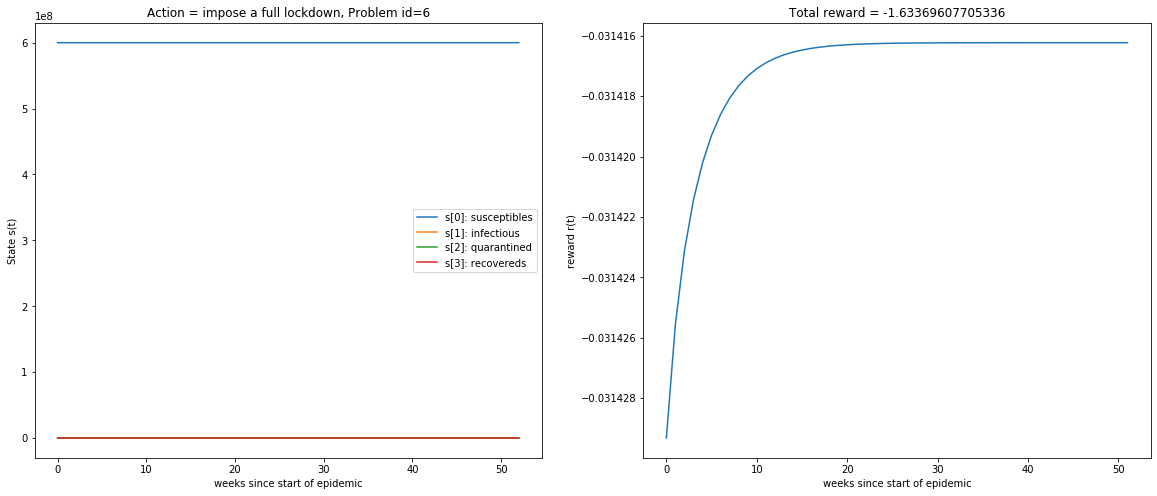

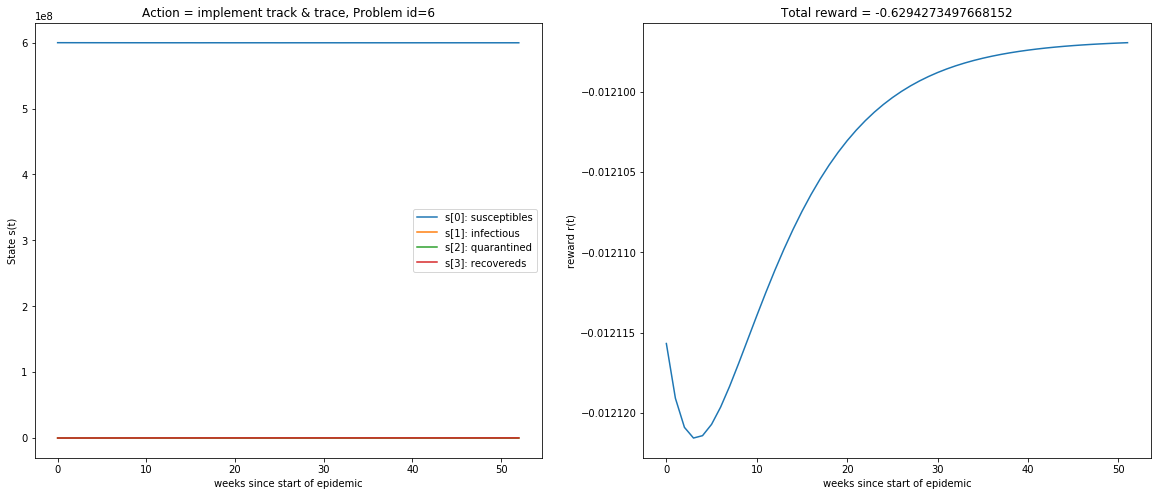

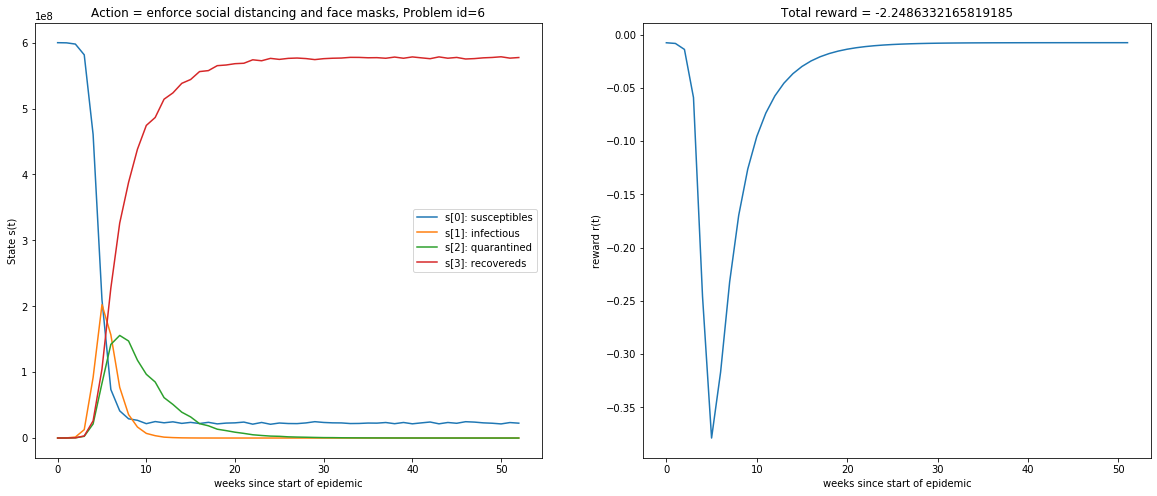

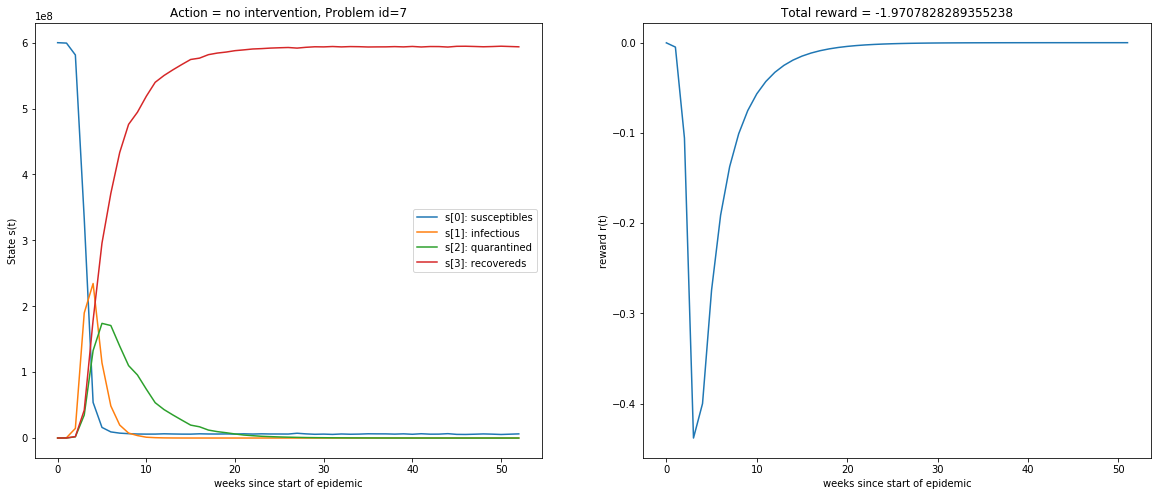

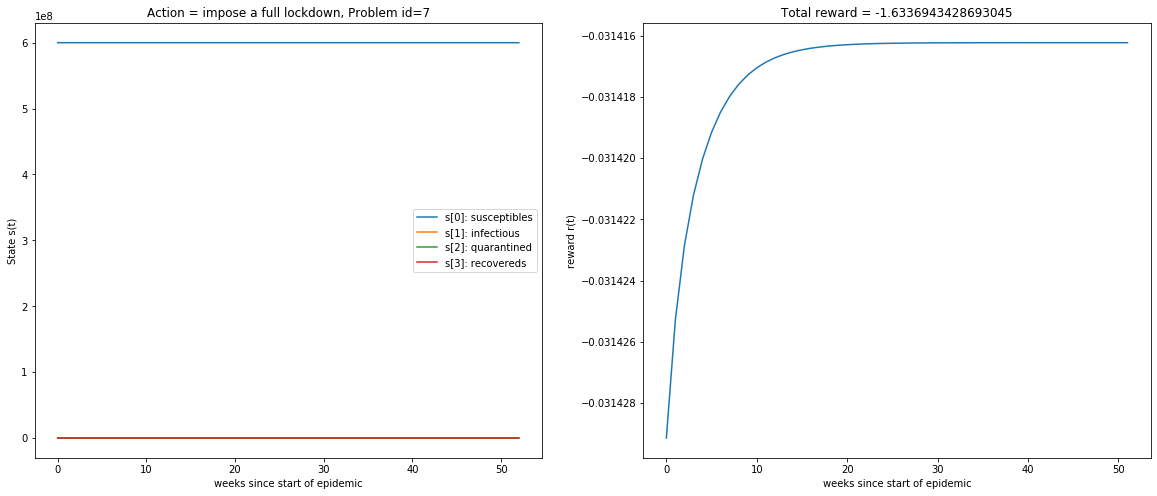

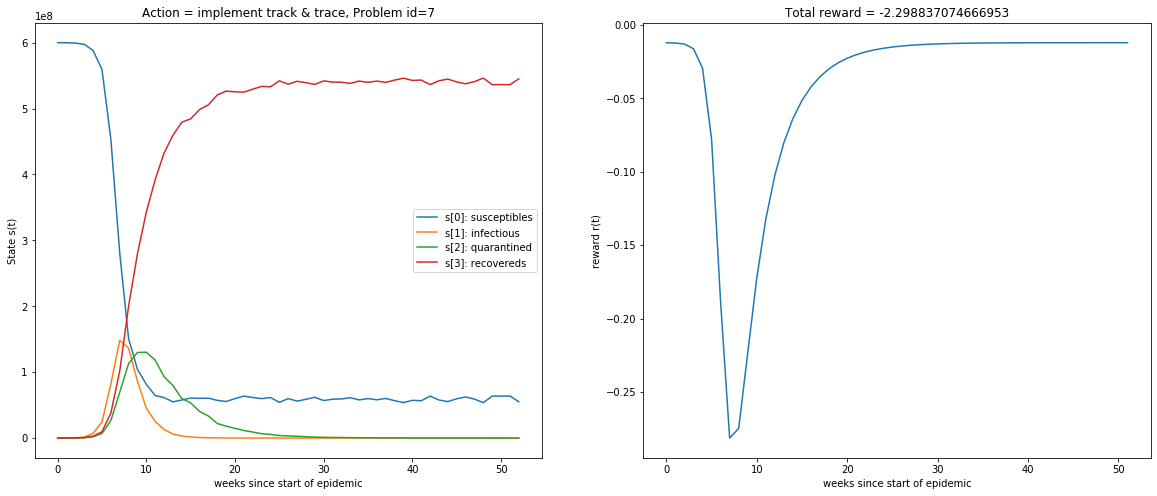

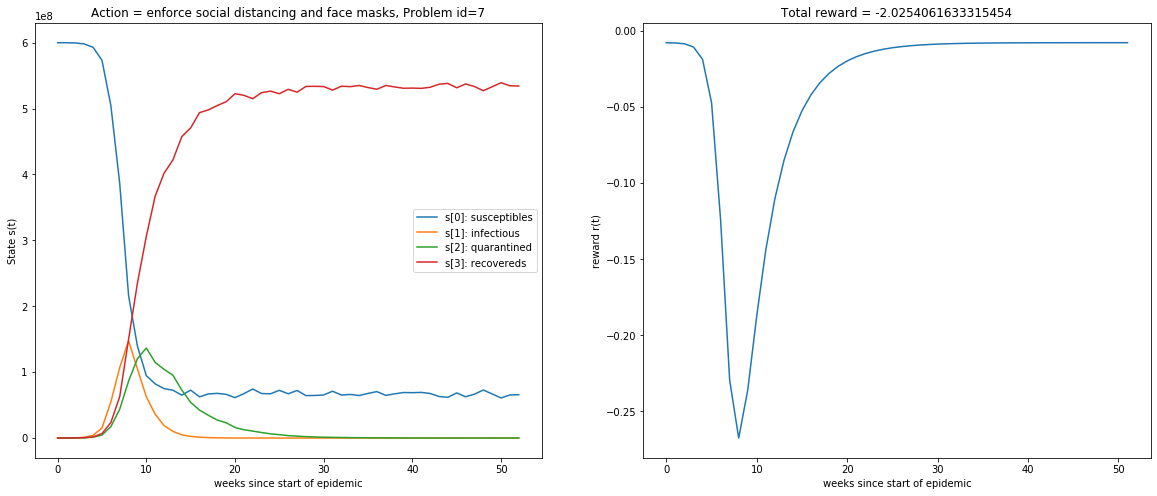

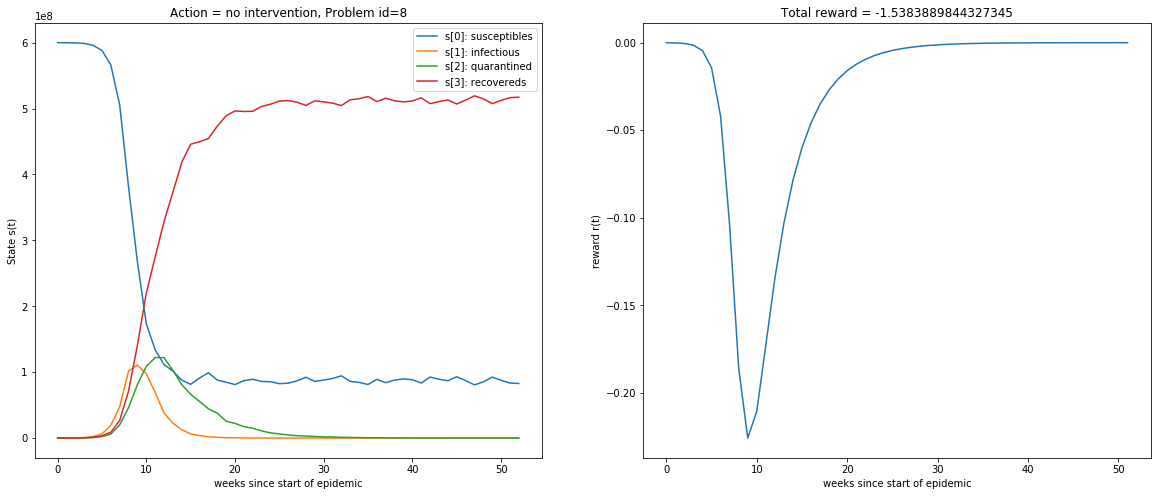

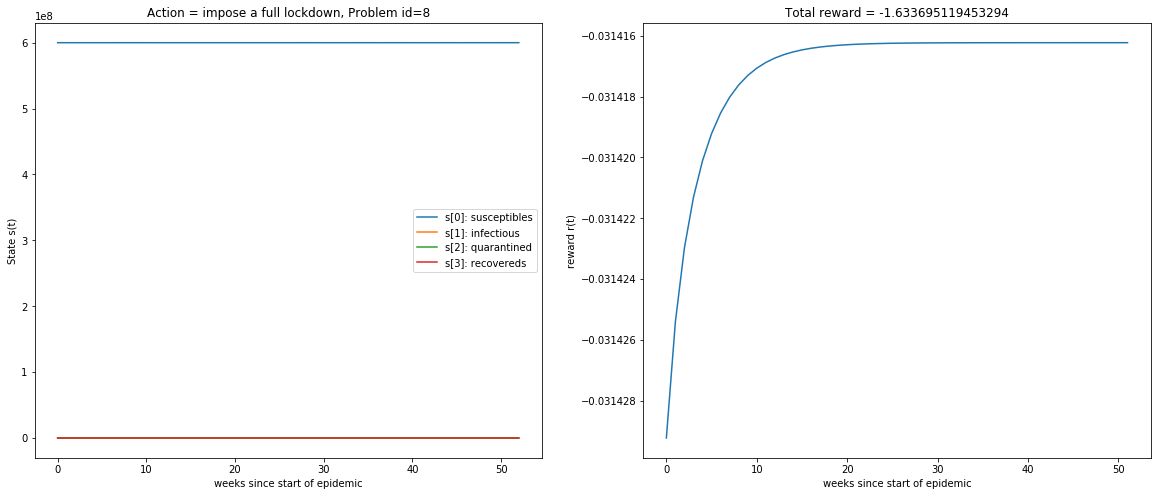

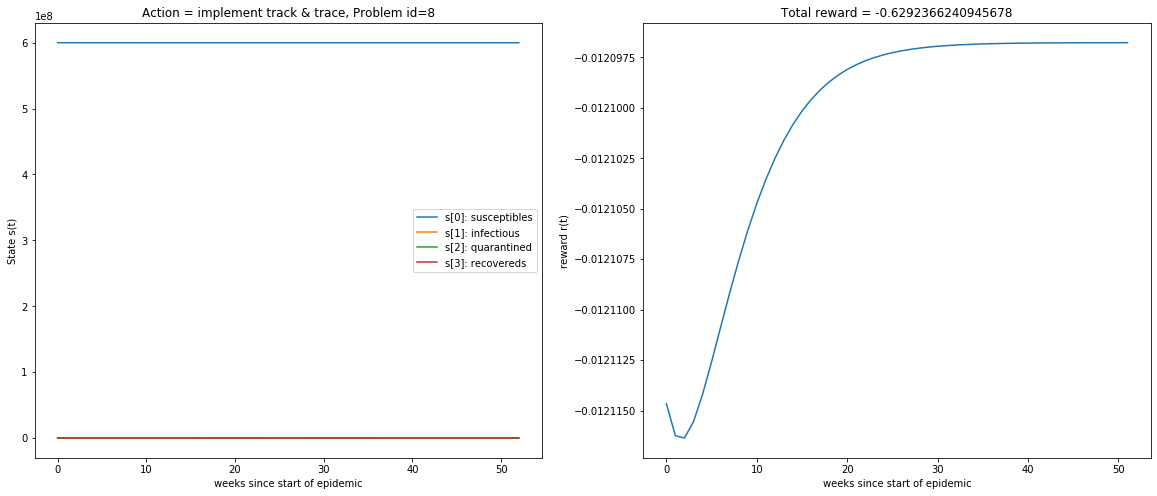

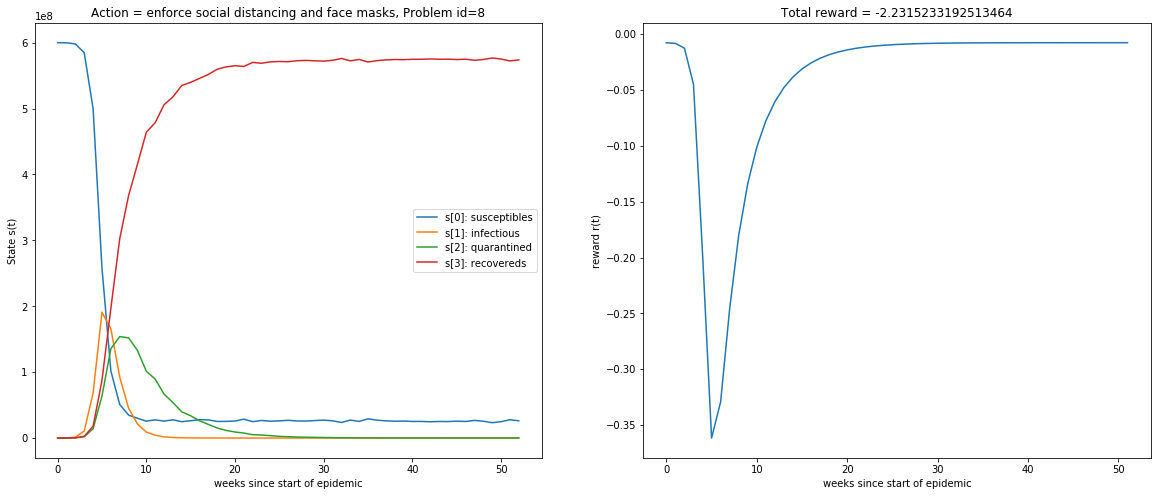

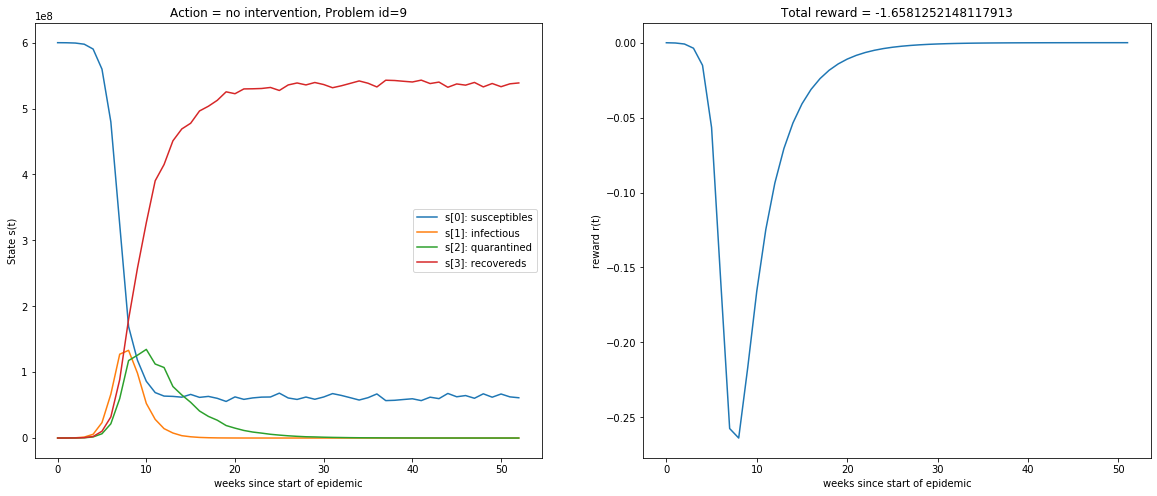

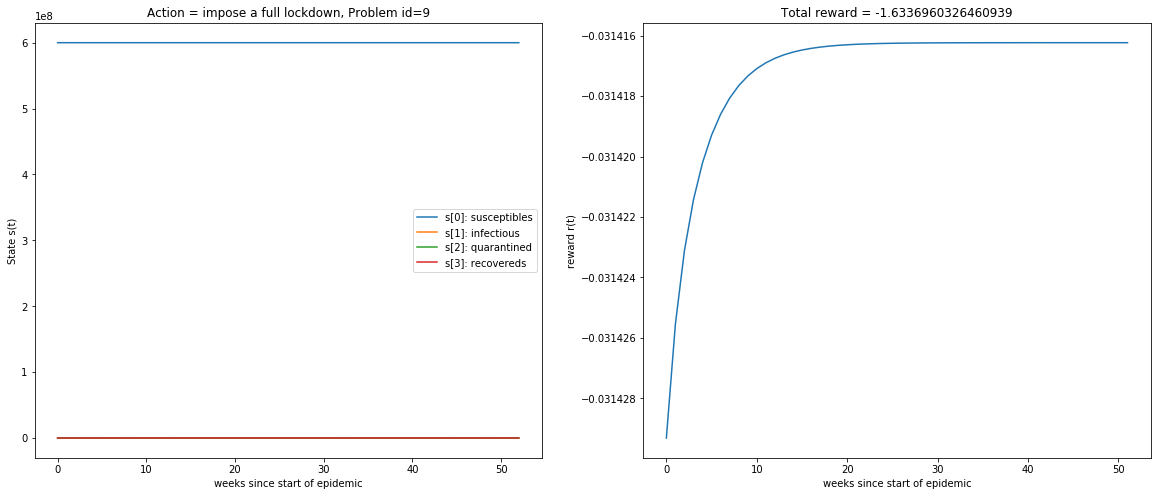

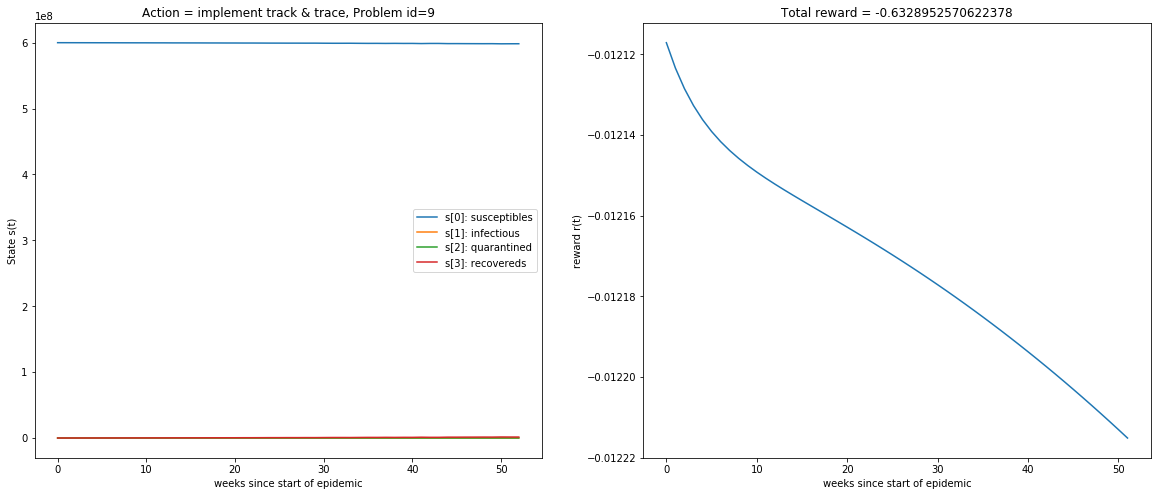

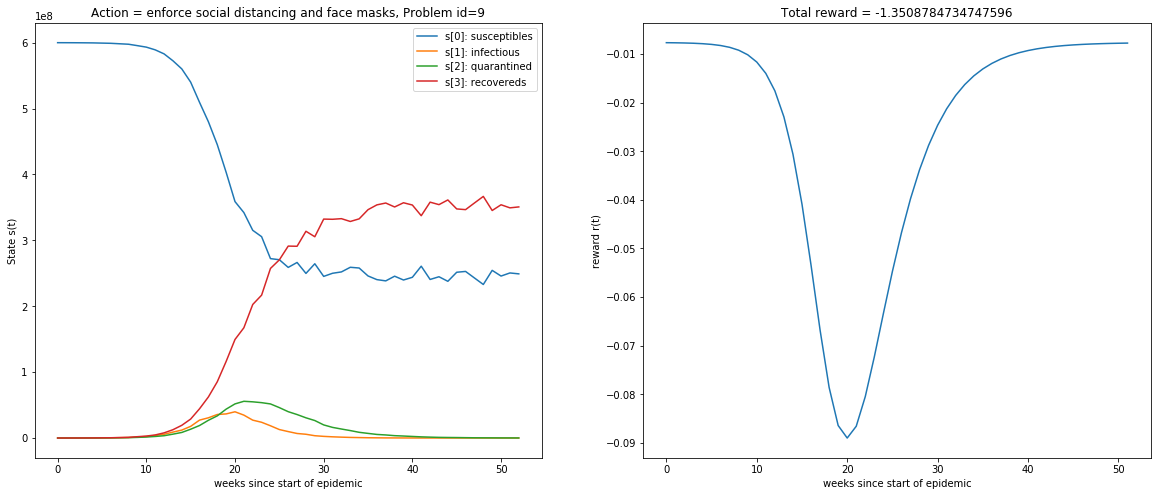

In [2]:
from DeterministicAgent import DeterministicAgent

actions = ["no intervention", "impose a full lockdown", "implement track & trace", "enforce social distancing and face masks"]
stochastic = [False, True]
noisy = [False, True]


for i in range(len(stochastic)):
    for j in range(len(noisy)):
        for action, action_text in enumerate(actions):
            env = virl.Epidemic(stochastic=stochastic[i], noisy=noisy[j])
            agent = DeterministicAgent(env, action, action_text)
            states, rewards = run(agent)
            title = ", Stochastic = " + str(stochastic[i]) + ", " "Noisy = " + str(noisy[j])
            plot(agent, states, rewards, title)

for i in range(0,10):
    for action, action_text in enumerate(actions):
        env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
        agent = DeterministicAgent(env, action, action_text)
        states, rewards = run(agent)
        title = ", Problem id=" + str(i)
        plot(agent, states, rewards, title)

## Random

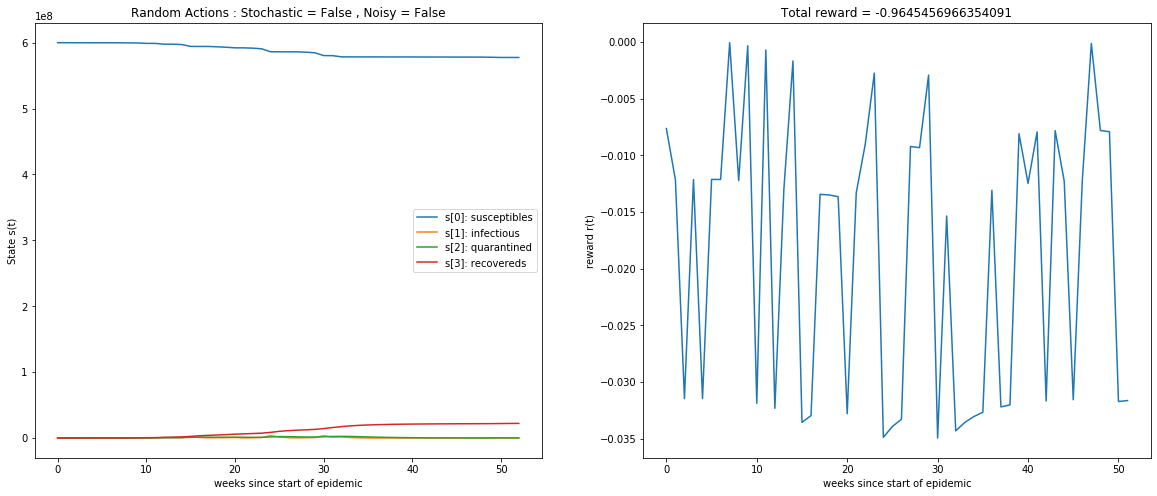

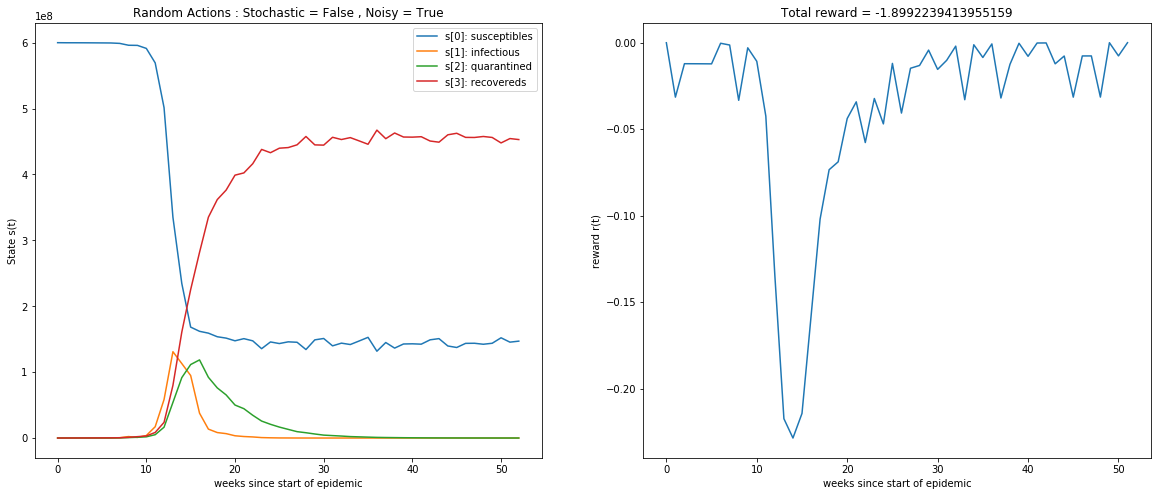

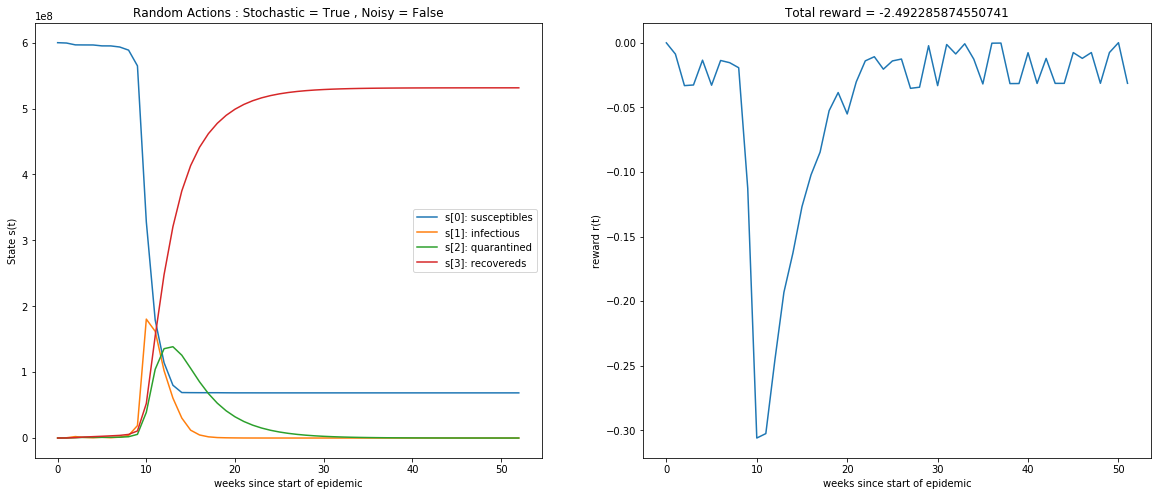

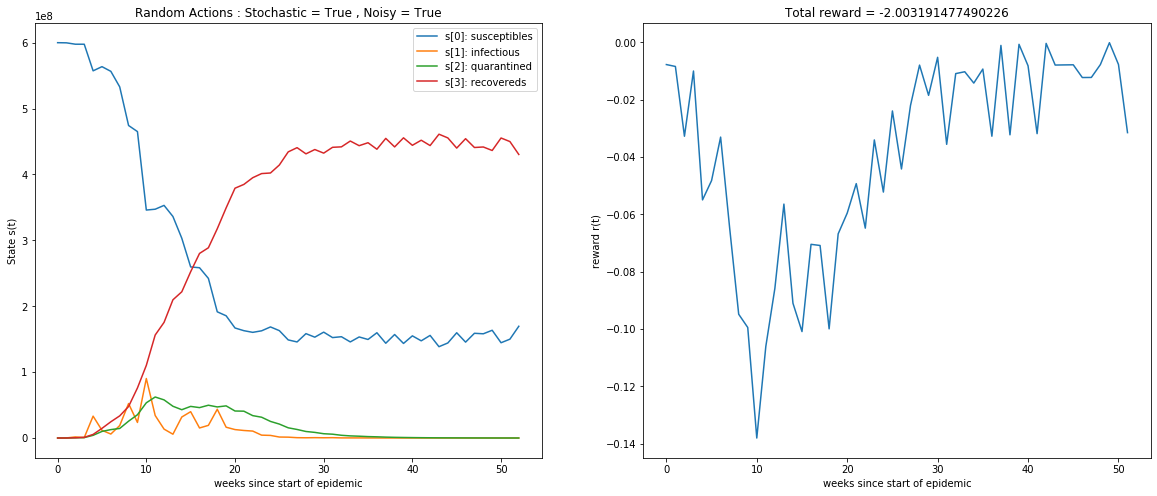

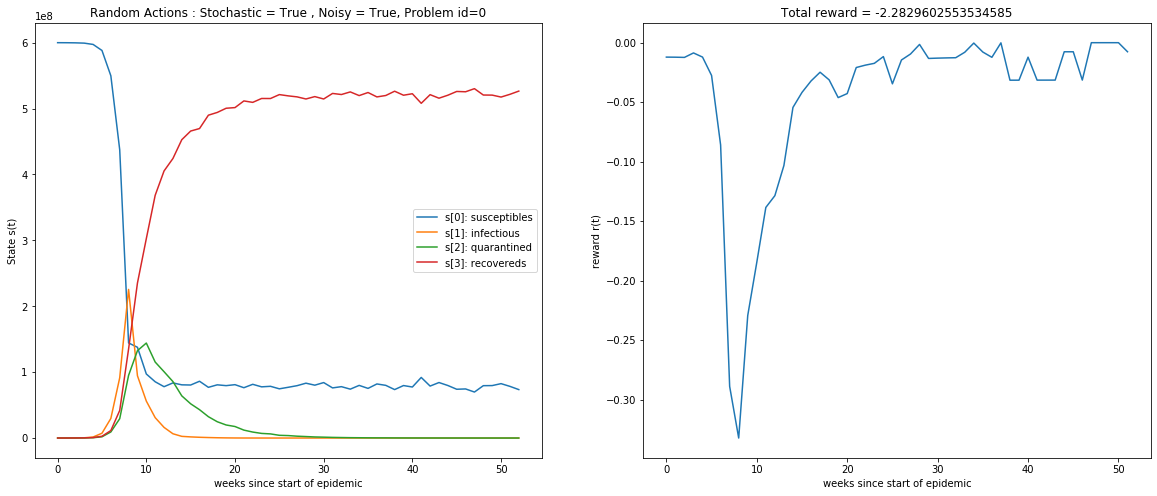

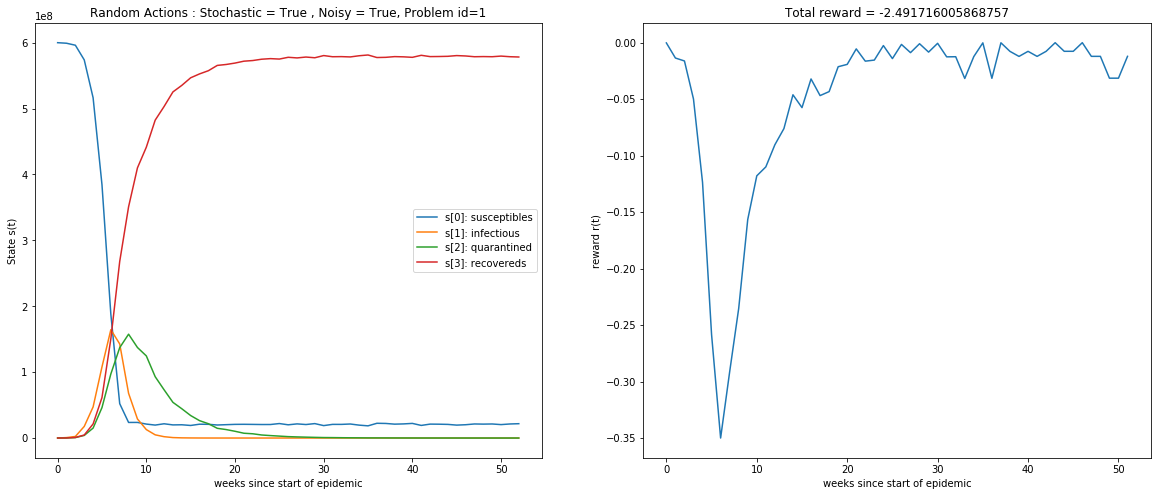

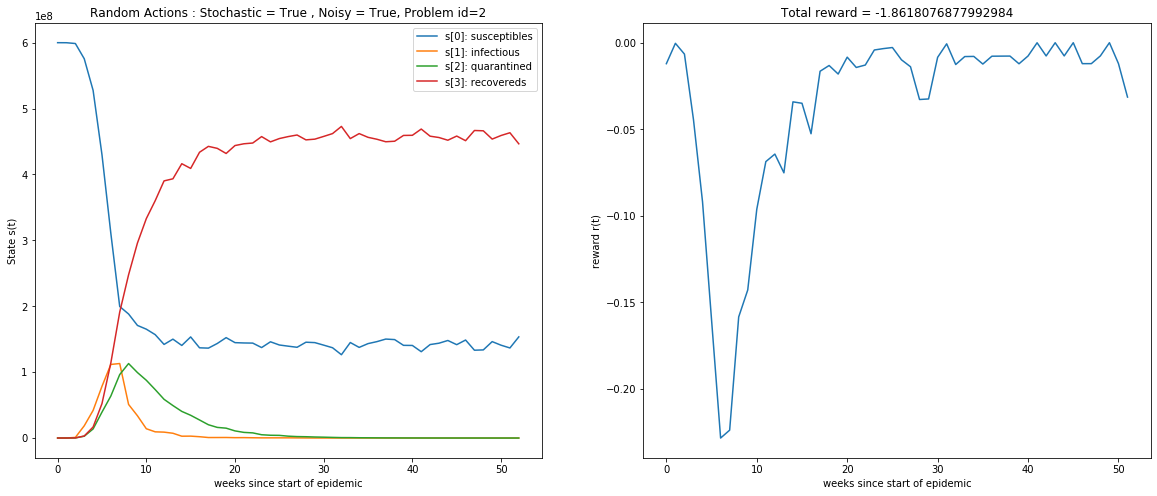

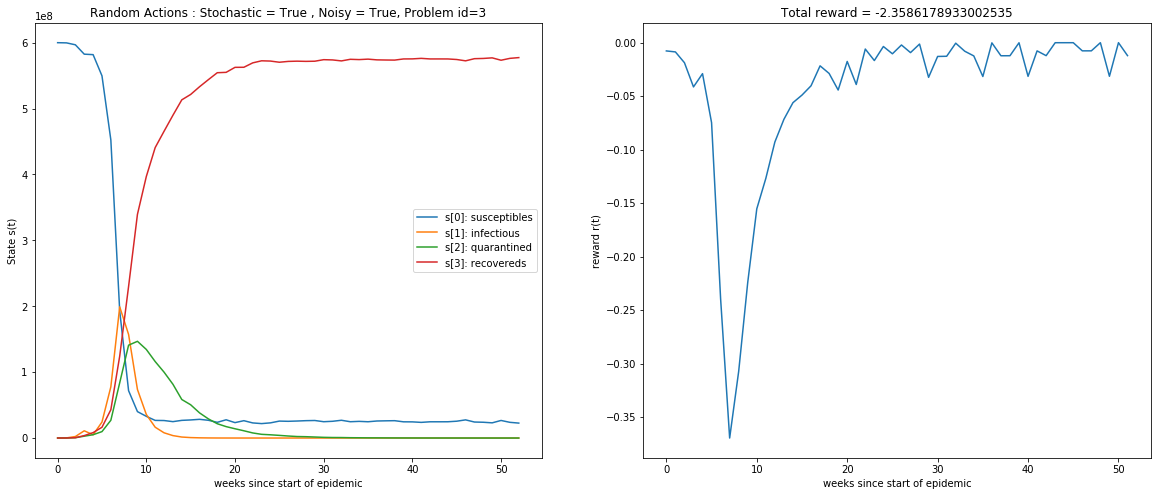

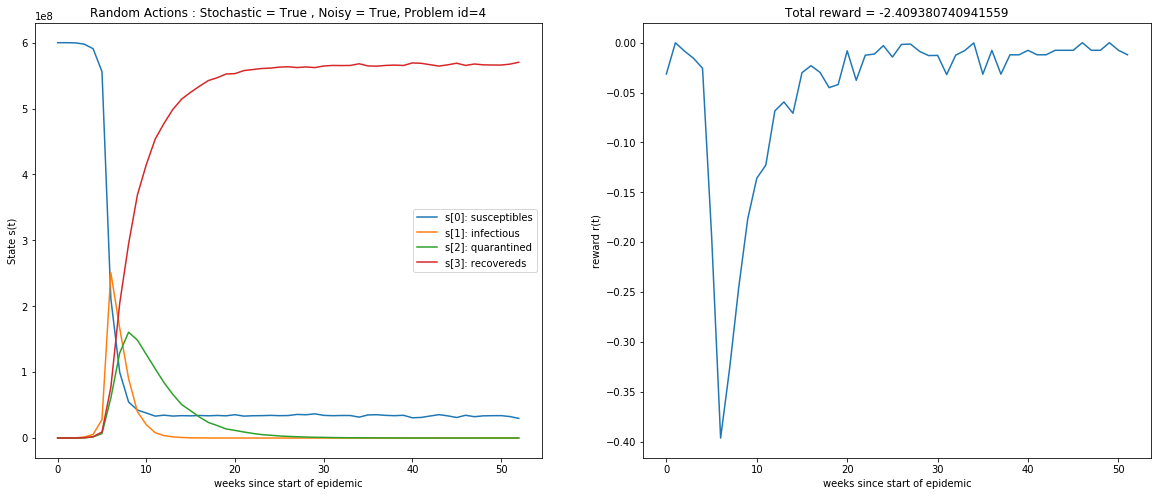

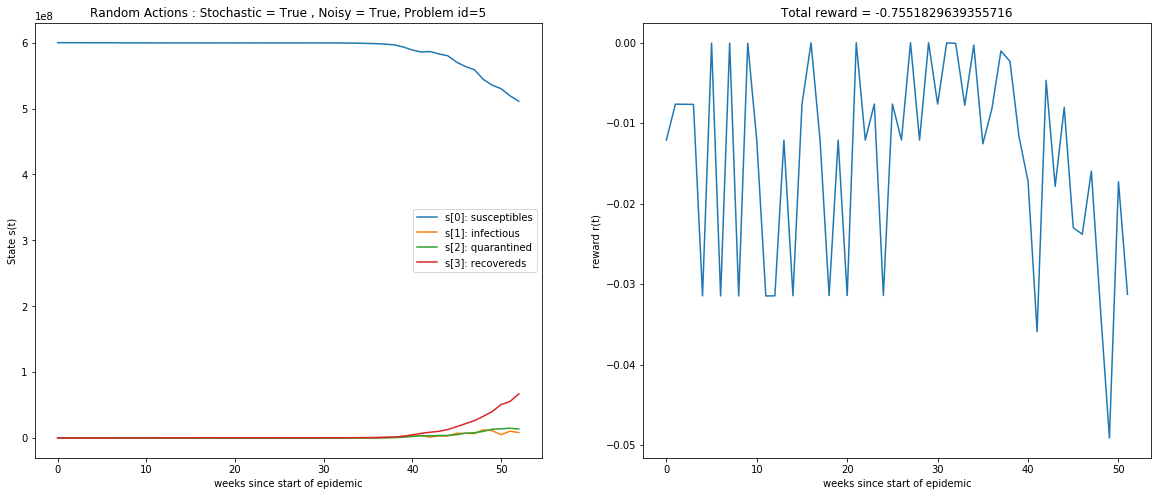

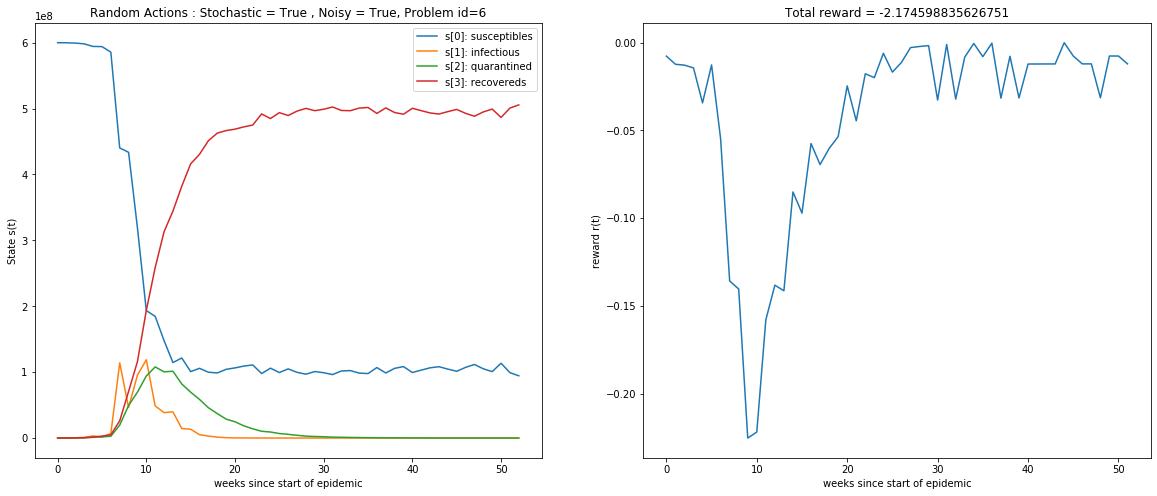

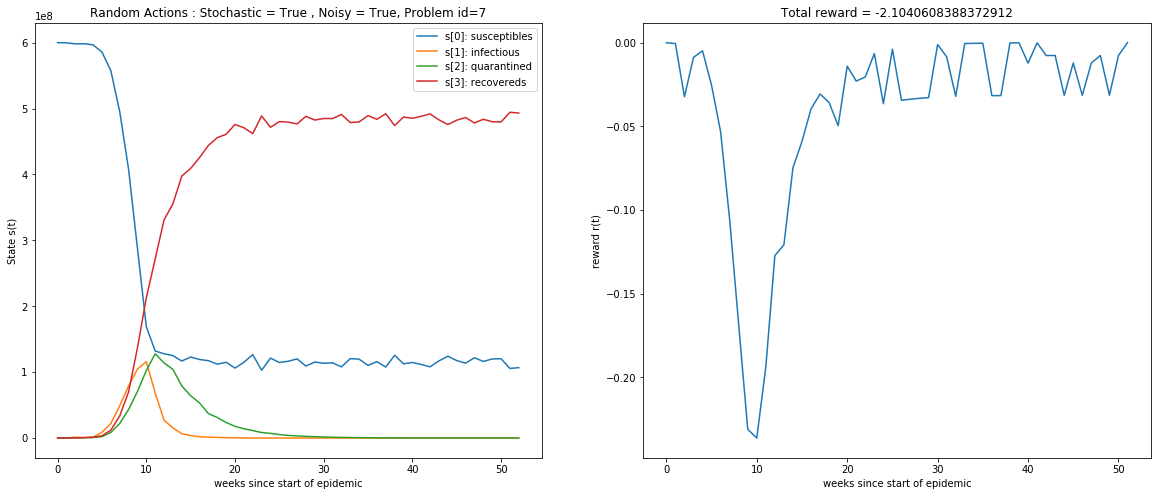

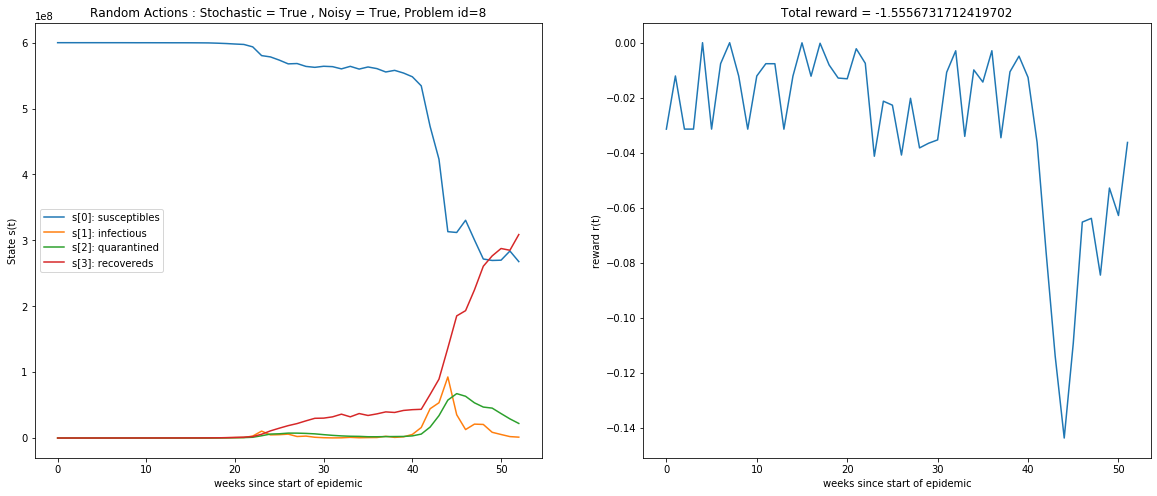

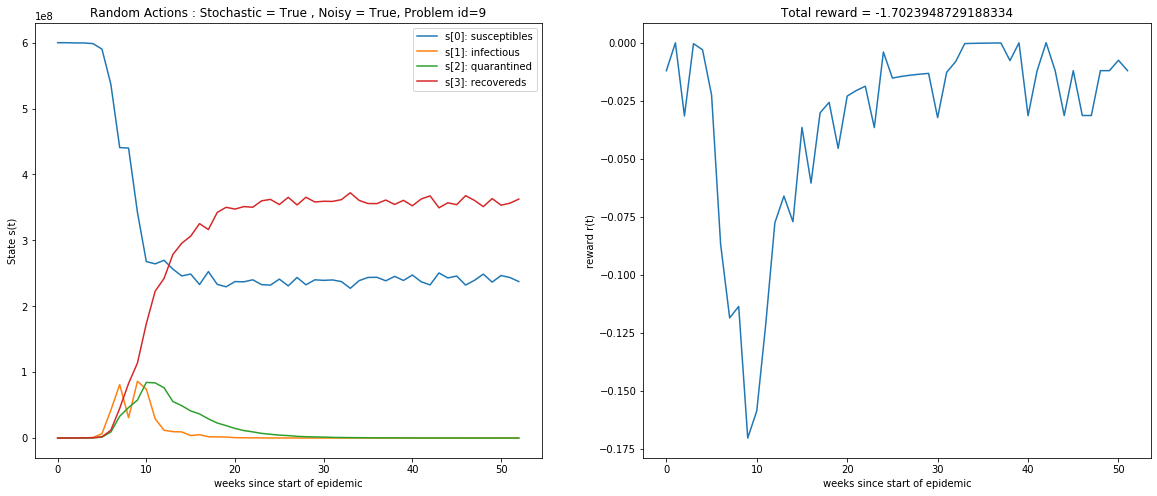

In [3]:
from RandomAgent import RandomAgent

actions = ["no intervention", "impose a full lockdown", "implement track & trace", "enforce social distancing and face masks"]
stochastic = [False, True]
noisy = [False, True]

for i in range(len(stochastic)):
    for j in range(len(noisy)):
        env = virl.Epidemic(stochastic=stochastic[i], noisy=noisy[j])
        agent = RandomAgent(env, actions)
        states, rewards = run(agent)
        plot(agent, states, rewards)
        
for i in range(0,10):
    env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
    agent = RandomAgent(env, actions)
    states, rewards = run(agent)
    title = ", Problem id=" + str(i)
    plot(agent, states, rewards, title)

## Linear Policy

In [17]:


%cd
%cd ai-coursework-group6\notebooks\linear_aprx_output
%pwd

for i in range(0,10):
    title = "Linear Policy Evaluate: problem id " + str(i) + " "
    
    
    
    intercept = np.genfromtxt("interceptP" + str(i) + ".csv", delimiter=',')
    coeff = np.genfromtxt("coeffP" + str(i) + ".csv", delimiter=',')
    state_transformed = np.genfromtxt("state_transformedP" + str(i) + ".csv", delimiter=',')
    q_values = np.genfromtxt("q_valueP" + str(i) + ".csv", delimiter=',')
    
    
    env = virl.Epidemic(stochastic=False, noisy=False)
    agent = LinearAprxAgent(env)
    
    states,all_rewards, all_total_rewards,func_approximator, state_transformed, q_value = agent.evaluate(intercept,coeff,state_transformed,q_values)
    eval_plot(states,agent, all_total_rewards, all_rewards,title)
   

C:\Users\chozo
C:\Users\chozo\ai-coursework-group6\notebooks\linear_aprx_output
Decrease Factor: 0.004


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.19753912  0.08146533 -0.03647276  0.17824717  0.06996503  0.17116969
  0.04916462 -0.19526875 -0.1345129   0.04485697 -0.10139667 -0.13692015
  0.14936436  0.12173922  0.17699426  0.19797128 -0.1291021  -0.0383892
  0.09457191  0.02078726 -0.04685246  0.11906893  0.08416981  0.01996561
 -0.14228639 -0.10859481  0.1464576   0.17278608  0.03388238  0.19641919
  0.04560948  0.13369403  0.19456181  0.07118172  0.19961354  0.03967155
 -0.09241486 -0.2        -0.19296939 -0.18500797  0.17000837  0.006878
 -0.06370371 -0.14483974  0.08754648  0.14969311  0.19762154  0.06563293
  0.18997366  0.19214859 -0.02551206 -0.19999994 -0.1701126   0.15391385
 -0.17298731 -0.15727743 -0.19426899 -0.15908884  0.13965551 -0.03599579
  0.1413223   0.16958485  0.08987711  0.19999833 -0.13145172  0.0362971
 -0.14371068 -0.13822281  0.1170696  -0.00624264 -0.04412136 -0.18706816
 -0.07134239  0.14986688 -0.08252968 -0.19925695  0.19548493  0.02317602
  0.16513569  0.10345251  0.09295451 -0.19087114  0.10739439 -0.13338815
  0.19311139 -0.11677062  0.11884762 -0.19804182 -0.11745309  0.1125531
  0.08383793 -0.03619615 -0.08193999 -0.09073233 -0.08521762  0.19885141
  0.19134879 -0.06240872 -0.18132297 -0.15761766 -0.14157549  0.19138137
 -0.07735385 -0.11587281  0.15106076  0.04478338 -0.19999803  0.16515563
  0.194614    0.16886203 -0.09365445 -0.17863632  0.16235621  0.14635759
  0.139915    0.08906587  0.13291668  0.19444844  0.16147818 -0.08152751
  0.17587118  0.02602226 -0.03672604  0.1801455   0.0901232  -0.01021604
 -0.0960871  -0.06879012  0.14525769 -0.13596981 -0.01237593  0.06003836
  0.17478342 -0.17054857 -0.19695952 -0.07184435 -0.09171293  0.08974904
 -0.15863349 -0.1501966  -0.1699745  -0.13778043 -0.11403637 -0.16055952
 -0.0763911  -0.18318364 -0.12712855  0.02658782 -0.19405484  0.13556321
 -0.03236353  0.08935734  0.01668937  0.11674466 -0.14820543  0.18848352
 -0.10501461 -0.19986457  0.12973036  0.19906622 -0.02213226 -0.1137151
 -0.17785847 -0.10848693  0.19936335 -0.14110903 -0.08141846  0.10643247
 -0.18986757 -0.12242621  0.00818377 -0.06787229  0.19384332 -0.05106323
 -0.19487911  0.00102884  0.00612858 -0.090149   -0.19979862 -0.09405414
  0.18728341  0.15089949  0.19967689  0.15995261  0.10431154 -0.08942104
  0.05697455 -0.16251399  0.1702826   0.13579722 -0.17990524  0.0772156
 -0.12288132  0.12945973  0.15646378  0.14390216  0.18741892  0.06078837
 -0.02189102 -0.07301799  0.15292885  0.01000223  0.04058934  0.18640702
  0.14857915  0.19987212 -0.06258702 -0.19945993  0.08404513  0.05520753
 -0.0752136  -0.06722162  0.14031696 -0.08899713  0.16875506  0.19353774
  0.19974422  0.0412977  -0.19957447 -0.0343929  -0.18466588  0.10617375
 -0.02860607  0.13615314  0.19988464  0.19972505 -0.18031399 -0.13125948
  0.00681101  0.04681302  0.01771581  0.14848029  0.19865368  0.02147283
  0.00707429  0.02179414  0.19856686  0.05358987 -0.02816077  0.19816712
 -0.06986523 -0.02895454 -0.17841734  0.19513531  0.18612611 -0.15801563
  0.17674358 -0.07476937  0.197313   -0.14674102  0.10797941  0.12737007
 -0.13863378 -0.16346088  0.142951    0.13223748 -0.15793047  0.11455574
 -0.04037335 -0.03364012 -0.19938591  0.19964429 -0.18558356 -0.18522308
  0.19903423 -0.07408529  0.09302579  0.06591896  0.18803939 -0.19279499
 -0.14342236 -0.00228211  0.05618293  0.19999869  0.12112372  0.19823195
  0.07875859 -0.18398057 -0.1025934   0.19351187  0.12982543  0.02527308
  0.08018459  0.19264852 -0.01006982 -0.17912273 -0.08662244  0.00320683
  0.18379308  0.11050616  0.13917276 -0.18927834  0.08482994 -0.19536691
  0.19218211  0.12502468  0.04908993  0.16061751 -0.03778235  0.17813878
  0.04062573 -0.16509734 -0.07385777  0.16166563 -0.07456583  0.15277171
 -0.18325221  0.17693932  0.12875848 -0.0566029   0.12269677 -0.15084761
 -0.08413141  0.08839649 -0.19859636 -0.06980763 -0.18967539  0.02218694
  0.19939234  0.18712074  0.17501523 -0.18845227 -0.10552686  0.03212273
  0.1922001  -0.10208545 -0.18157208  0.08381834  0.11576107  0.19996512
  0.10095127 -0.14756248 -0.14800095  0.14003387  0.15762683 -0.16853599
 -0.06593756 -0.19990303  0.1545423   0.19752872 -0.00566376 -0.03818917
 -0.16434001  0.19654813  0.00597184  0.17758333  0.18683094 -0.1690431
  0.02577198 -0.18547491  0.12479809 -0.13146504 -0.01177279  0.07445129
 -0.19919433 -0.01953264  0.1118146  -0.17452583 -0.1184473  -0.16284709
 -0.17428176  0.19997813  0.05615407  0.15164691 -0.05174714  0.08966064
  0.18947055  0.06675199  0.19154226  0.05429788  0.04839479 -0.16503003
 -0.17392825  0.14844159 -0.16860346 -0.19907858  0.11353941 -0.11184058
  0.00039911 -0.18945855 -0.19699247  0.02219282  0.19999835 -0.17045555
 -0.19649263 -0.02393683  0.04448738 -0.19999719  0.15950772 -0.11773961
  0.14383168 -0.14263205  0.17616682 -0.19321067 -0.06728354 -0.07889824
 -0.13999033 -0.19919757  0.04755208  0.04133948].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
for i in range(0,4):
    print(stochastic_noisy_print[i])
    title = "Linear Policy Evaluate:" + stochastic_noisy_print[i]
    
    intercept = np.genfromtxt("interceptP" + str(i) + ".csv", delimiter=',')
    coeff = np.genfromtxt("coeffP" + str(i) + ".csv", delimiter=',')
    state_transformed = np.genfromtxt("state_transformedP" + str(i) + ".csv", delimiter=',')
    q_value = np.genfromtxt("q_valueP" + str(i) + ".csv", delimiter=',')
    
    states,all_rewards, all_total_rewards,func_approximator, state_transformed, q_value = agent.evaluate()
    eval_plot(states,agent, all_total_rewards, all_rewards,title)

## Tabular Policy

In [ ]:
%cd
%cd ai-coursework-group6\notebooks\Tabular_Policy_Outputd
%pwd

for i in range(0,10):
    title = "Tabular Policy Evaluate: problem id " + str(i) + " "
    
    with open('TabularPolicyP' + str(i) + '.pkl', 'rb') as inpt:
        agent = pickle.load(inpt)
        states,all_rewards, all_total_rewards = agent.evaluate()
        eval_plot(states,agent, all_total_rewards, all_rewards,title)
        mean_std(all_total_rewards,all_rewards,title)
        

In [ ]:

for i in range(0,4):
    print(stochastic_noisy_print[i])
    title = "Tabular Policy  Evaluate:" + stochastic_noisy_print[i]
    
    with open('TabularPolicyS' + str(i) + '.pkl', 'rb') as inpt:
        agent = pickle.load(inpt)
    states,all_rewards, all_total_rewards = agent.evaluate()
    eval_plot(states,agent, all_total_rewards, all_rewards,title)
    mean_std(all_total_rewards,all_rewards,title)

## Q learning

C:\Users\chozo
C:\Users\chozo\ai-coursework-group6\notebooks\QLearning_output
Q Learning Evaluate: problem id 0 
Total reward standard deviation = 0.21964830334453833
Total reward mean = -1.6374107908639153
Reward standard deviation = 0.033719503272459386
Rotal reward mean = -0.03148866905507529
Q Learning Evaluate: problem id 1 
Total reward standard deviation = 0.09447681559313527
Total reward mean = -0.6605589395655617
Reward standard deviation = 0.011717175402110752
Rotal reward mean = -0.012703056530106954
Q Learning Evaluate: problem id 2 
Total reward standard deviation = 0.0784917884604112
Total reward mean = -0.6520181444336174
Reward standard deviation = 0.011704866742607858
Rotal reward mean = -0.012538810469877258
Q Learning Evaluate: problem id 3 
Total reward standard deviation = 0.2036252141288187
Total reward mean = -0.888816517543666
Reward standard deviation = 0.016074702688126236
Rotal reward mean = -0.017092625337378188
Q Learning Evaluate: problem id 4 
Total rewar

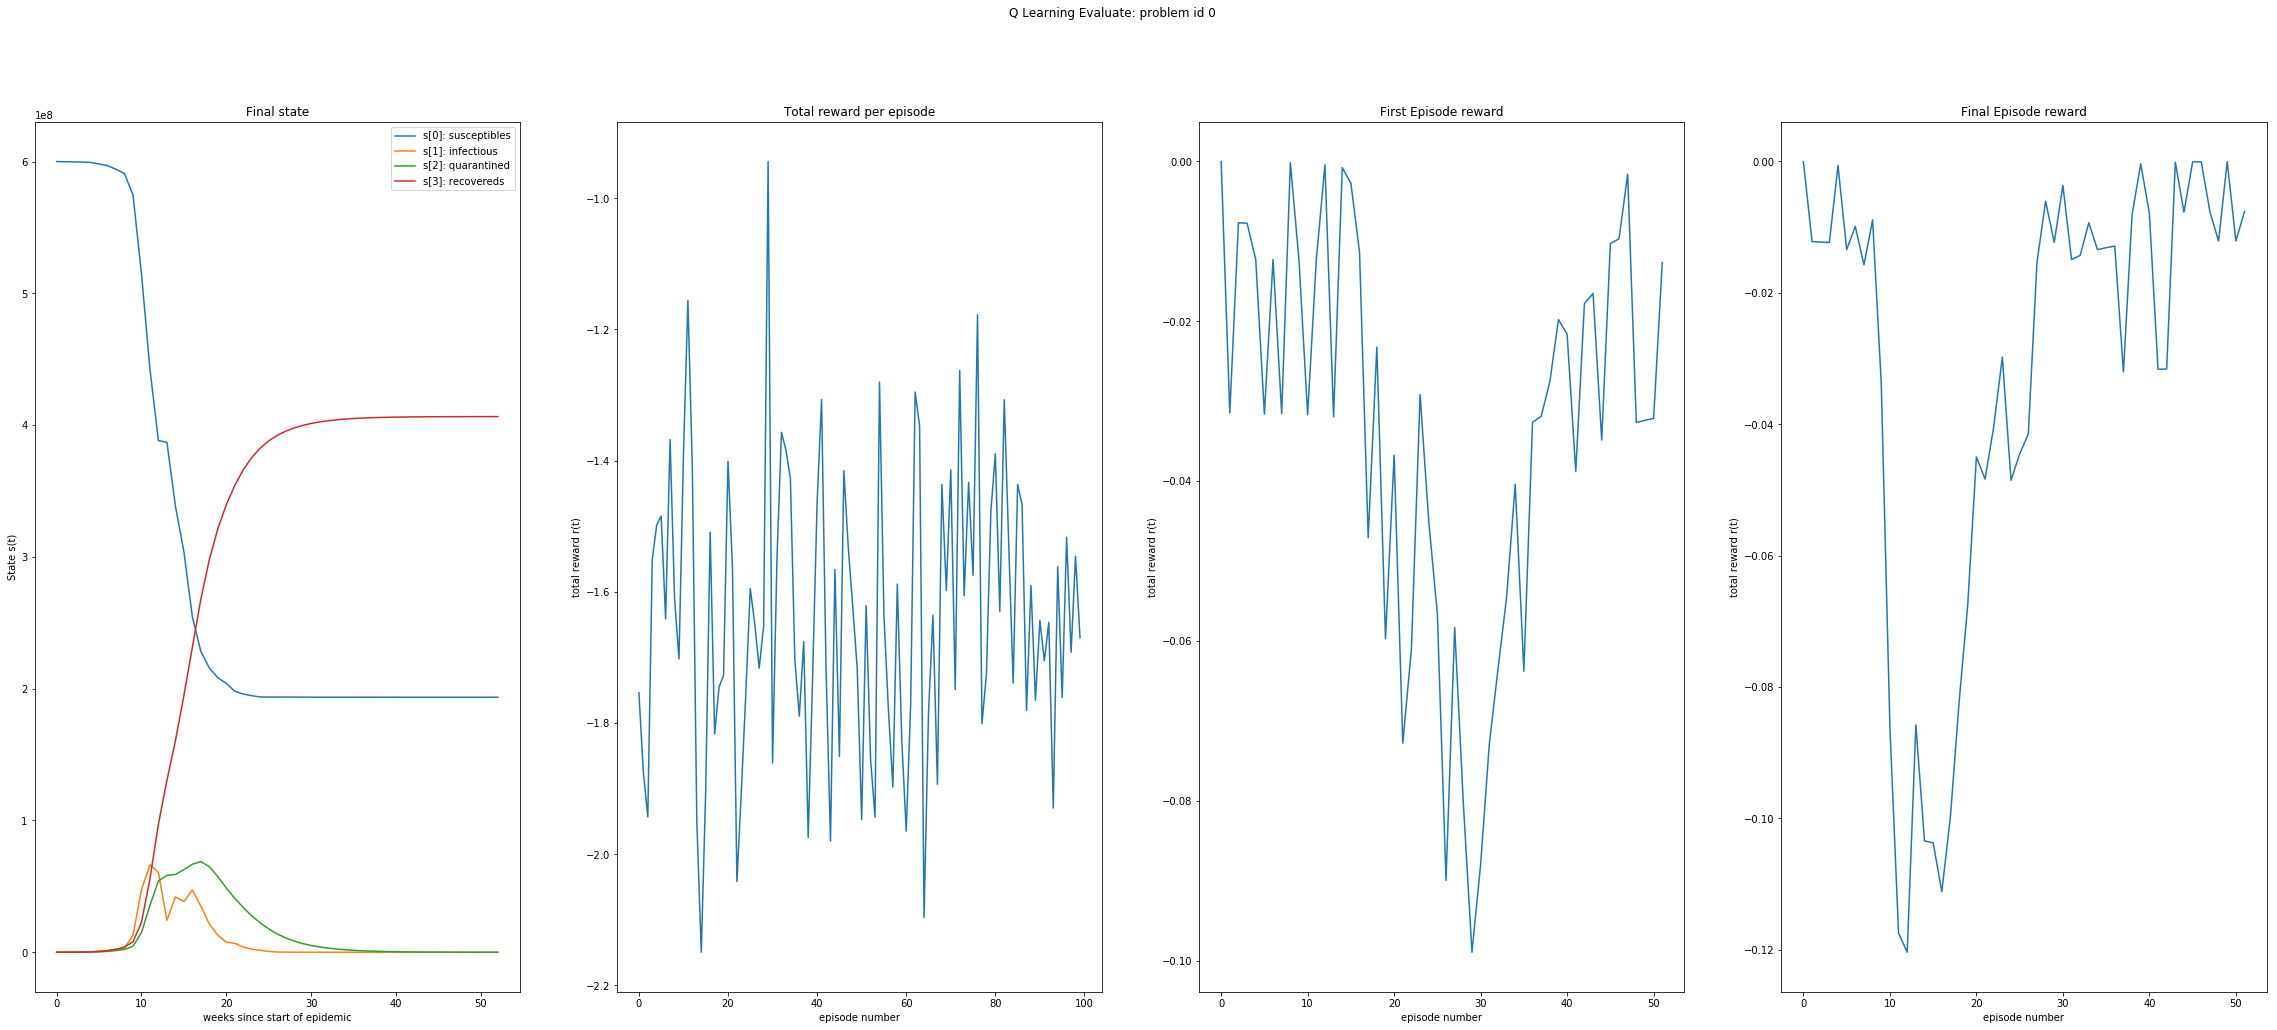

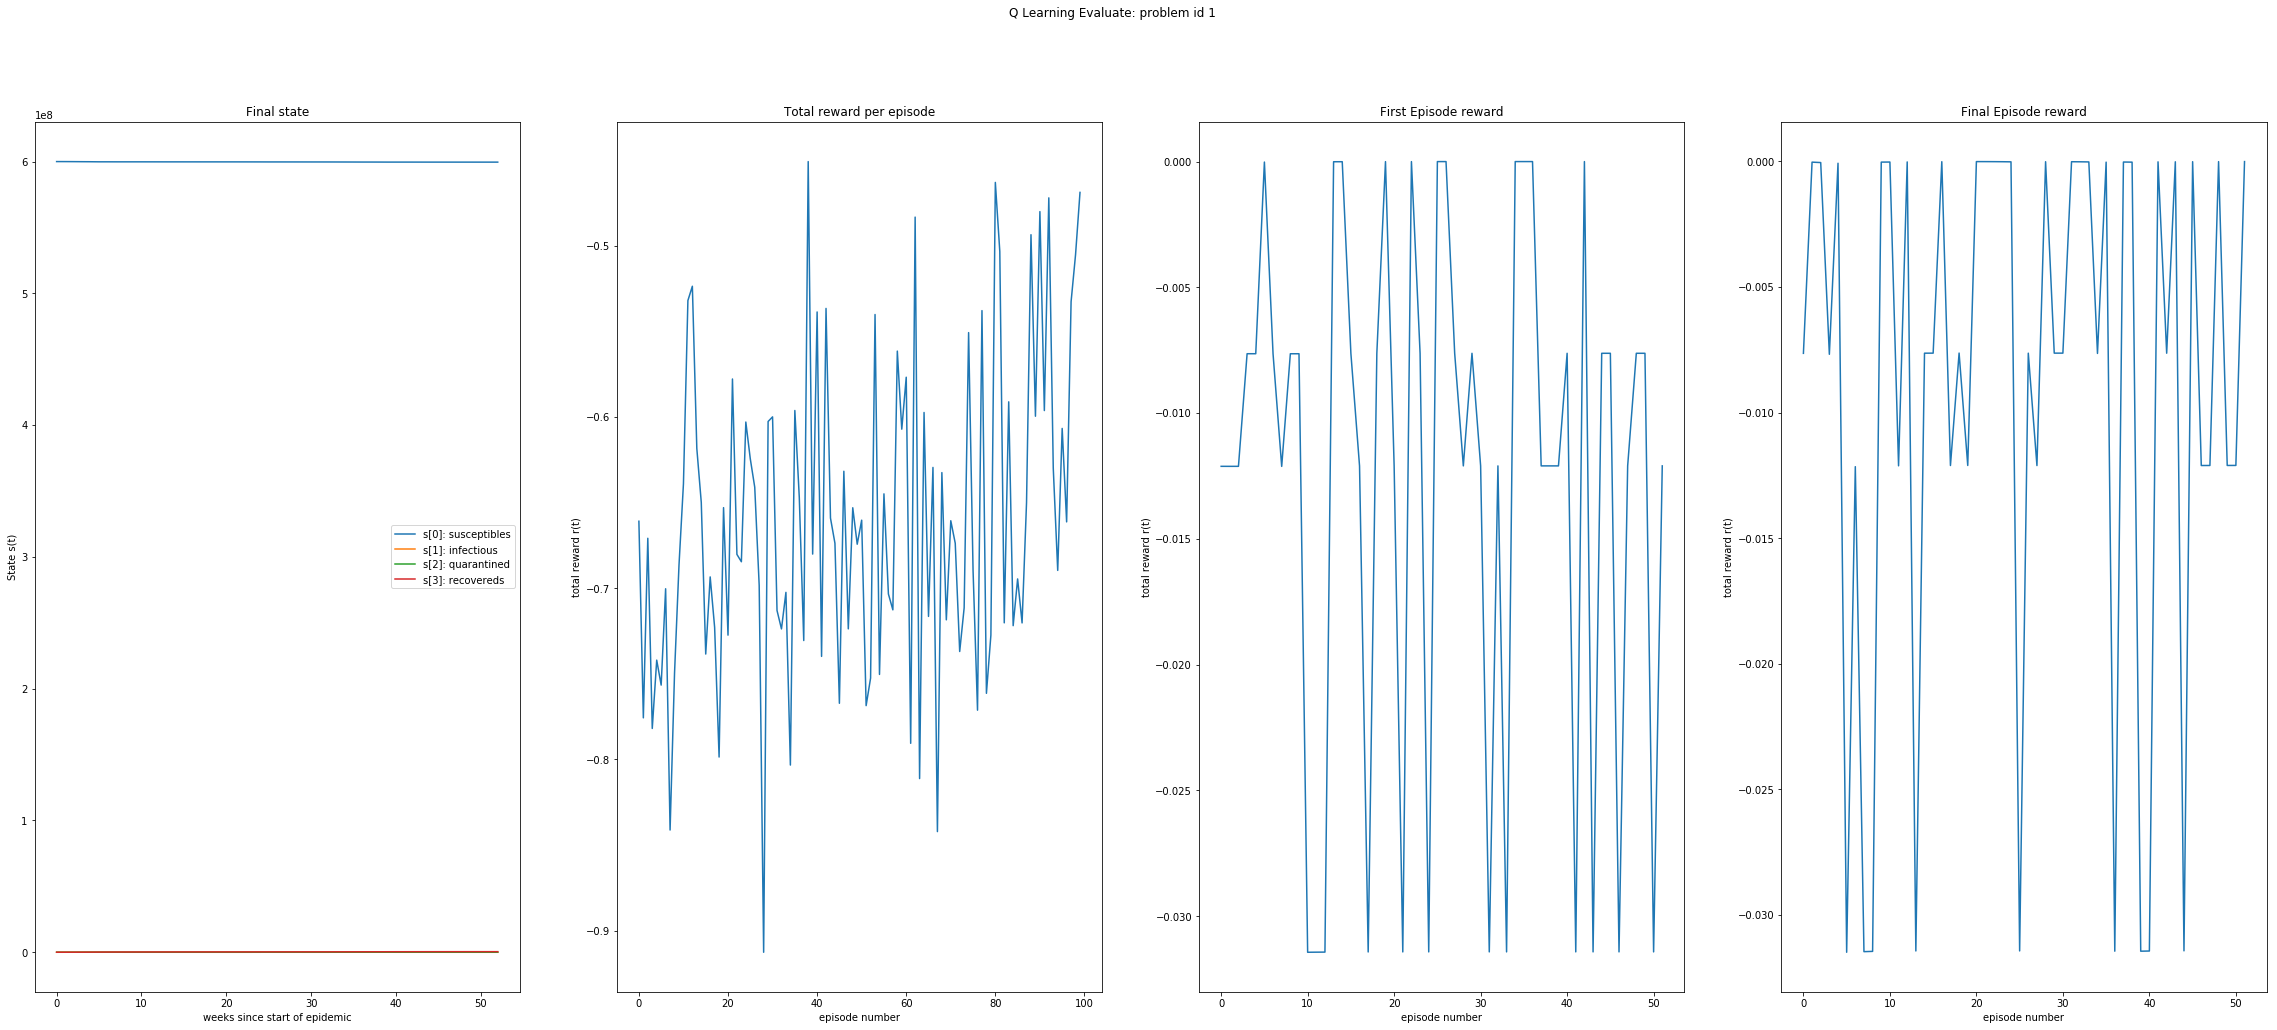

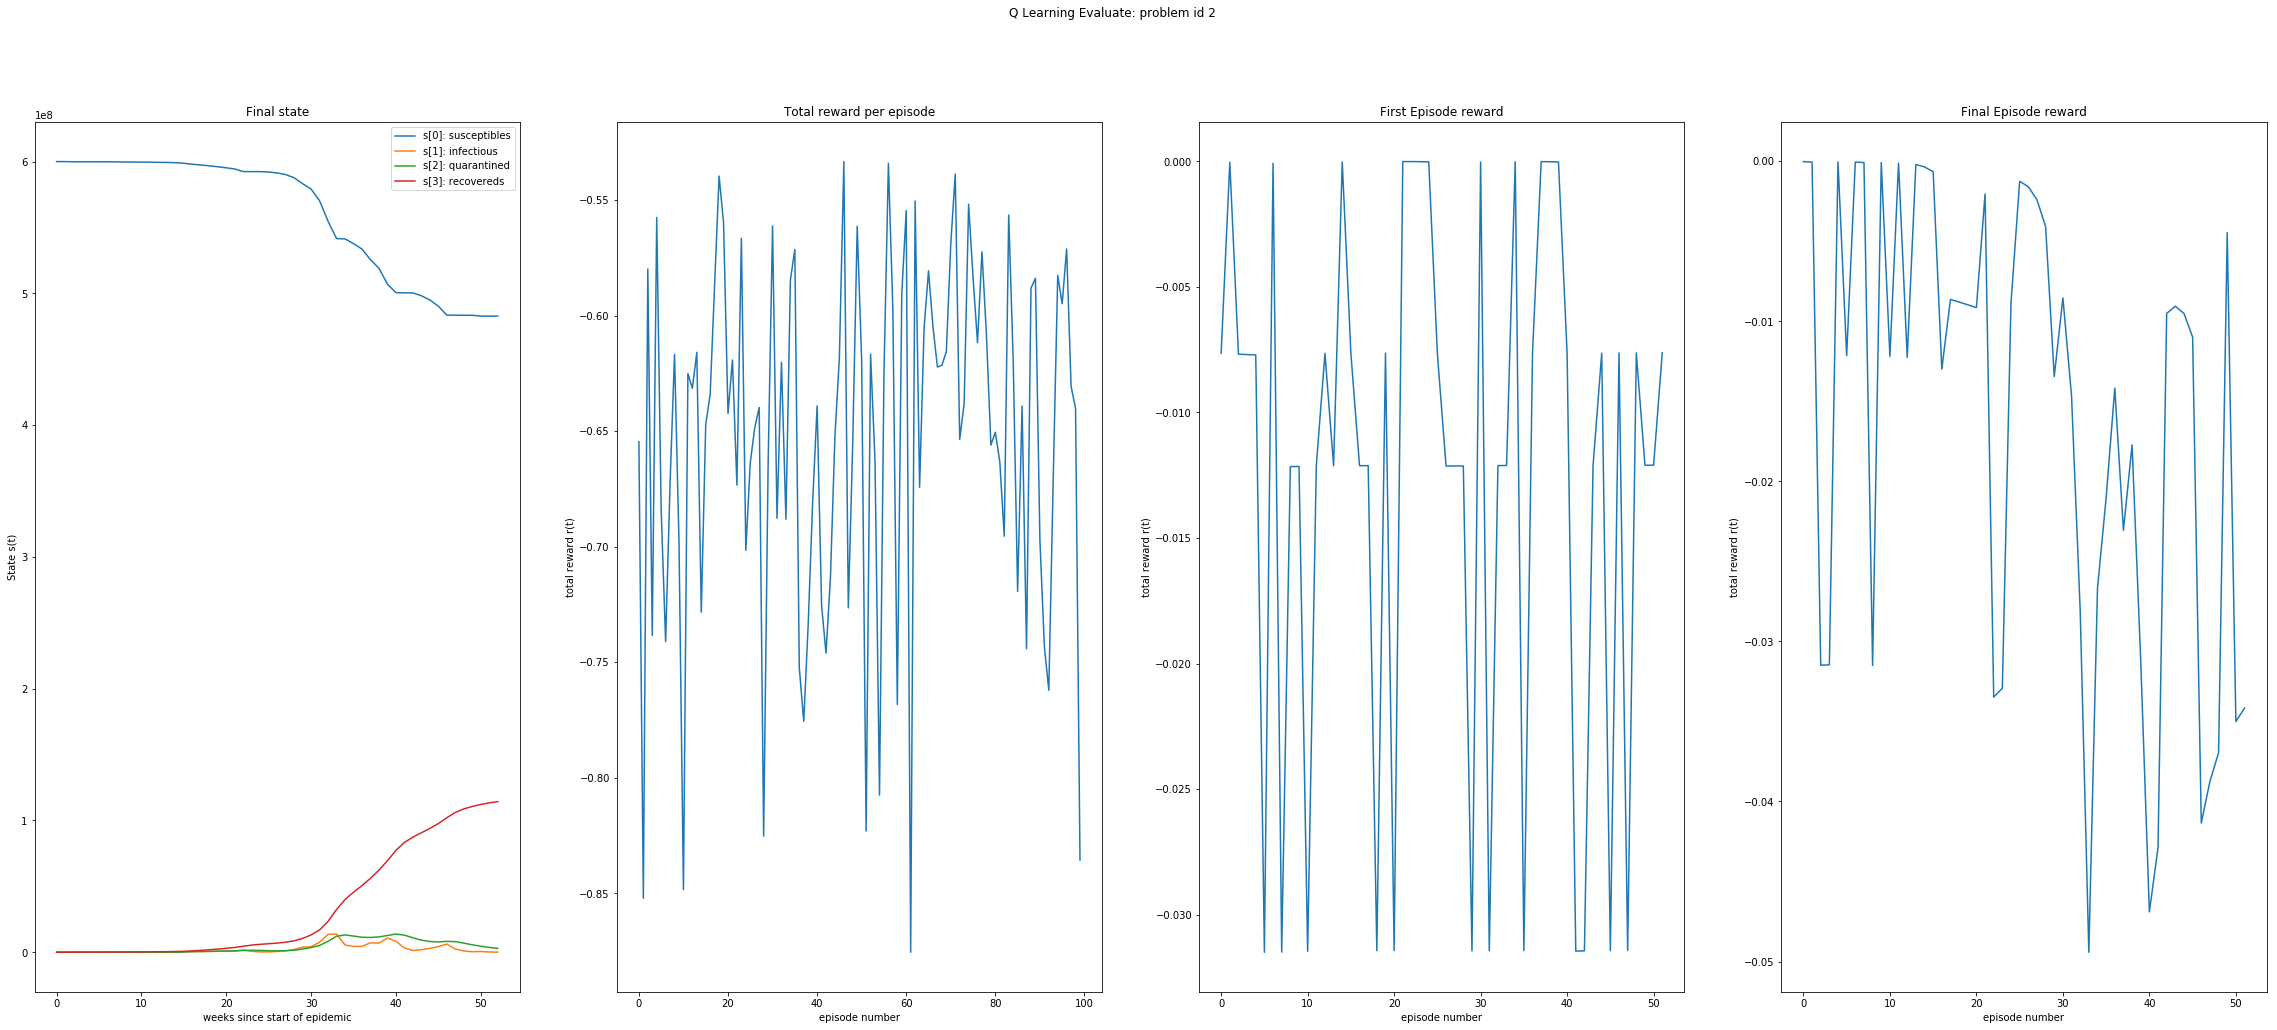

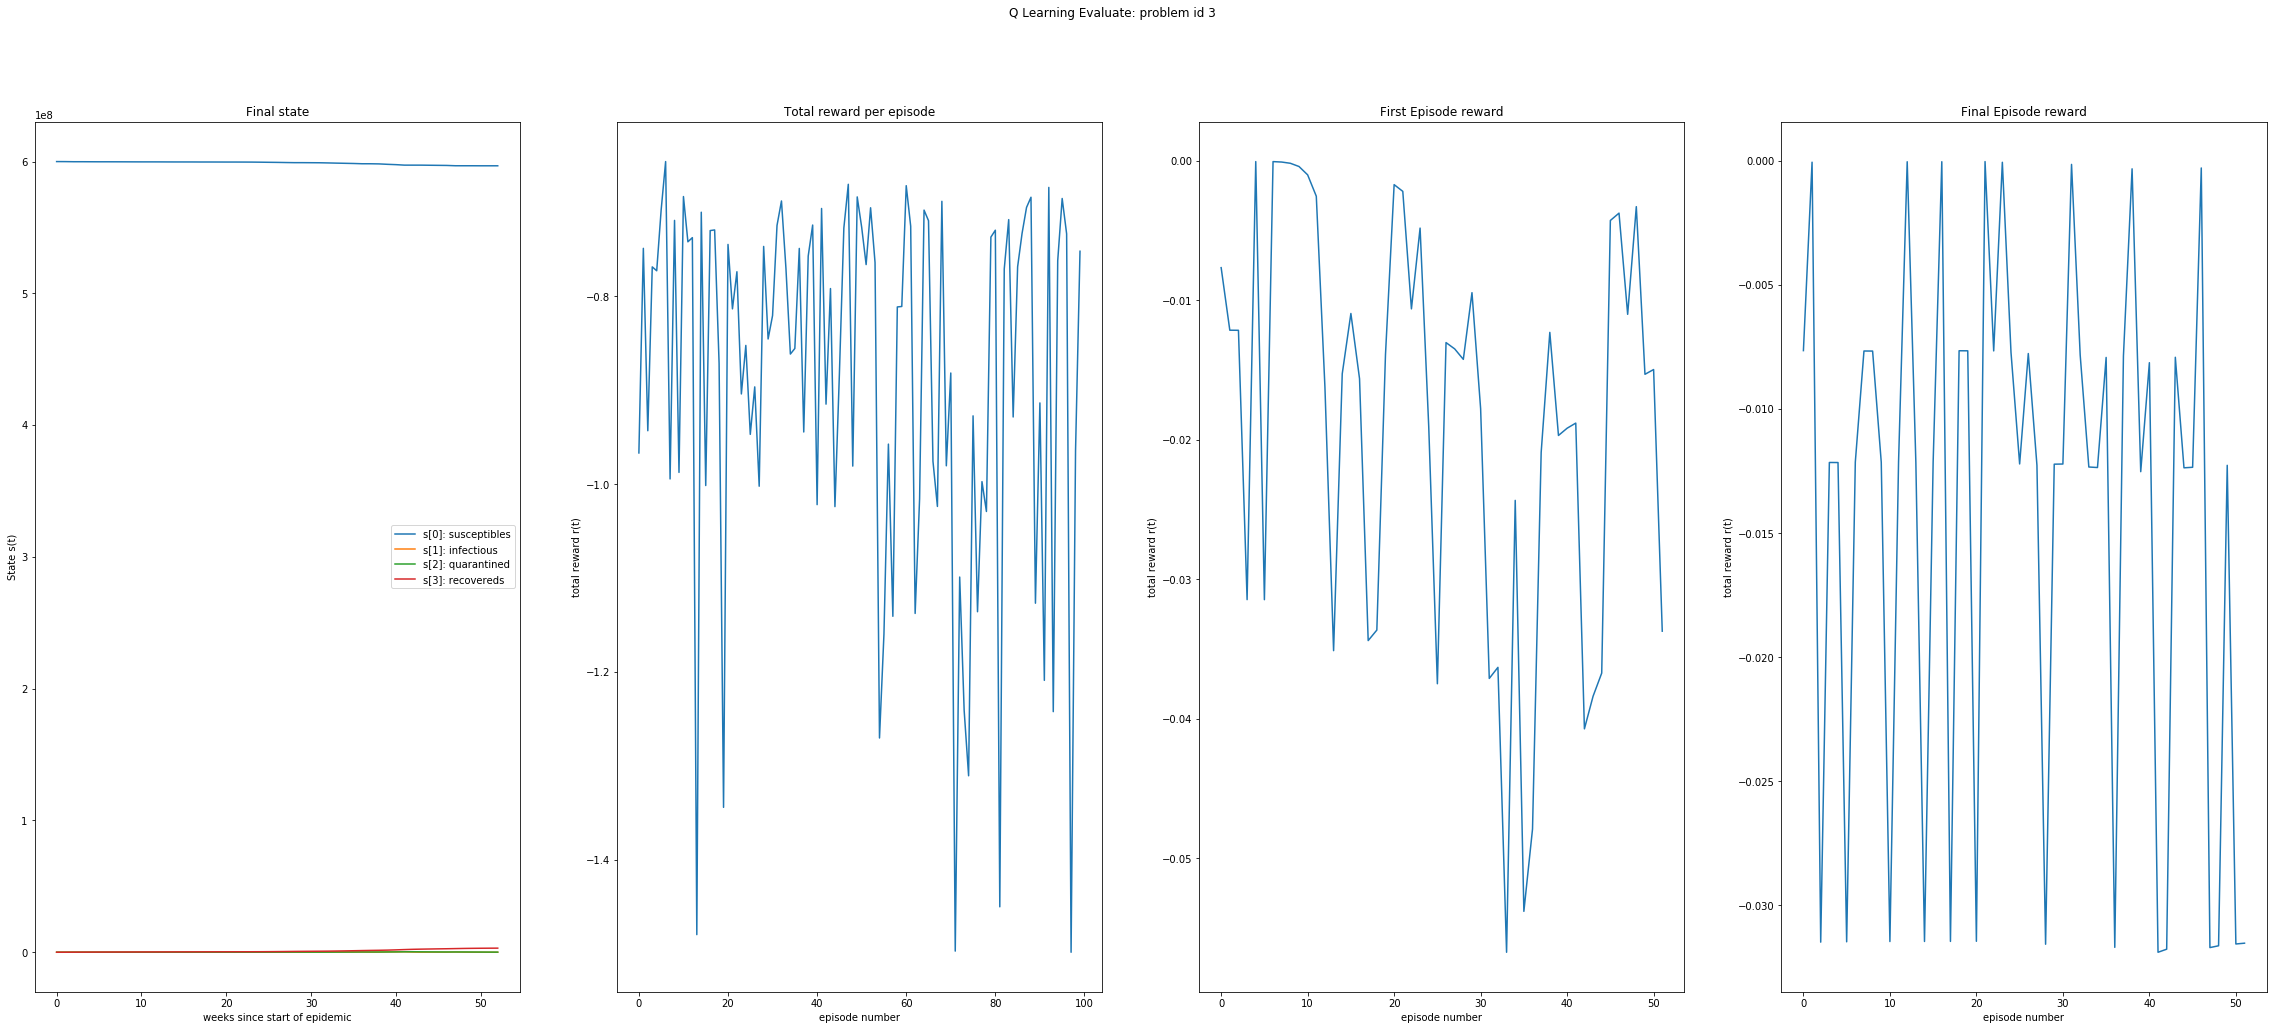

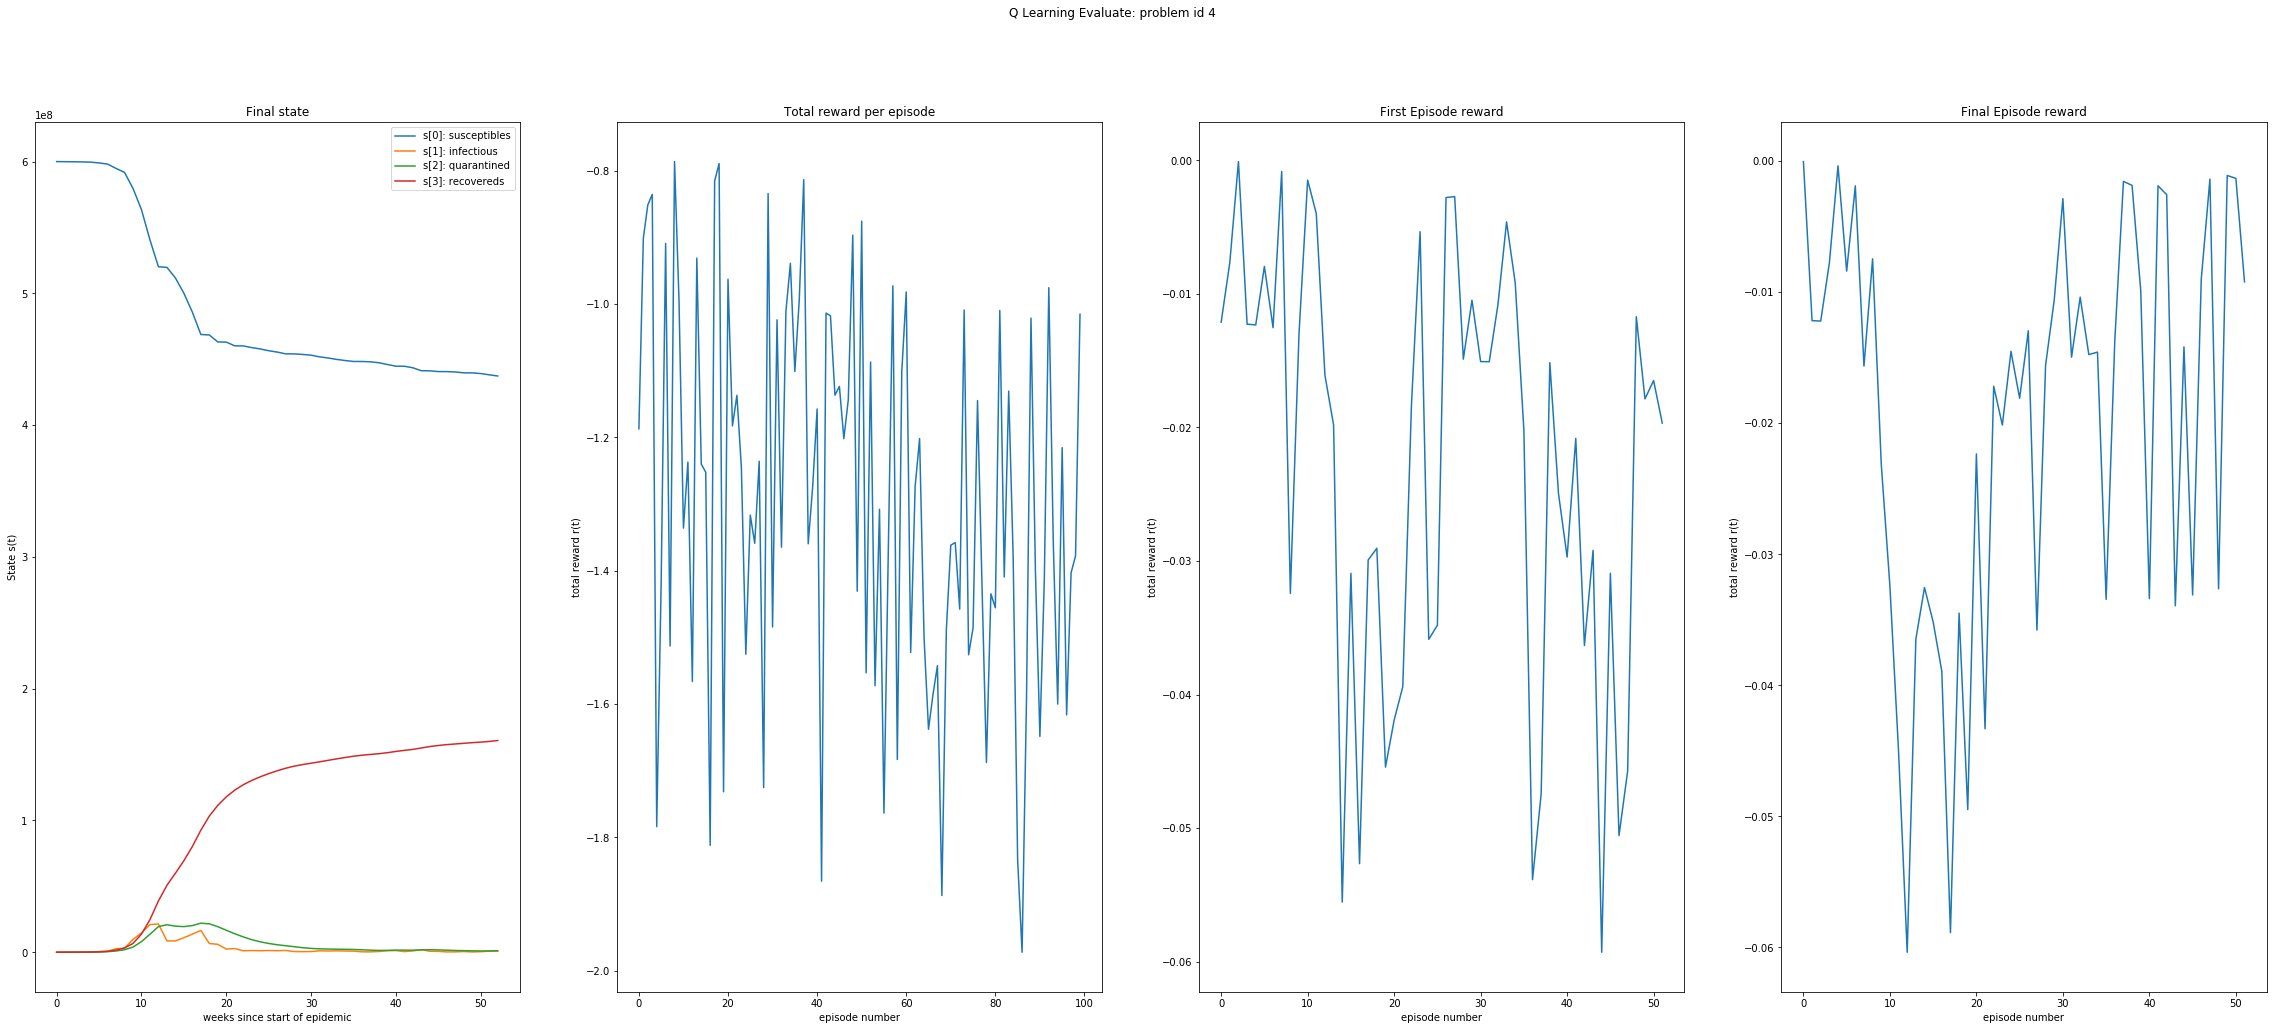

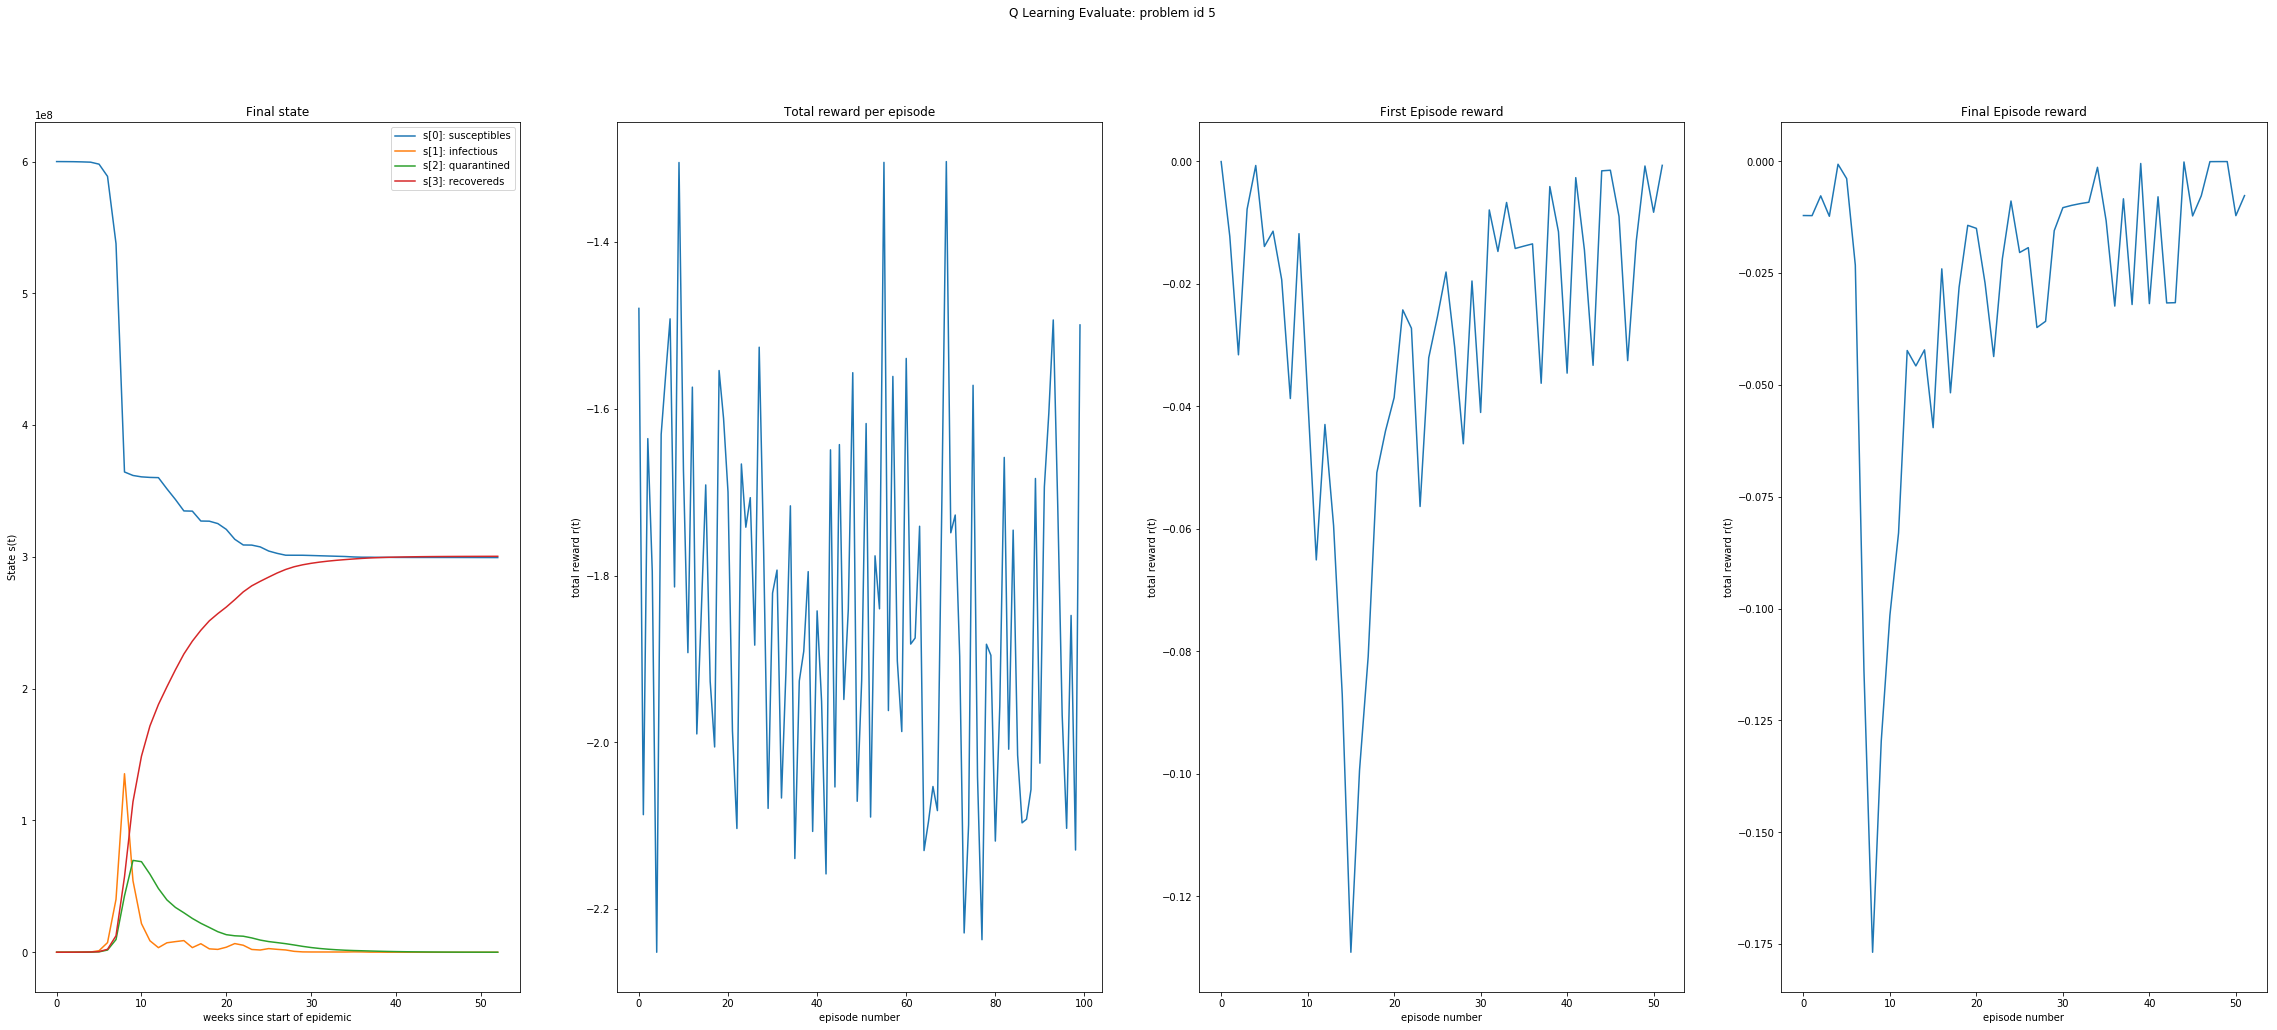

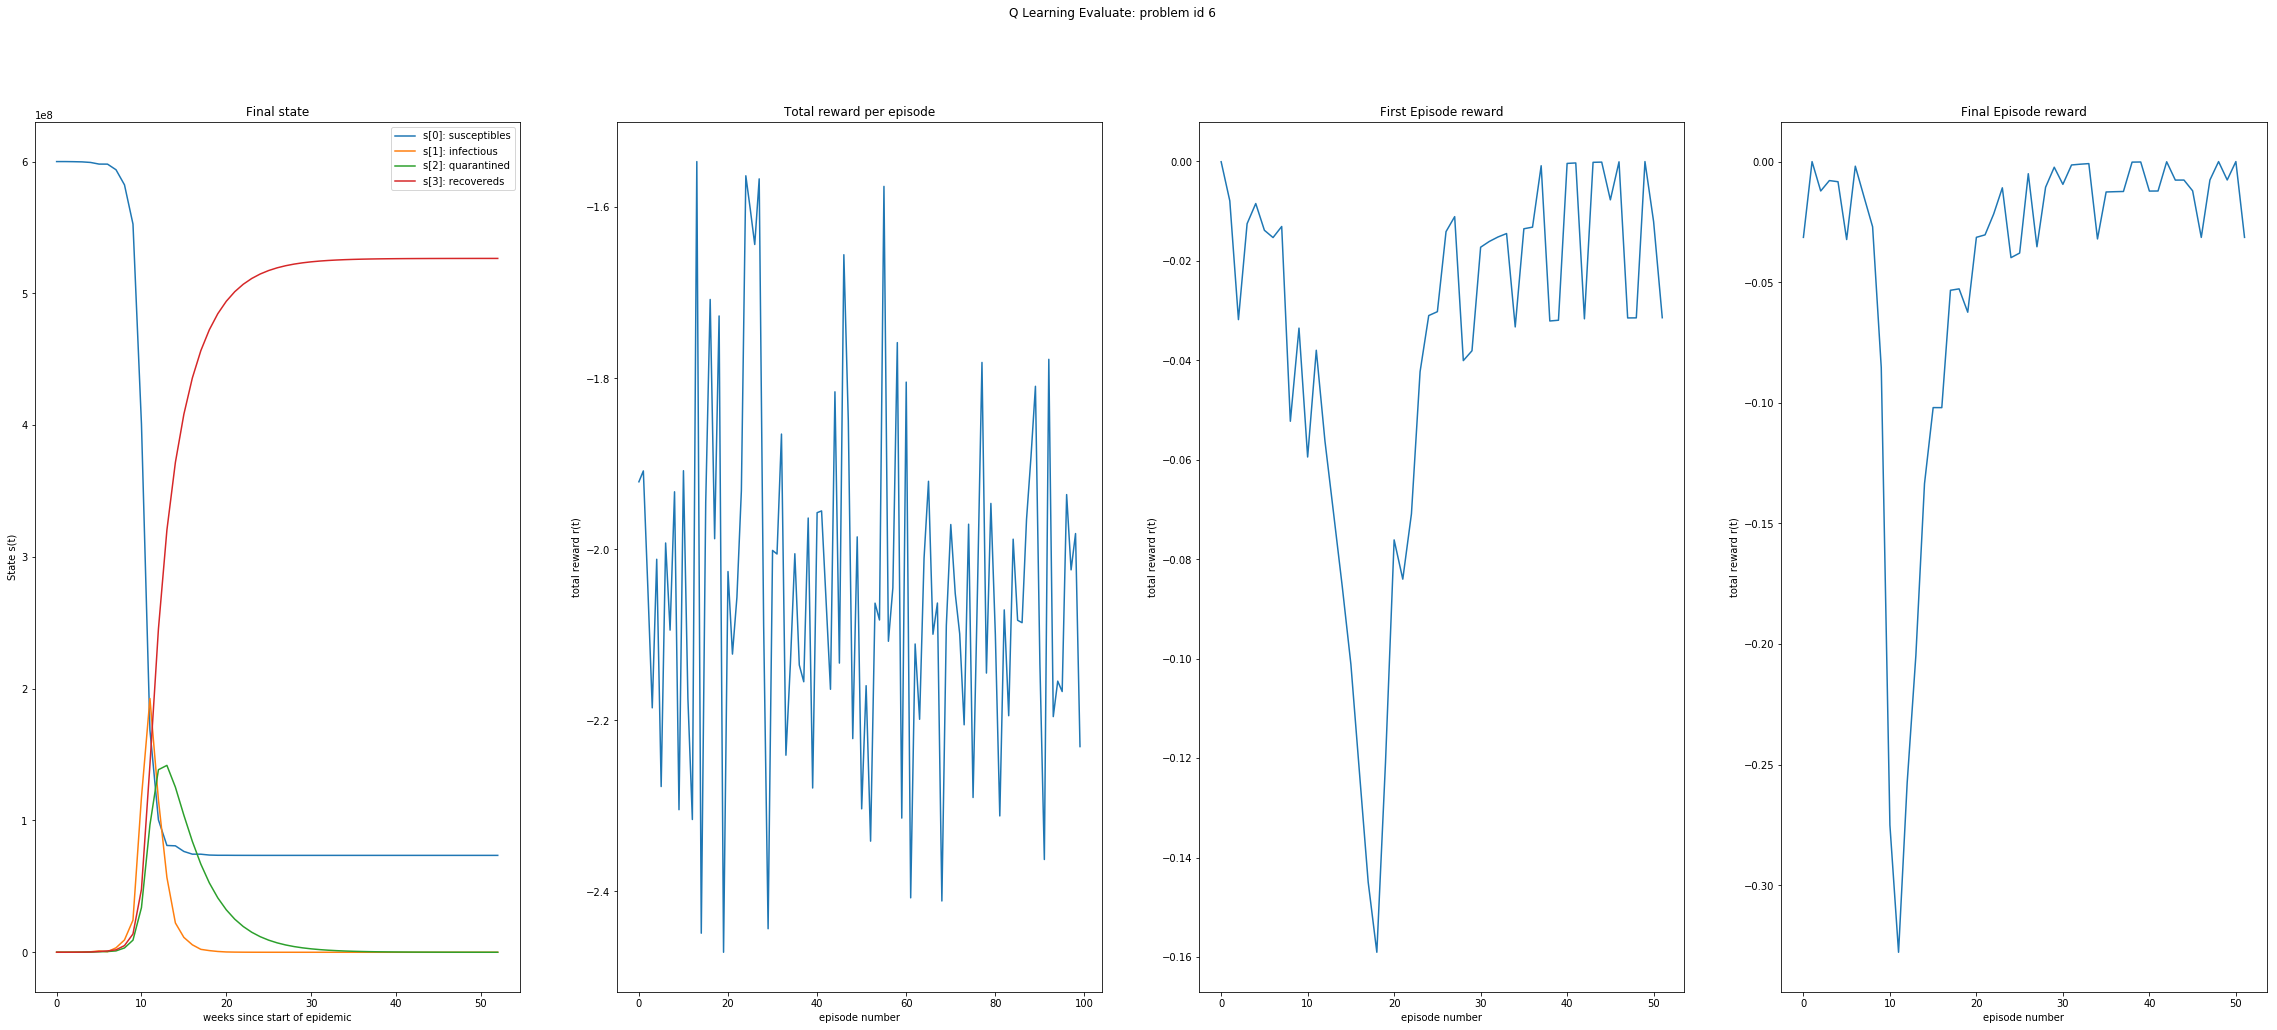

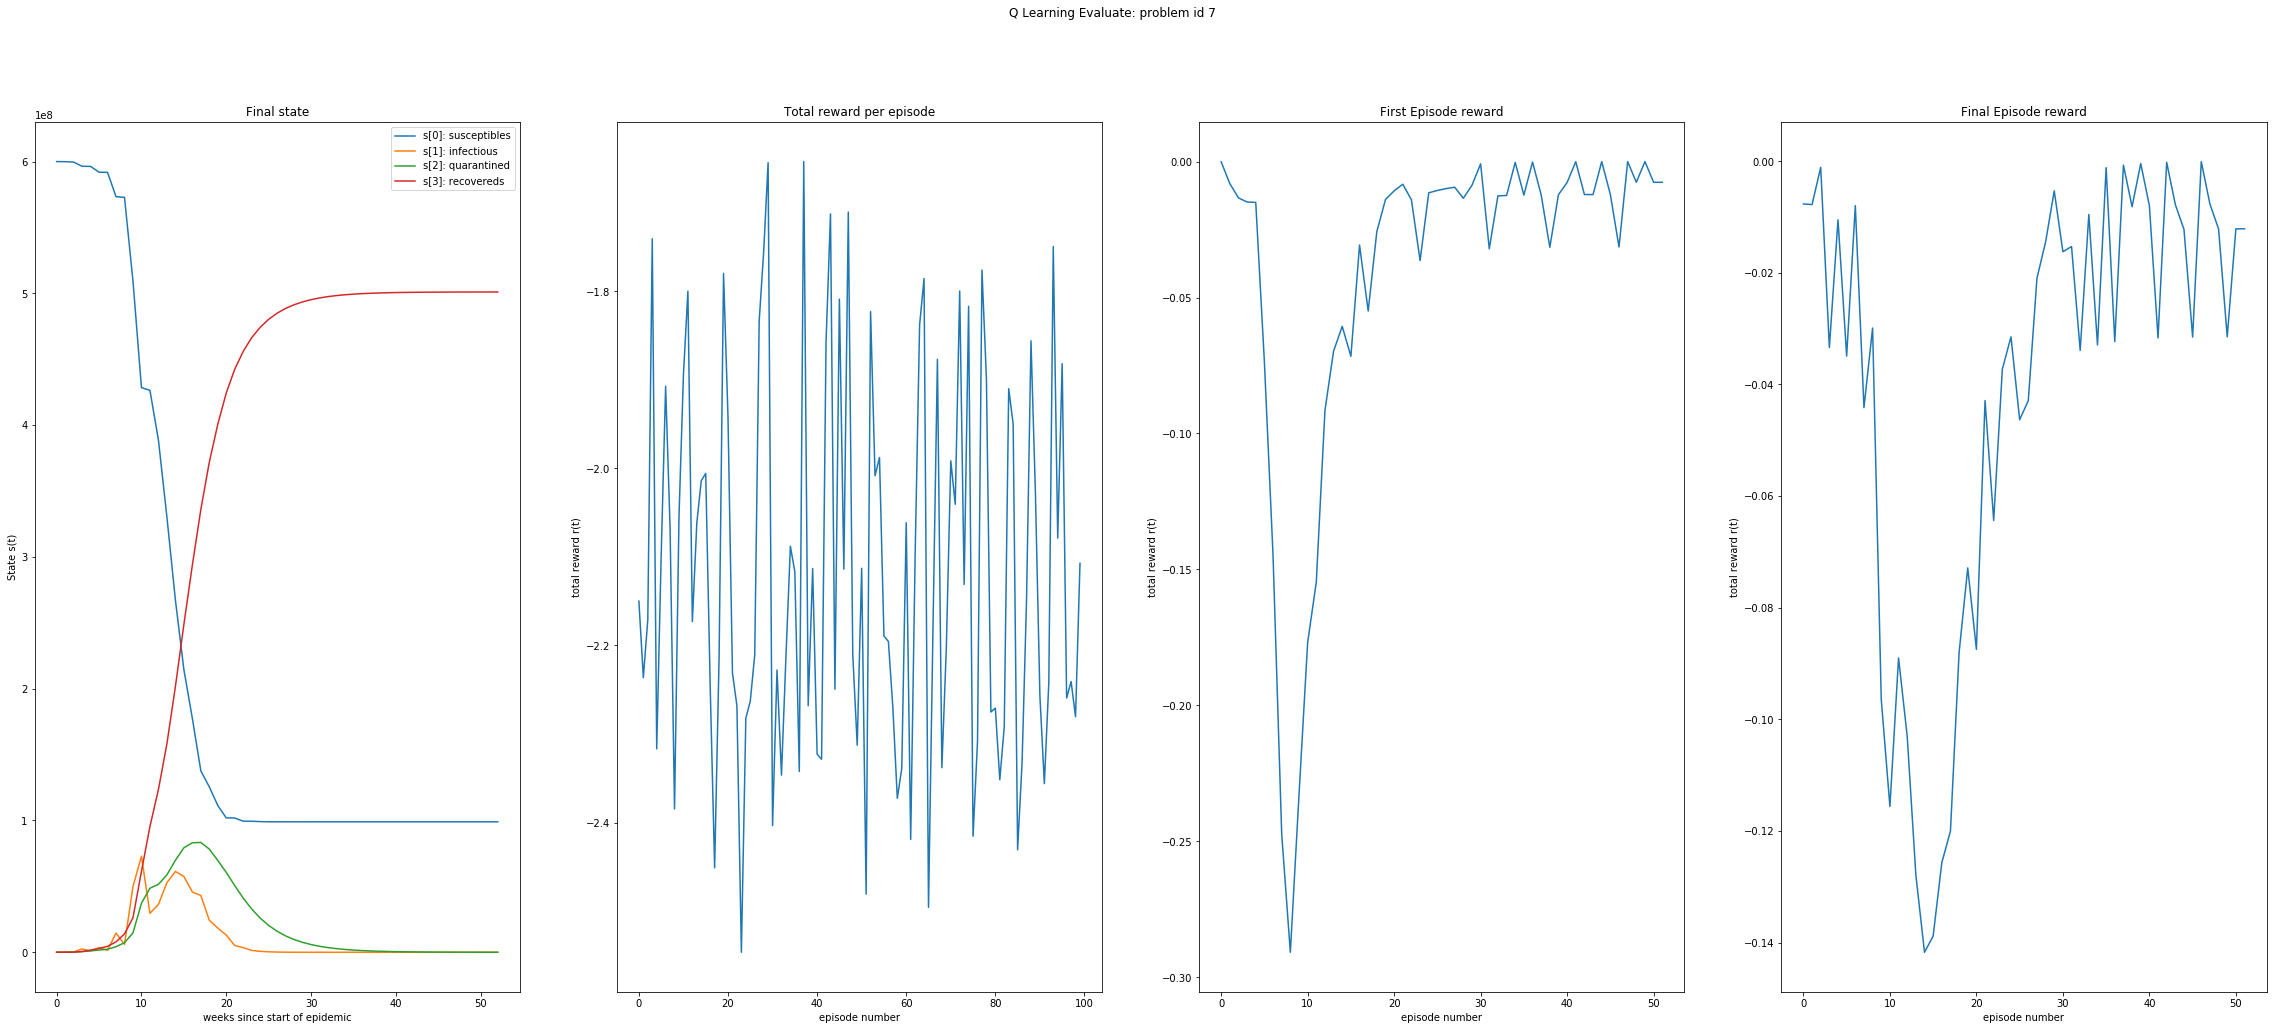

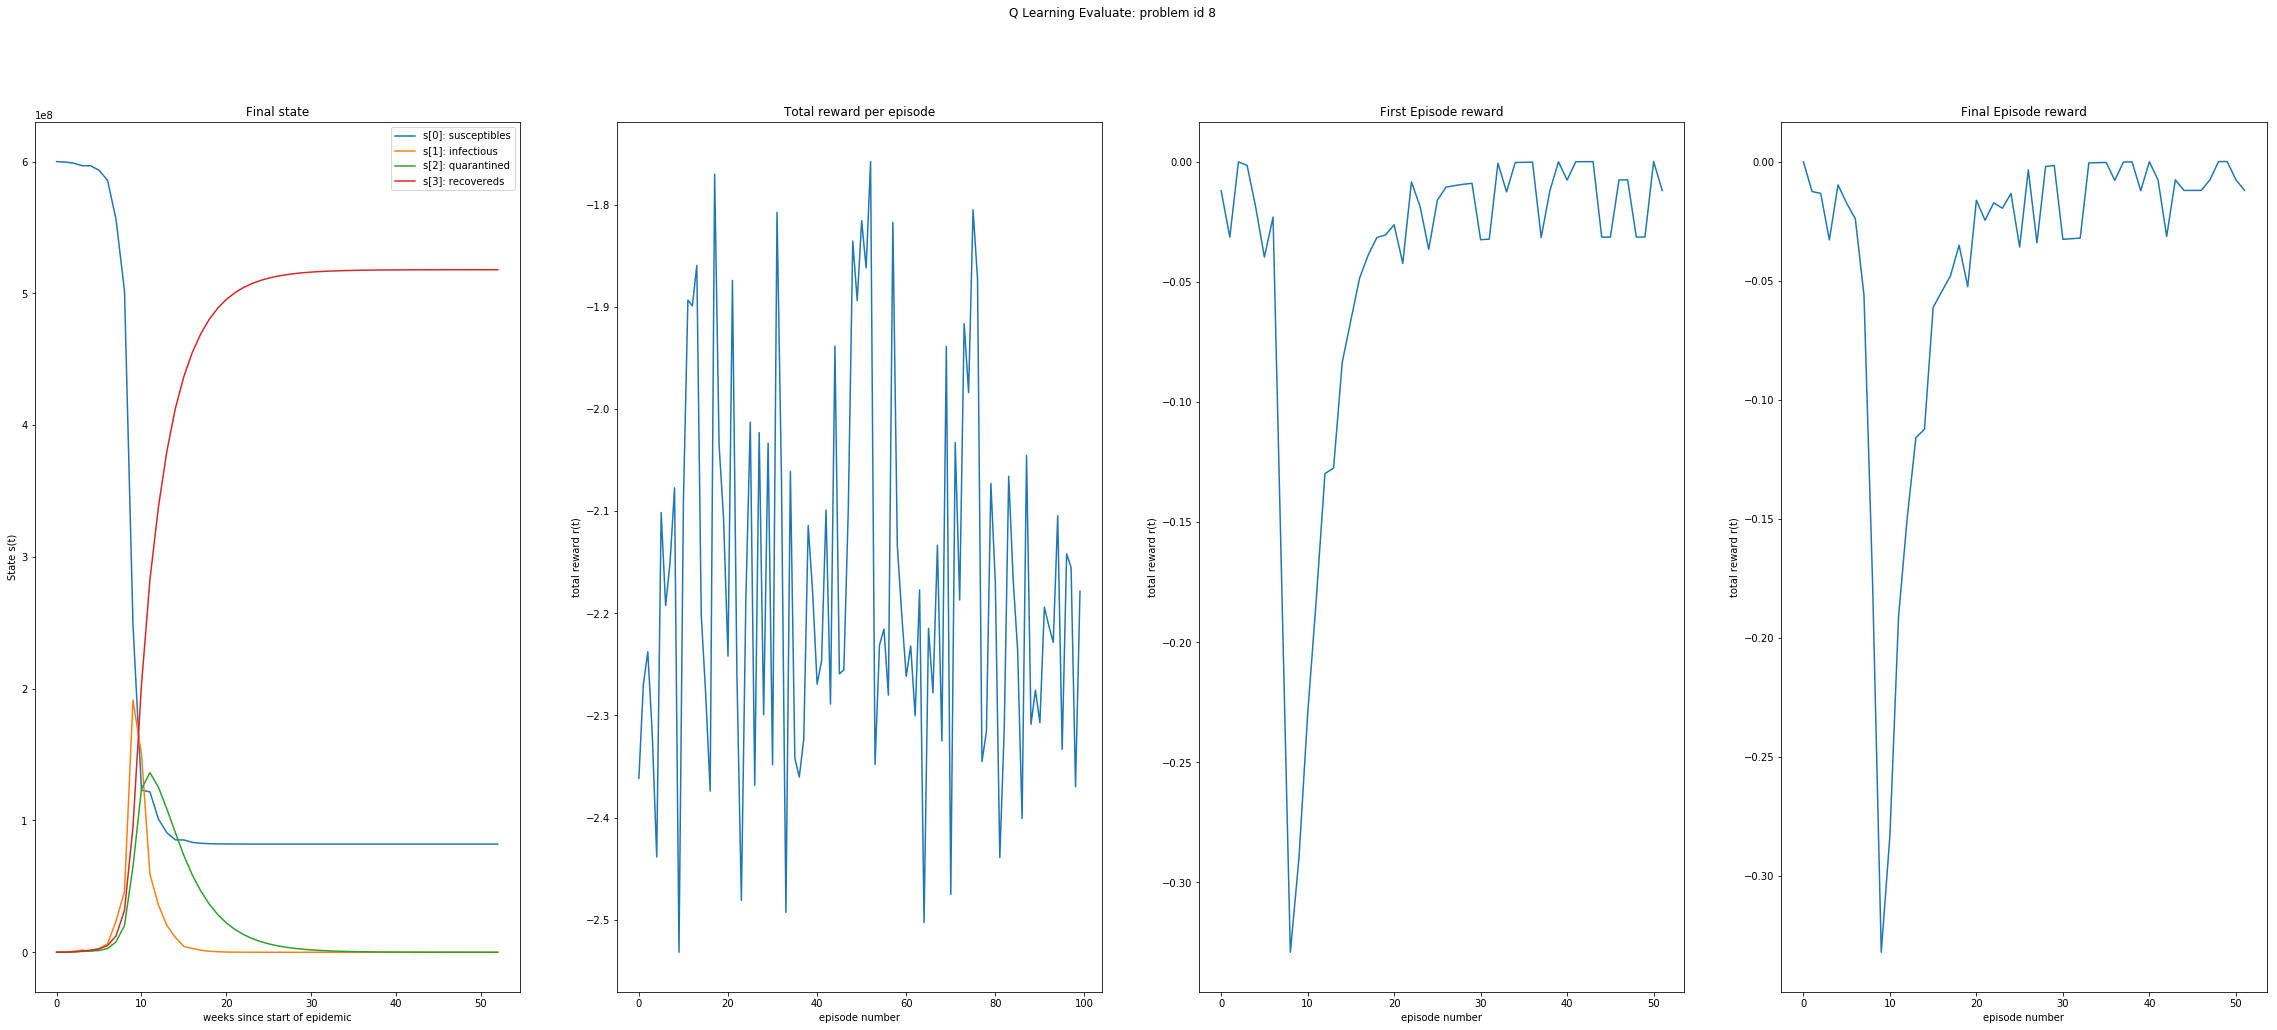

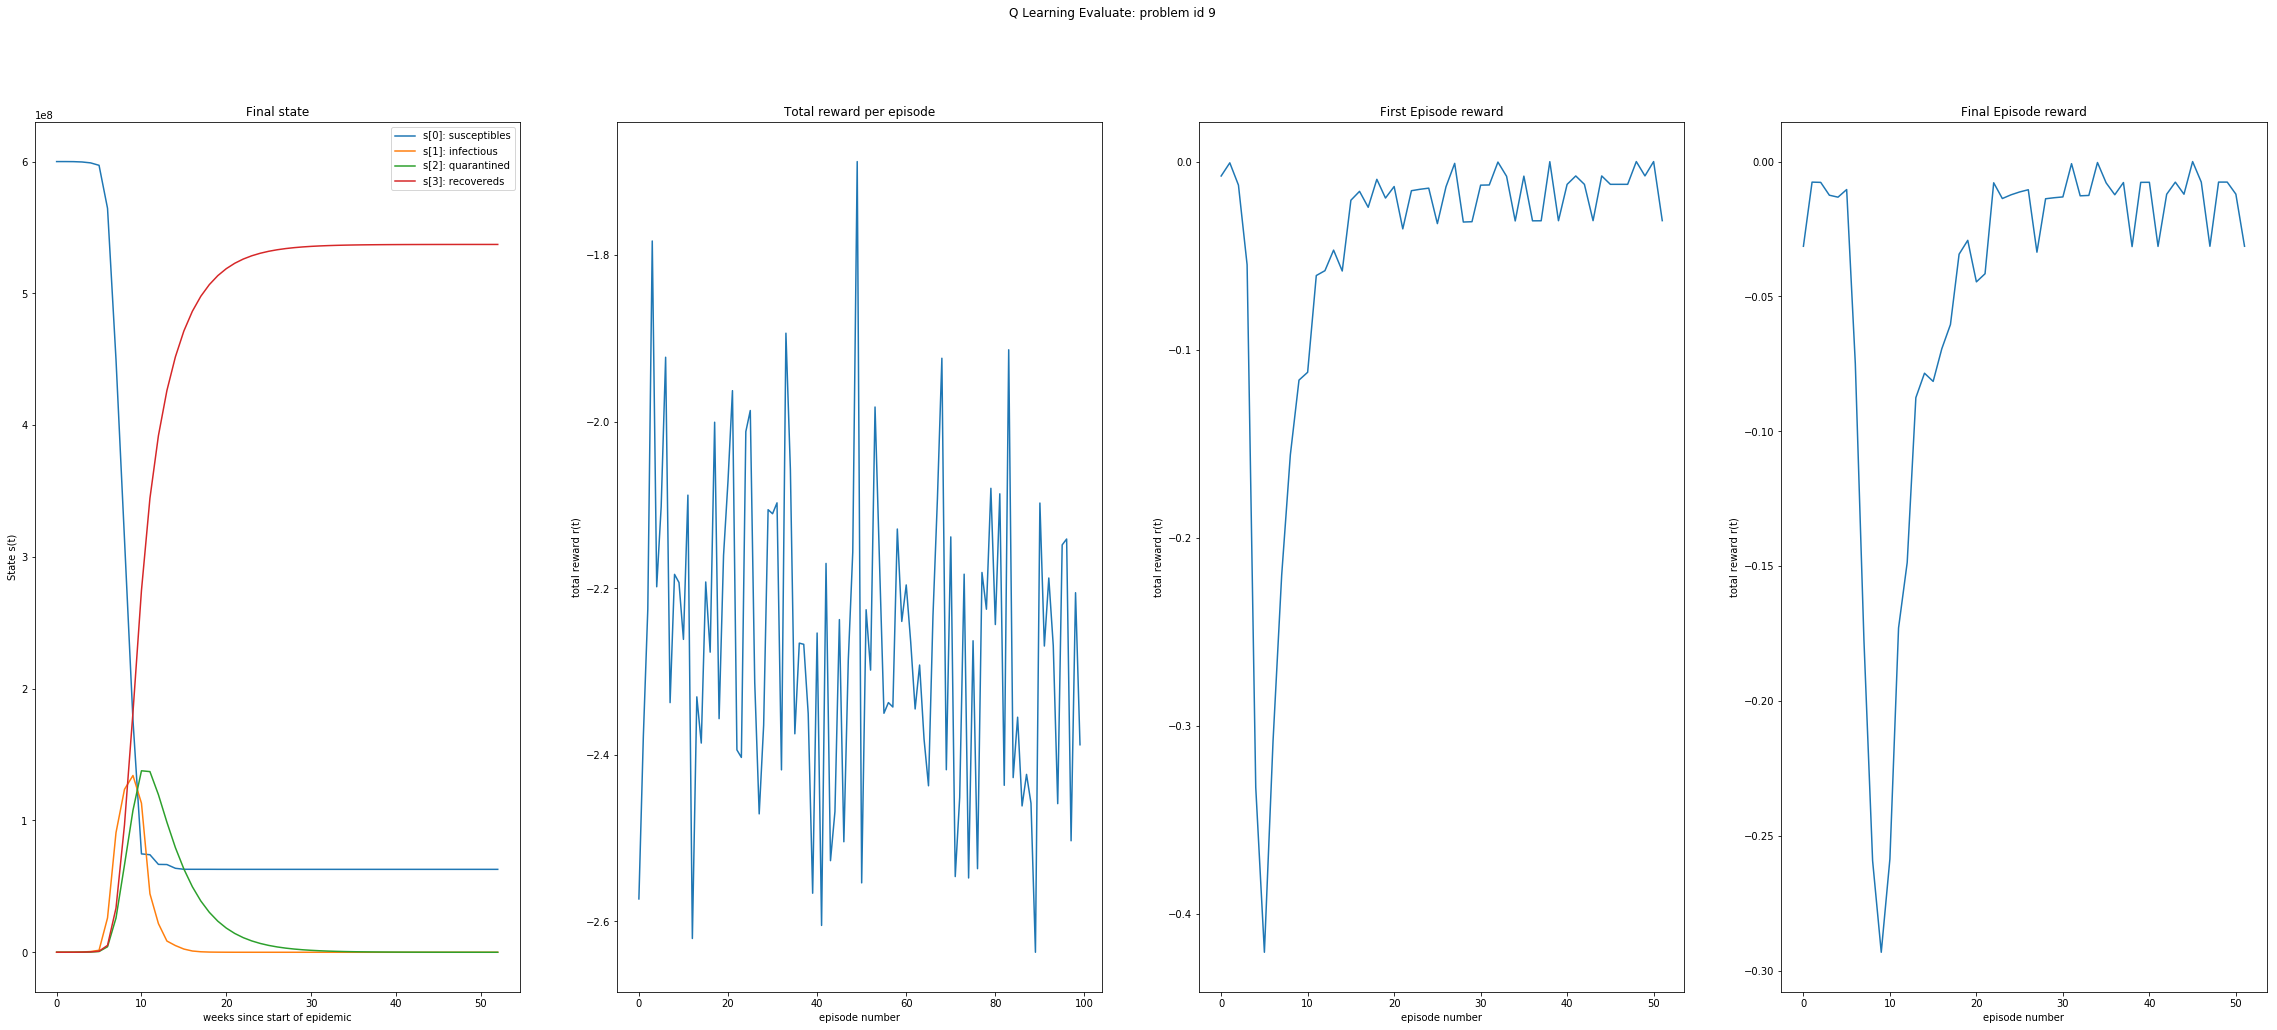

In [5]:
#evaluate the problem id

%cd
%cd ai-coursework-group6\notebooks\QLearning_output
%pwd

for i in range(0,10):
    %pwd
    title = "Q Learning Evaluate: problem id " + str(i) + " "
    
    with open('qlearningP' + str(i) + '.pkl', 'rb') as inpt:
        agent = pickle.load(inpt)
        states,all_rewards, all_total_rewards = agent.evaluate()
        eval_plot(states,agent, all_total_rewards, all_rewards,title)
        
        mean_std(all_total_rewards,all_rewards,title)

stochastic=False, noisy=False
stochastic=True, noisy=False
stochastic=False, noisy=True
stochastic=True, noisy=True


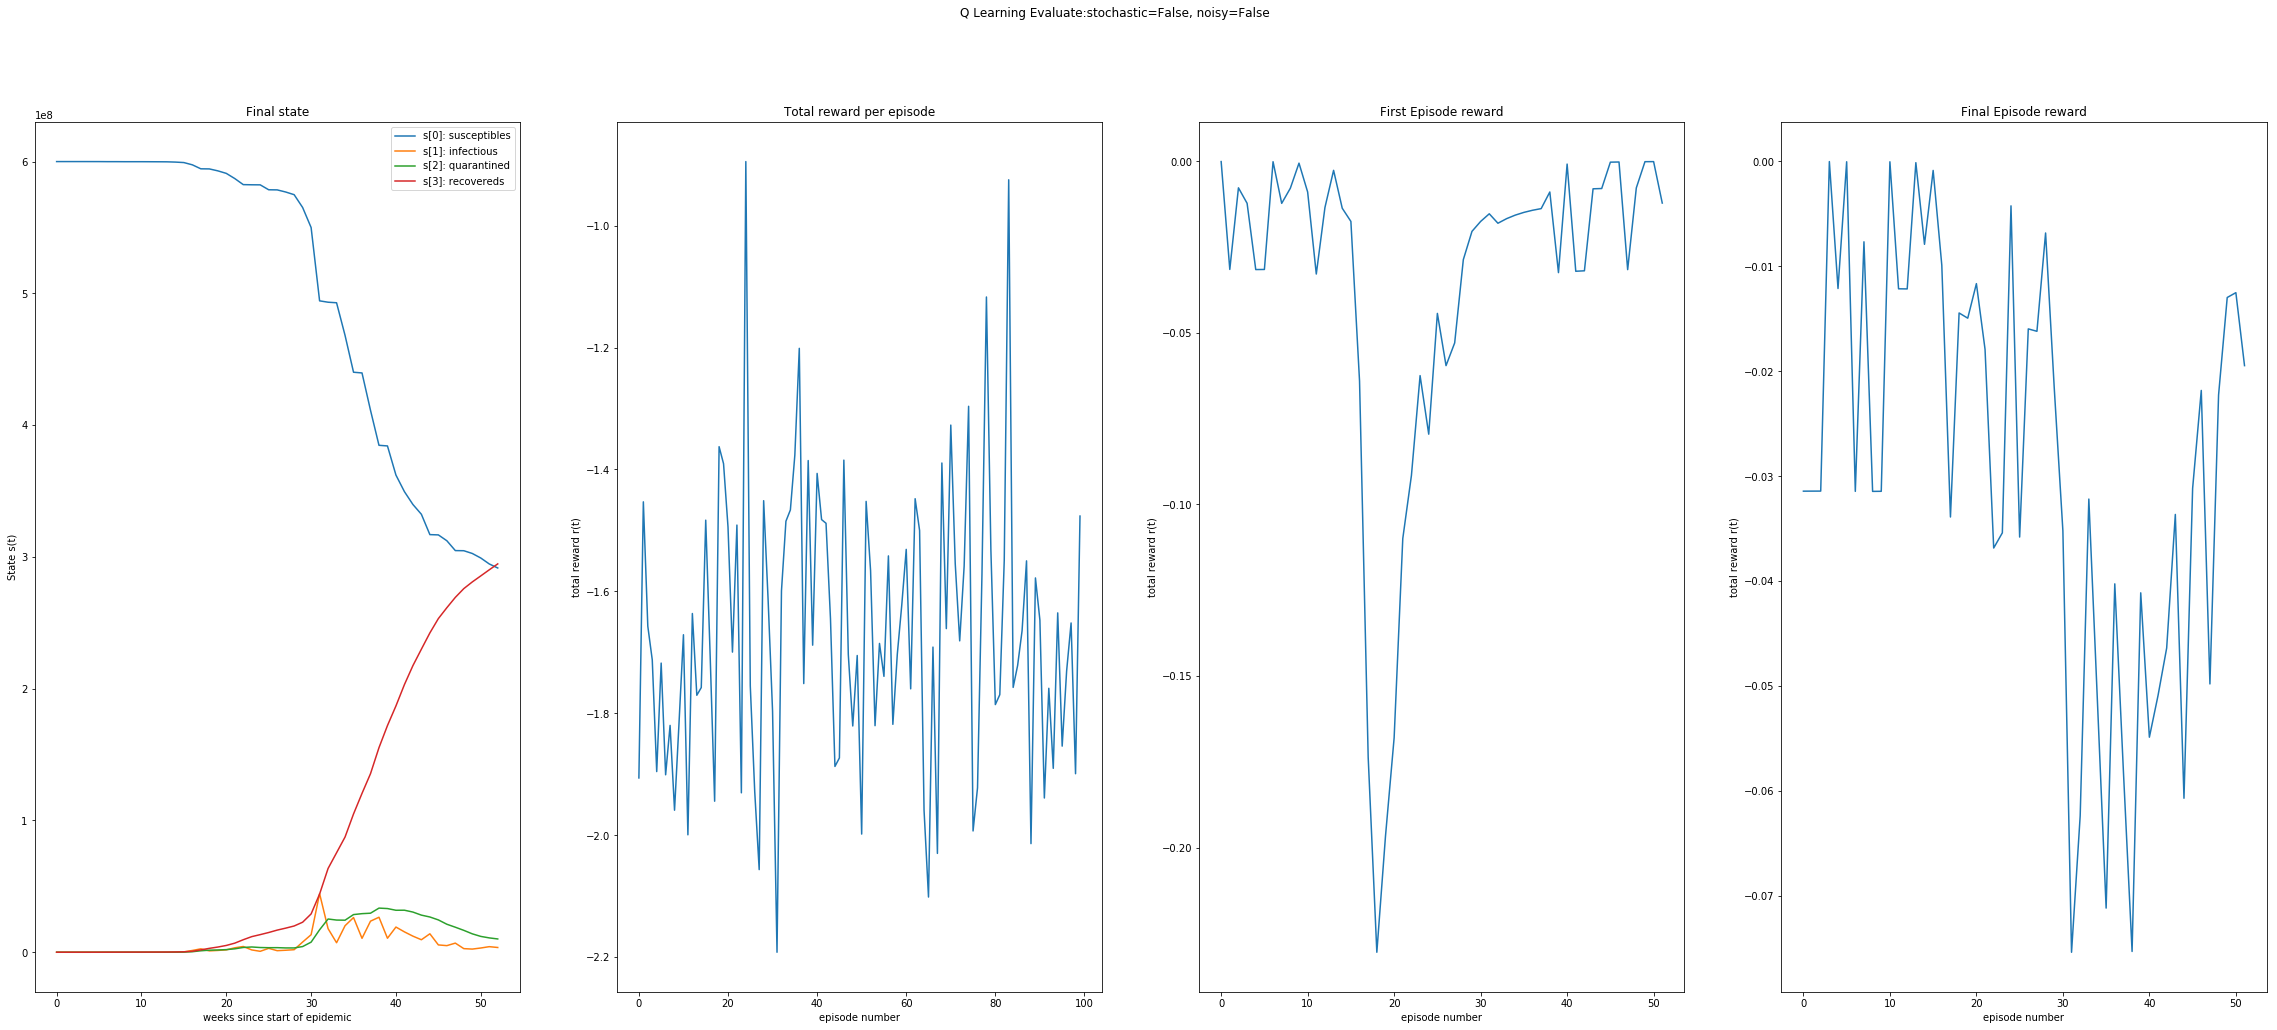

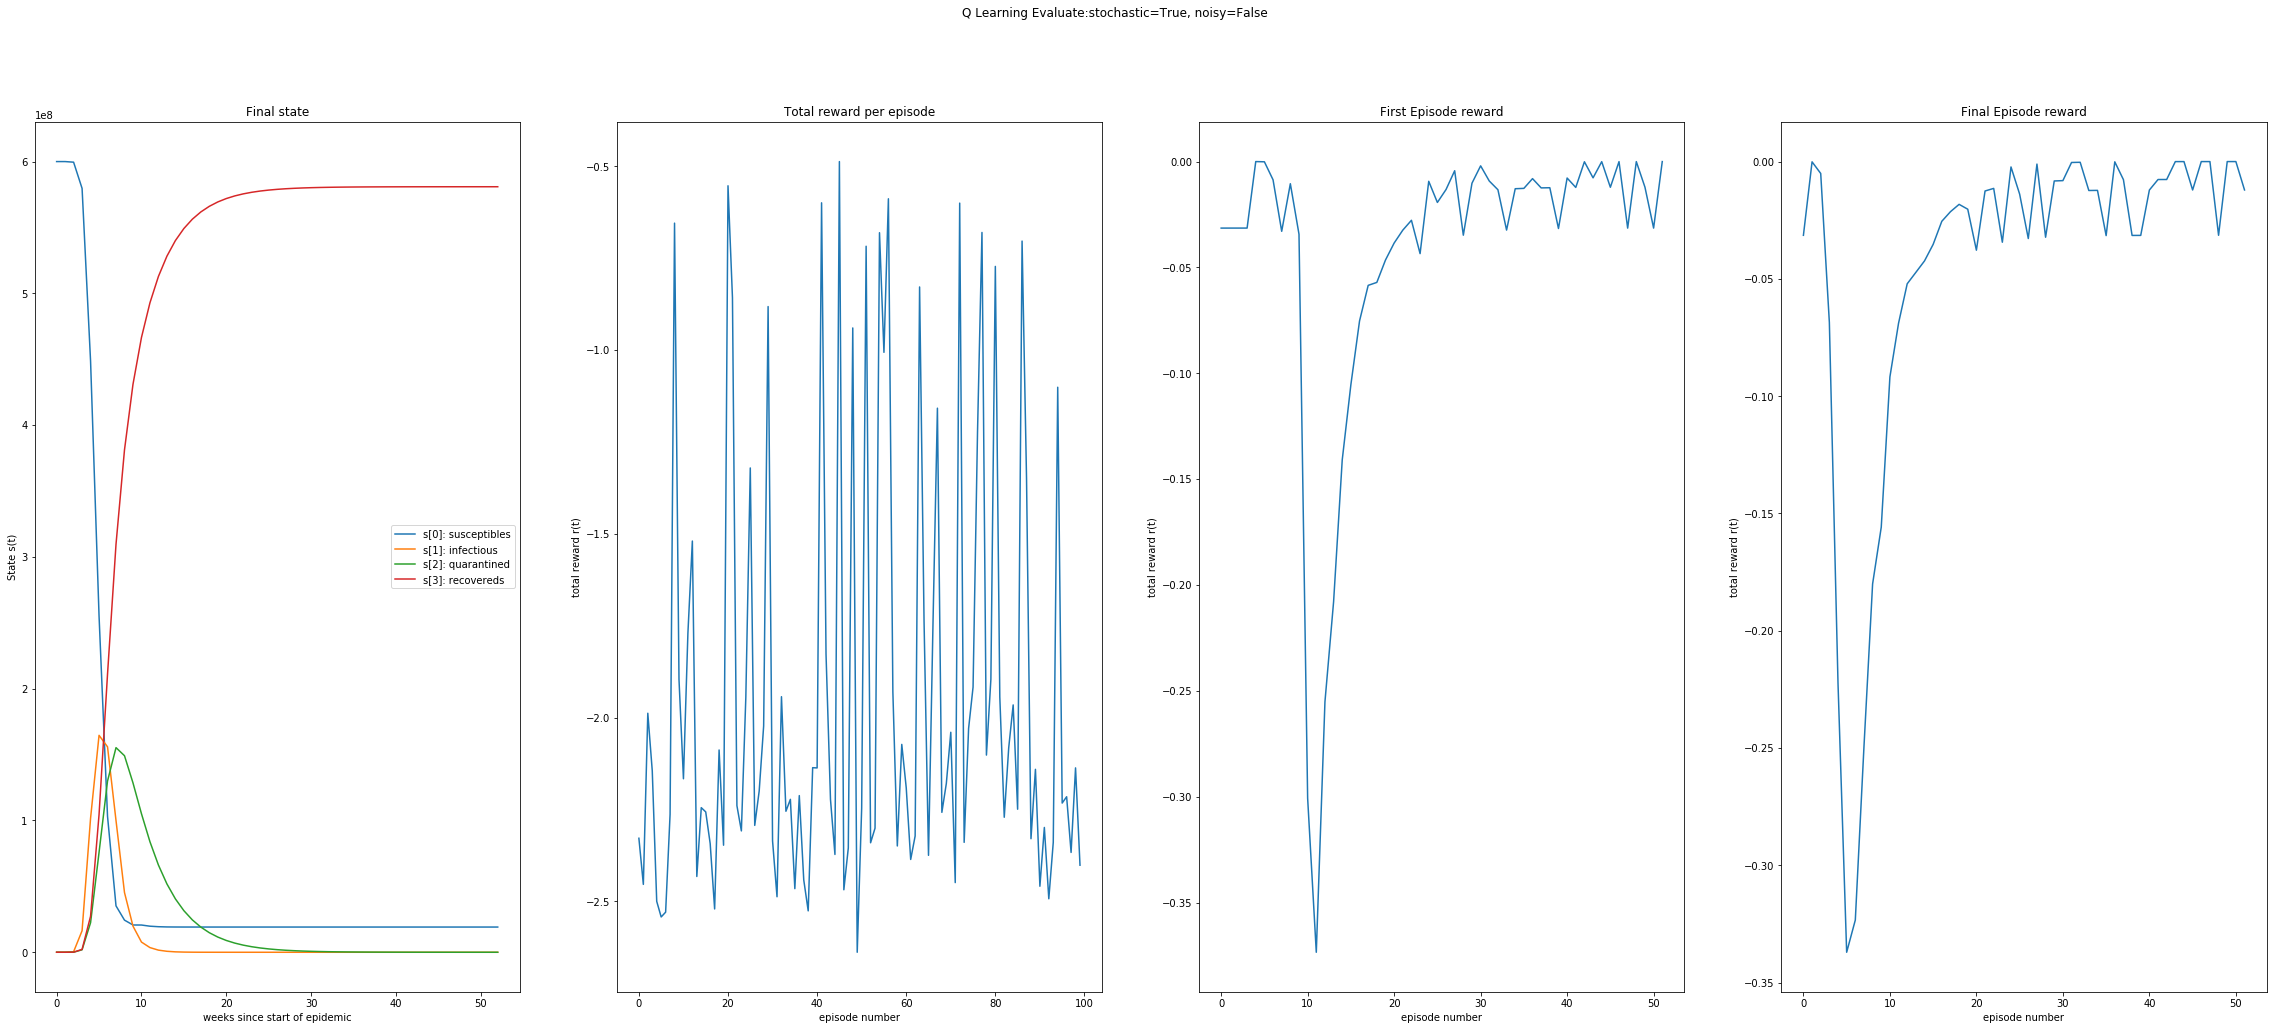

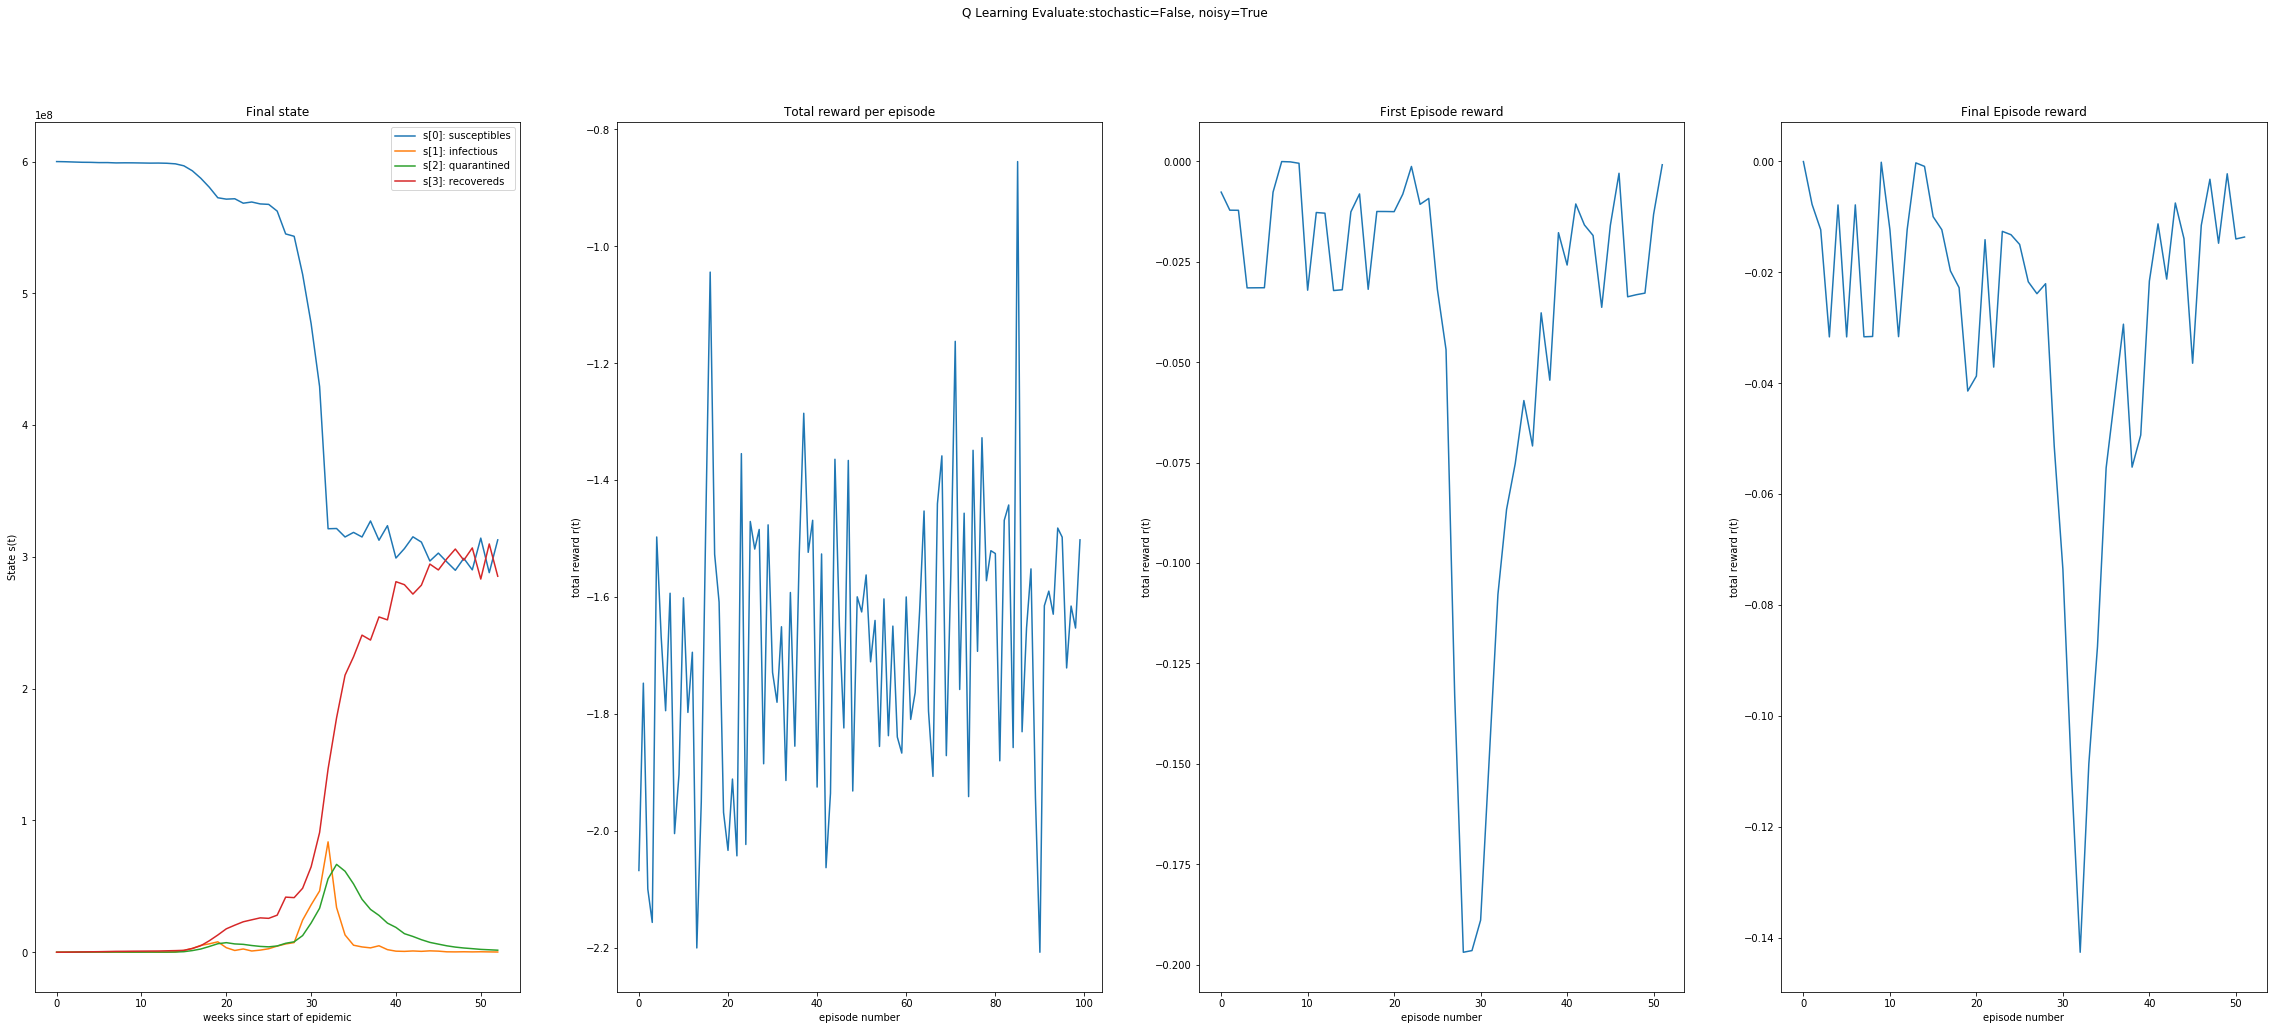

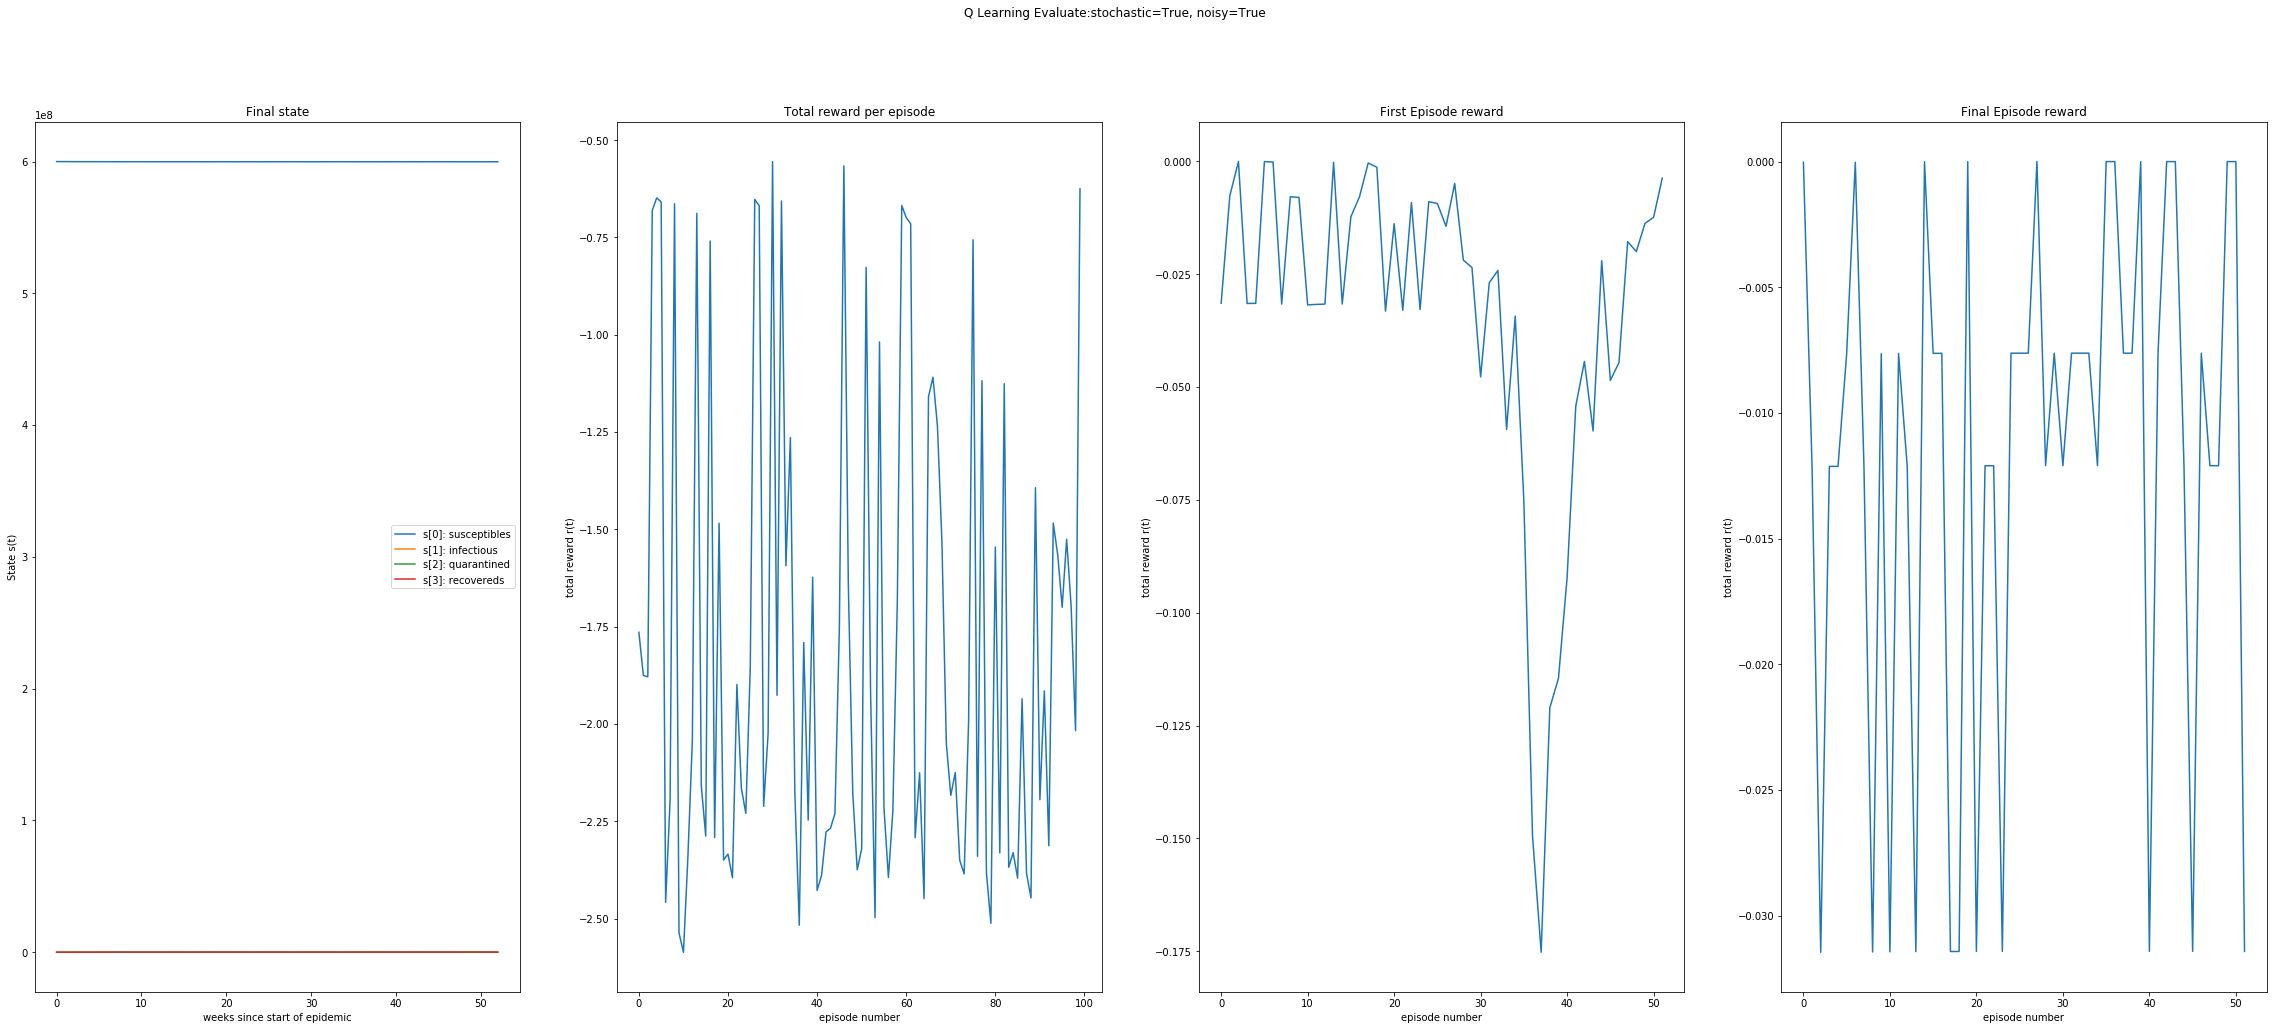

In [9]:

for i in range(0,4):
    print(stochastic_noisy_print[i])
    title = "Q Learning Evaluate:" + stochastic_noisy_print[i]
    
    with open('qlearningS' + str(i) + '.pkl', 'rb') as inpt:
        agent = pickle.load(inpt)
    states,all_rewards, all_total_rewards = agent.evaluate()
    eval_plot(states,agent, all_total_rewards, all_rewards,title)

## Q learning Neural Network

In [2]:
from q_learning_nn.nn_function_approximator import NNFunctionApproximatorJointKeras, init_networks, load_trained_network
from q_learning_nn.memory import ReplayMemory, Transition
from q_learning_nn.agent import Agent
from q_learning_nn.strategy import Strategy
from q_learning_nn.run import qlearning_nn
import os
import virl

policy_trained_using_problem_id_zero = "policy_network2.h5"
policy_network_new, target_network_new = load_trained_network(policy_trained_using_problem_id_zero)

In [4]:
for i in range(10):
    agent = Agent(virl.Epidemic(stochastic=False, noisy=False, problem_id=i), learning_rate=0.0)
    rewards = qlearning_nn(
        agent=agent, policy_network=policy_network_new, target_network=target_network_new, num_episodes=1
    )

Evaluation reward -0.8667918869030464
Evaluation reward -0.6291999801501303
Evaluation reward -0.6293770338129265
Evaluation reward -0.6317200225475976
Evaluation reward -0.7455220015846955
Evaluation reward -0.9845347834987108
Evaluation reward -1.0627178859676536
Evaluation reward -1.1019185677030323
Evaluation reward -1.1601219497361983
Evaluation reward -1.1993909909903095
